# 2020-10-05_EcN_NOTgates_AllReplicates_v2_newRNAPperScalculation

Re-measured all NOT gates using OD normalization protocol that I used for sensors. Did this because I also needed to re-do the toxicity  measurements since I didn't let cells grow long enough in a few replicates last time.

In [1]:
# Matplotlib interactivity
#matplotlib notebook
import matplotlib
matplotlib.rc('figure', dpi = 160)
matplotlib.rcParams['pdf.fonttype'] = 42 # for making font editable when exported to PDF for Illustrator
matplotlib.rcParams['ps.fonttype'] = 42 # for making font editable when exported to PS for Illustrator

# Set the default sans-serif font to Arial"
matplotlib.rcParams['font.sans-serif'] = "Arial"
# Set to always use sans-serif fonts
matplotlib.rcParams['font.family'] = "sans-serif"

In [2]:
# Imports
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sys
import cytoflow as flow
import string
import pandas as pd
import pickle
from scipy.optimize import least_squares
from matplotlib.lines import Line2D

# Dan's custom scripts that aid in importing from conditions.csv file
sys.path.append('/Users/atriassi/Documents/MIT Dropbox (local)/Voigt Lab/_Data/Flow Cytometry Data/cytoflow_example_fromDan/modules')
import cf_imports
import cf_helpers

In [3]:
# Import reloads for when modules are being changed
import importlib
importlib.reload(cf_imports)
importlib.reload(cf_helpers)

<module 'cf_helpers' from '/Users/atriassi/Documents/MIT Dropbox (local)/Voigt Lab/_Data/Flow Cytometry Data/cytoflow_example_fromDan/modules/cf_helpers.py'>

## Data Import

In [22]:
parent = ['EcN']

In [23]:
strains = ['AJT303','AJT304','AJT305','AJT306','AJT308','AJT309','AJT310','AJT311','AJT312']

In [24]:
reps = ['r1','r2','r5']

In [25]:
# Input RPU values
%store -r AJT269_means_RPU_store # from 2020-09-22_EcN_Sensors_AllReplicates_v2

# Input RNAP values
%store -r AJT269_means_RNAP_store # from 2020-09-22_EcN_Sensors_AllReplicates_v2

no stored variable # from 2020-09-22_EcN_Sensors_AllReplicates_v2
no stored variable # from 2020-09-22_EcN_Sensors_AllReplicates_v2


In [26]:
AJT269_means_RPU_store

0.0       0.021033
5.0       0.029155
15.0      0.078215
25.0      0.243913
40.0      1.477551
70.0      2.390190
200.0     3.184891
1000.0    3.659567
dtype: float64

In [27]:
# autofluorescence values
%store -r AJT206_Sensors_r2_store # mean of 4 technical replicates from 2020-09-18
%store -r AJT206_Sensors_r3_store # mean of 4 technical replicates from 2020-09-21
%store -r AJT206_Sensors_r4_store # mean of 4 technical replicates from 2020-09-22
%store -r AJT206_Sensors_r5_store # mean of 4 technical replicates from 2020-09-23

%store -r AJT206_NOTgates_r1_store # mean of 4 technical replicates from 2020-09-23
%store -r AJT206_NOTgates_r2_store # mean of 4 technical replicates from 2020-09-24
%store -r AJT206_NOTgates_r3_store # mean of 4 technical replicates from 2020-09-25
%store -r AJT206_NOTgates_r4_store # mean of 4 technical replicates from 2020-09-30

# RPU standard values
%store -r AJT280_Sensors_r2_store # mean of 4 technical replicates from 2020-09-18
%store -r AJT280_Sensors_r3_store # mean of 4 technical replicates from 2020-09-21
%store -r AJT280_Sensors_r4_store # mean of 4 technical replicates from 2020-09-22
%store -r AJT280_Sensors_r5_store # mean of 4 technical replicates from 2020-09-23

%store -r AJT280_NOTgates_r1_store # mean of 4 technical replicates from 2020-09-23
%store -r AJT280_NOTgates_r2_store # mean of 4 technical replicates from 2020-09-24
%store -r AJT280_NOTgates_r3_store # mean of 4 technical replicates from 2020-09-25
%store -r AJT280_NOTgates_r4_store # mean of 4 technical replicates from 2020-09-30

no stored variable # mean of 4 technical replicates from 2020-09-18
no stored variable # mean of 4 technical replicates from 2020-09-21
no stored variable # mean of 4 technical replicates from 2020-09-22
no stored variable # mean of 4 technical replicates from 2020-09-23
no stored variable # mean of 4 technical replicates from 2020-09-23
no stored variable # mean of 4 technical replicates from 2020-09-24
no stored variable # mean of 4 technical replicates from 2020-09-25
no stored variable # mean of 4 technical replicates from 2020-09-30
no stored variable # mean of 4 technical replicates from 2020-09-18
no stored variable # mean of 4 technical replicates from 2020-09-21
no stored variable # mean of 4 technical replicates from 2020-09-22
no stored variable # mean of 4 technical replicates from 2020-09-23
no stored variable # mean of 4 technical replicates from 2020-09-23
no stored variable # mean of 4 technical replicates from 2020-09-24
no stored variable # mean of 4 technical replica

In [28]:
# arbitrary units
%store -r AJT303_ODnorm_r1_au_store # from 2020-09-23 PsrA
%store -r AJT304_ODnorm_r1_au_store # from 2020-09-23 HlyIIR
%store -r AJT305_ODnorm_r1_au_store # from 2020-09-23 BM3R1
%store -r AJT306_ODnorm_r1_au_store # from 2020-09-23 AmtR
%store -r AJT308_ODnorm_r1_au_store # from 2020-09-23 LitR
%store -r AJT309_ODnorm_r1_au_store # from 2020-09-23 AmeR
%store -r AJT310_ODnorm_r1_au_store # from 2020-09-23 IcaR
%store -r AJT311_ODnorm_r1_au_store # from 2020-09-23 BetI
%store -r AJT312_ODnorm_r1_au_store # from 2020-09-23 PhlF

%store -r AJT303_ODnorm_r2_au_store # from 2020-09-24 PsrA
%store -r AJT304_ODnorm_r2_au_store # from 2020-09-24 HlyIIR
%store -r AJT305_ODnorm_r2_au_store # from 2020-09-24 BM3R1
%store -r AJT306_ODnorm_r2_au_store # from 2020-09-24 AmtR
%store -r AJT308_ODnorm_r2_au_store # from 2020-09-24 LitR
%store -r AJT309_ODnorm_r2_au_store # from 2020-09-24 AmeR
%store -r AJT310_ODnorm_r2_au_store # from 2020-09-24 IcaR
%store -r AJT311_ODnorm_r2_au_store # from 2020-09-24 BetI
%store -r AJT312_ODnorm_r2_au_store # from 2020-09-24 PhlF

%store -r AJT303_ODnorm_r3_au_store # from 2020-09-25 PsrA
%store -r AJT304_ODnorm_r3_au_store # from 2020-09-25 HlyIIR
%store -r AJT305_ODnorm_r3_au_store # from 2020-09-25 BM3R1
%store -r AJT306_ODnorm_r3_au_store # from 2020-09-25 AmtR
%store -r AJT308_ODnorm_r3_au_store # from 2020-09-25 LitR
%store -r AJT309_ODnorm_r3_au_store # from 2020-09-25 AmeR
%store -r AJT310_ODnorm_r3_au_store # from 2020-09-25 IcaR
%store -r AJT311_ODnorm_r3_au_store # from 2020-09-25 BetI
%store -r AJT312_ODnorm_r3_au_store # from 2020-09-25 PhlF

%store -r AJT304_ODnorm_r4_au_store # from 2020-09-30 HlyIIR
%store -r AJT308_ODnorm_r4_au_store # from 2020-09-30 LitR
%store -r AJT309_ODnorm_r4_au_store # from 2020-09-30 AmeR
%store -r AJT310_ODnorm_r4_au_store # from 2020-09-30 IcaR
%store -r AJT311_ODnorm_r4_au_store # from 2020-09-30 BetI
%store -r AJT312_ODnorm_r4_au_store # from 2020-09-30 PhlF

%store -r AJT303_ODnorm_r5_au_store # from 2020-10-16 PsrA
%store -r AJT304_ODnorm_r5_au_store # from 2020-10-16 HlyIIR
%store -r AJT305_ODnorm_r5_au_store # from 2020-10-16 BM3R1
%store -r AJT306_ODnorm_r5_au_store # from 2020-10-16 AmtR
%store -r AJT308_ODnorm_r5_au_store # from 2020-10-16 LitR
%store -r AJT309_ODnorm_r5_au_store # from 2020-10-16 AmeR
%store -r AJT310_ODnorm_r5_au_store # from 2020-10-16 IcaR
%store -r AJT311_ODnorm_r5_au_store # from 2020-10-16 BetI
%store -r AJT312_ODnorm_r5_au_store # from 2020-10-16 PhlF

no stored variable # from 2020-09-23 PsrA
no stored variable # from 2020-09-23 HlyIIR
no stored variable # from 2020-09-23 BM3R1
no stored variable # from 2020-09-23 AmtR
no stored variable # from 2020-09-23 LitR
no stored variable # from 2020-09-23 AmeR
no stored variable # from 2020-09-23 IcaR
no stored variable # from 2020-09-23 BetI
no stored variable # from 2020-09-23 PhlF
no stored variable # from 2020-09-24 PsrA
no stored variable # from 2020-09-24 HlyIIR
no stored variable # from 2020-09-24 BM3R1
no stored variable # from 2020-09-24 AmtR
no stored variable # from 2020-09-24 LitR
no stored variable # from 2020-09-24 AmeR
no stored variable # from 2020-09-24 IcaR
no stored variable # from 2020-09-24 BetI
no stored variable # from 2020-09-24 PhlF
no stored variable # from 2020-09-25 PsrA
no stored variable # from 2020-09-25 HlyIIR
no stored variable # from 2020-09-25 BM3R1
no stored variable # from 2020-09-25 AmtR
no stored variable # from 2020-09-25 LitR
no stored variable # from

In [29]:
data = {'au': 
        {'AJT303': {'r1': AJT303_ODnorm_r1_au_store,
                    'r2': AJT303_ODnorm_r2_au_store,
#                     'r3': AJT303_ODnorm_r3_au_store,
                   'r5': AJT303_ODnorm_r5_au_store},
         'AJT304': {'r1': AJT304_ODnorm_r1_au_store,
                    'r2': AJT304_ODnorm_r2_au_store,
                    #'r3': AJT304_ODnorm_r3_au_store,
#                     'r4': AJT304_ODnorm_r4_au_store,
                   'r5': AJT304_ODnorm_r5_au_store},
         'AJT305': {'r1': AJT305_ODnorm_r1_au_store,
                    'r2': AJT305_ODnorm_r2_au_store,
#                     'r3': AJT305_ODnorm_r3_au_store,
                   'r5': AJT305_ODnorm_r5_au_store},
         'AJT306': {'r1': AJT306_ODnorm_r1_au_store,
                    'r2': AJT306_ODnorm_r2_au_store,
#                     'r3': AJT306_ODnorm_r3_au_store,
                   'r5': AJT306_ODnorm_r5_au_store},
         'AJT308': {'r1': AJT308_ODnorm_r1_au_store,
                    'r2': AJT308_ODnorm_r2_au_store,
                    #'r3': AJT308_ODnorm_r3_au_store,
#                     'r4': AJT308_ODnorm_r4_au_store,
                   'r5': AJT308_ODnorm_r5_au_store},
         'AJT309': {'r1': AJT309_ODnorm_r1_au_store,
                    'r2': AJT309_ODnorm_r2_au_store,
                    #'r3': AJT309_ODnorm_r3_au_store,
#                     'r4': AJT309_ODnorm_r4_au_store,
                   'r5': AJT309_ODnorm_r5_au_store},
         'AJT310': {'r1': AJT310_ODnorm_r1_au_store,
                    'r2': AJT310_ODnorm_r2_au_store,
                    #'r3': AJT310_ODnorm_r3_au_store,
#                     'r4': AJT310_ODnorm_r4_au_store,
                   'r5': AJT310_ODnorm_r5_au_store},
         'AJT311': {'r1': AJT311_ODnorm_r1_au_store,
                    'r2': AJT311_ODnorm_r2_au_store,
                    #'r3': AJT311_ODnorm_r3_au_store,
#                     'r4': AJT311_ODnorm_r4_au_store,
                   'r5': AJT311_ODnorm_r5_au_store},
         'AJT312': {'r1': AJT312_ODnorm_r1_au_store,
                    'r2': AJT312_ODnorm_r2_au_store,
                    #'r3': AJT312_ODnorm_r3_au_store,
#                     'r4': AJT312_ODnorm_r4_au_store,
                   'r5': AJT312_ODnorm_r5_au_store}}
        
                }   #,

#         'RPU': 
#         {'AJT303': {'r1': ,
#                    'r2': ,
#                    'r4': },
#         'AJT304': {'r1': ,
#                    'r2': ,
#                    'r4': },
#         'AJT305': {'r1': ,
#                    'r2': ,
#                    'r4': },
#         'AJT306': {'r1': ,
#                    'r2': ,
#                    'r4': },
#         'AJT307': {'r1': , 
#                    'r2': ,
#                    'r4': },
#         'AJT308': {'r1': ,
#                    'r2': ,
#                    'r4': },
#         'AJT309': {'r1': ,
#                    'r2': ,
#                    'r4': },
#         'AJT310': {'r1': , 
#                    'r2': ,
#                    'r4': },
#         'AJT311': {'r1': ,
#                    'r2': ,
#                    'r4': },
#         'AJT312': {'r1': ,
#                    'r2': ,
#                    'r4': }}}

#         'RPU': 
#         {'AJT269': {'r1': ,
#                    'r2': ,
#                    'r3': },
#         'AJT270': {'r1': ,
#                    'r2': ,
#                    'r3': },
#         'AJT273': {'r1': ,
#                    'r2': ,
#                    'r3': },
#         'AJT274': {'r1': ,
#                    'r2': ,
#                    'r3': },
#         'AJT275': {'r1': ,
#                    'r2': ,
#                    'r3': },
#         'AJT276': {'r1': ,
#                    'r2': ,
#                    'r3': },
#         'AJT278': {'r1': ,
#                    'r2': ,
#                    'r3': }}}

In [30]:
# strains with 3 replicates
strains3 = ['AJT303','AJT305','AJT306']

# strains with 4 replicates
strains4 = ['AJT304','AJT308','AJT309','AJT310','AJT311','AJT312']

strains34 = [strains3,strains4]

In [31]:
fluor = ['au'] #,'RPU']

means = dict()
stdevs = dict()
for f in fluor:
    means[f] = dict()
    stdevs[f] = dict()
    for s in strains:
        r123= pd.concat([data[f][s]['r1'],data[f][s]['r2'],data[f][s]['r5']], axis=1)
        means[f][s] = r123.mean(axis=1)
        stdevs[f][s] = r123.std(axis=1)
    
    
#     for s in strains34:
#         for ss in s: # subsetting again since made list of lists
#             if s == strains3:
#                 r123 = pd.concat([data[f][ss]['r1'],data[f][ss]['r2'],data[f][ss]['r3']], axis=1)
#                 means[f][ss] = r123.mean(axis=1)
#                 stdevs[f][ss] = r123.std(axis=1)
#             elif s == strains4:
#                 r1234 = pd.concat([data[f][ss]['r1'],data[f][ss]['r2'], data[f][ss]['r4']], axis=1)
#                 means[f][ss] = r1234.mean(axis=1)
#                 stdevs[f][ss] = r1234.std(axis=1)
                
    for s in ['AJT206','AJT280']:
        if s == 'AJT206':
            means[f][s] = np.array([AJT206_Sensors_r2_store, AJT206_Sensors_r3_store, AJT206_Sensors_r4_store, AJT206_Sensors_r5_store,
                                    AJT206_NOTgates_r1_store, AJT206_NOTgates_r2_store, AJT206_NOTgates_r3_store, AJT206_NOTgates_r4_store]).mean()
     
            stdevs[f][s] = np.array([AJT206_Sensors_r2_store, AJT206_Sensors_r3_store, AJT206_Sensors_r4_store, AJT206_Sensors_r5_store,
                                    AJT206_NOTgates_r1_store, AJT206_NOTgates_r2_store, AJT206_NOTgates_r3_store, AJT206_NOTgates_r4_store]).std()
        elif s == 'AJT280':
            means[f][s] = np.array([AJT280_Sensors_r2_store, AJT280_Sensors_r3_store, AJT280_Sensors_r4_store, AJT280_Sensors_r5_store,
                                    AJT280_NOTgates_r1_store, AJT280_NOTgates_r2_store, AJT280_NOTgates_r3_store, AJT280_NOTgates_r4_store]).mean()

            stdevs[f][s] = np.array([AJT280_Sensors_r2_store, AJT280_Sensors_r3_store, AJT280_Sensors_r4_store, AJT280_Sensors_r5_store,
                                    AJT280_NOTgates_r1_store, AJT280_NOTgates_r2_store, AJT280_NOTgates_r3_store, AJT280_NOTgates_r4_store]).std()
            
#         print(r123)
        
means['au']['AJT304']



0.0       3281.106771
5.0       3225.923340
15.0      3215.515055
25.0      3193.085083
40.0      2997.690104
70.0      1451.840007
200.0      376.593333
1000.0     152.000000
dtype: float64

In [38]:
[AJT206_Sensors_r2_store, AJT206_Sensors_r3_store, AJT206_Sensors_r4_store, AJT206_Sensors_r5_store,
                                    AJT206_NOTgates_r1_store, AJT206_NOTgates_r2_store, AJT206_NOTgates_r3_store, AJT206_NOTgates_r4_store]

[39.060001373291016,
 39.525001525878906,
 34.41000032424927,
 31.852500438690186,
 25.80750036239624,
 34.41000032424927,
 30.69000005722046,
 30.257501125335693]

In [32]:
stdevs['au']['AJT312']

0.0       831.417085
5.0       813.901544
15.0      801.289295
25.0      698.278045
40.0       35.553958
70.0       18.558797
200.0      11.946423
1000.0      9.373764
dtype: float64

In [33]:
stdevs['au']['AJT206']

4.310965627978483

In [34]:
import random

In [35]:
print(means['au']['AJT280'], stdevs['au']['AJT280'])

987.3968868255615 77.51693941493674


Text(2.8, 33.25156319141388, 'Autofluor.\n(33.25 a.u.)')

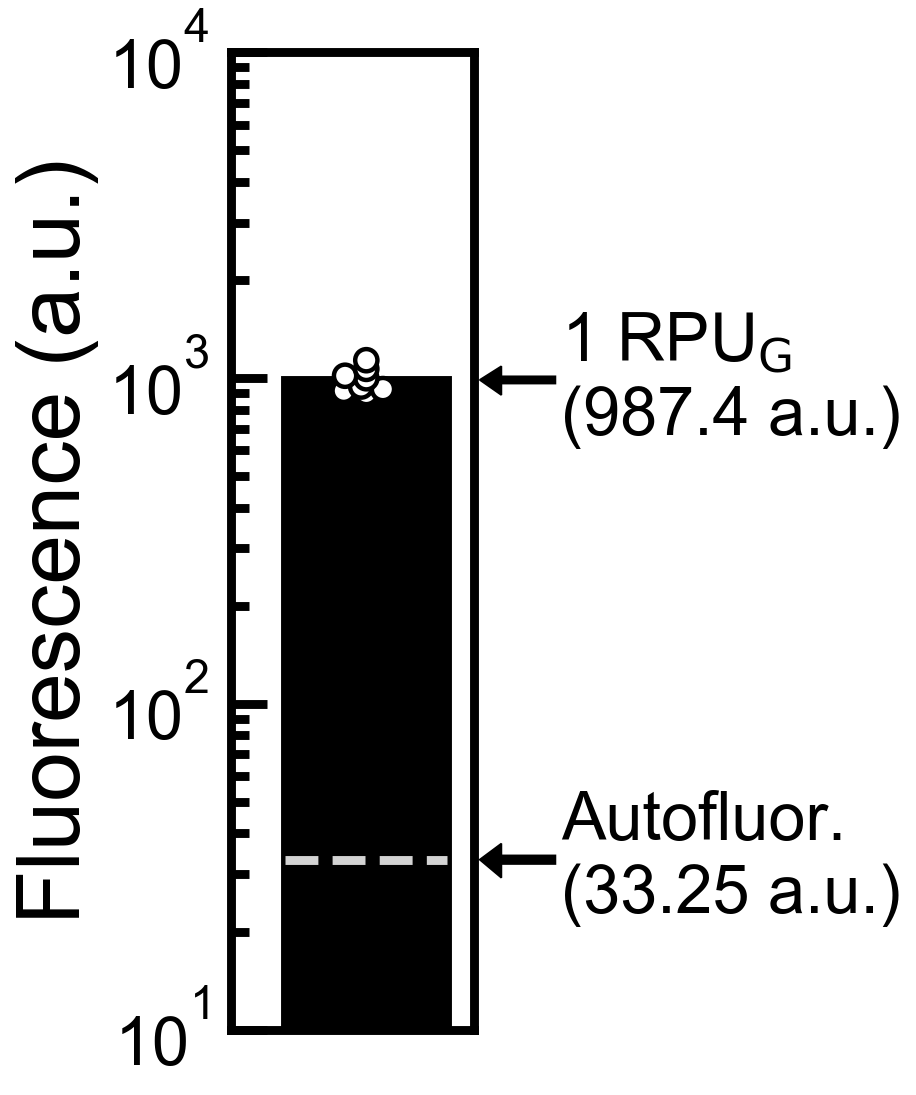

In [36]:
rows = 1
cols = 1

fig_RPUg, ax_RPUg = plt.subplots(rows,cols, figsize=(3*cols,7.5*rows)) # row, column format
plt.tight_layout(pad = 4, h_pad = 4, w_pad = 4) #tidies up spacing between plots

# ## make borders black (https://stackoverflow.com/questions/7778954/elegantly-changing-the-color-of-a-plot-frame-in-matplotlib)
# for spine in ax.spines.values():
#     spine.set_edgecolor('k')

for spine in ax_RPUg.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(4)

data_RPUg = [AJT280_Sensors_r2_store, AJT280_Sensors_r3_store, AJT280_Sensors_r4_store, AJT280_Sensors_r5_store,
                                    AJT280_NOTgates_r1_store, AJT280_NOTgates_r2_store, AJT280_NOTgates_r3_store, AJT280_NOTgates_r4_store]

xdata_RPUg = np.ones((len(data_RPUg),), dtype=int)

ax_RPUg.bar(1, means['au']['AJT280'], #yerr = stdevs['au']['AJT280'], 
            color = 'black', zorder = 1, width = 1.5, 
            edgecolor = 'black', linewidth = 4 )#, error_kw=dict(lw=4, capsize=8, capthick=4, ecolor = 'black'))

# print(pd.Series(xdata_RPUg))
# print(pd.Series(data_RPUg))
# print(pd.concat((pd.Series(xdata_RPUg), pd.Series(data_RPUg)), axis = 1))

sns.swarmplot(data = pd.concat((pd.Series(xdata_RPUg), pd.Series(data_RPUg)), axis = 1), 
              ax = ax_RPUg, size = 10, color = 'white', edgecolor = 'black', linewidth = 2)

ax_RPUg.set_xscale('linear')
ax_RPUg.set_yscale('log')

ax_RPUg.set_xlim(-.25,2)
ax_RPUg.set_ylim(10,10000)

ax_RPUg.set_ylabel('Fluorescence (a.u.)', size = 40, color = 'black')
ax_RPUg.yaxis.label.set_color('black')

ax_RPUg.tick_params(labelsize = 30, length = 16, width = 4, direction = 'in', pad = 10, colors = 'black')
ax_RPUg.tick_params(which='minor', length = 8, width = 4, direction = 'in', colors = 'black')
ax_RPUg.set_xticks([])
ax_RPUg.yaxis.grid(False)

# adding RPUG label and arrow
ax_RPUg.arrow(2.75,means['au']['AJT280'],-0.5,0, 
              head_width=200, head_length=0.2, width = 50,
              fc='black', ec='black', clip_on = False) # clip_on = False allows it to continue outside of axes
ax_RPUg.text(2.8, means['au']['AJT280'], 
             ('1 RPU$_{\mathrm{G}}$' +'\n({} a.u.)'.format(round(means['au']['AJT280'], 2))), # \mathrm gets rid of italics of Latex font, which is created by the $...$ for making subscript
             verticalalignment = 'center', horizontalalignment = 'left', 
             fontsize = 30, color = 'black')

#autofluorescence label and arrow
ax_RPUg.plot([0.25,1.75],[means['au']['AJT206'], means['au']['AJT206']], 
              linestyle = '--', linewidth = 4, color = 'lightgrey')

ax_RPUg.arrow(2.75,means['au']['AJT206'],-0.5,0, 
              head_width=8, head_length=0.2, width = 2,
              fc='black', ec='black', clip_on = False) # clip_on = False allows it to continue outside of axes
ax_RPUg.text(2.8, means['au']['AJT206'], 
             ('Autofluor.' +'\n({} a.u.)'.format(round(means['au']['AJT206'], 2))), 
#              ('Autofluor.' +' {} a.u.'.format(round(means['au']['AJT206'], 2))), 
             verticalalignment = 'center', horizontalalignment = 'left', 
             fontsize = 30, color = 'black')


In [37]:
data_RPUg

[1067.4075317382812,
 1134.83251953125,
 1016.7225036621094,
 998.8200073242188,
 925.3500061035156,
 942.0899963378906,
 914.1900024414062,
 899.7625274658203]

In [18]:
# fig_RPUg.savefig('EcN_RPUg_bar+swarm.pdf', bbox_inches = "tight", transparent = True)
# fig_RPUg.savefig('FigS4_EcN_RPUg_bar+swarm_RPUandAuto_labels.pdf', bbox_inches = "tight", transparent = True)
# fig_RPUg.savefig('EcN_RPUg_bar_withErrorBars.pdf', bbox_inches = "tight", transparent = True)

In [17]:
## subtracting single autofluorescence value and dividing by single RPU value for aribtrary unit data

## took mean of AJT206 technical replicates from same day and then took mean of those means across many days (all sensors and repressor runs)
## did same for AJT280 to get RPU value

A = round(means['au']['AJT206'],0)
R = means['au']['AJT280'] - A

print(A,R)


means_RPU = dict()
stdevs_RPU = dict()
r123_RPU = dict()

for s in strains:
    r123_RPU[s] = pd.concat([data['au'][s]['r1'],data['au'][s]['r2'],data['au'][s]['r5']], axis=1, keys = ['r1','r2','r5'])
    
#     if s in strains3:
#         r123_RPU[s] = pd.concat([data['au'][s]['r1'],data['au'][s]['r2'],data['au'][s]['r3']], axis=1, keys = ['r1','r2','r3'])
#         print(r123_RPU)
#     elif s in strains4:
#         r123_RPU[s] = pd.concat([data['au'][s]['r1'],data['au'][s]['r2'],data['au'][s]['r4']], axis=1, keys = ['r1','r2','r4'])
        
    r123_RPU[s] = r123_RPU[s].subtract(A)
    print(r123_RPU)
    r123_RPU[s] = r123_RPU[s].div(R)
    print(r123_RPU)
    means_RPU[s] = r123_RPU[s].mean(axis=1)
    stdevs_RPU[s] = r123_RPU[s].std(axis=1)

33.0 954.3968868255615
{'AJT303':                   r1            r2            r5
0.0     11725.919922  11535.270508  12081.830078
5.0     11516.669922  11537.129883  11682.340820
15.0    10962.389648  11129.790039  11105.400391
25.0     3681.419922   4577.939941   3865.440186
40.0      896.070007   1005.810059    936.150024
70.0      512.910034    558.479980    536.660034
200.0     336.209991    356.670013    355.570007
1000.0    246.929993    270.179993    264.570007}
{'AJT303':                r1         r2         r5
0.0     12.286209  12.086450  12.659126
5.0     12.066961  12.088398  12.240548
15.0    11.486196  11.661595  11.636040
25.0     3.857326   4.796684   4.050139
40.0     0.938886   1.053870   0.980881
70.0     0.537418   0.585165   0.562303
200.0    0.352275   0.373712   0.372560
1000.0   0.258729   0.283090   0.277212}
{'AJT303':                r1         r2         r5
0.0     12.286209  12.086450  12.659126
5.0     12.066961  12.088398  12.240548
15.0    11.486196  11

{'AJT303':                r1         r2         r5
0.0     12.286209  12.086450  12.659126
5.0     12.066961  12.088398  12.240548
15.0    11.486196  11.661595  11.636040
25.0     3.857326   4.796684   4.050139
40.0     0.938886   1.053870   0.980881
70.0     0.537418   0.585165   0.562303
200.0    0.352275   0.373712   0.372560
1000.0   0.258729   0.283090   0.277212, 'AJT304':               r1        r2        r5
0.0     3.499708  3.207376  3.502841
5.0     3.438318  3.139166  3.458980
15.0    3.361338  3.224429  3.417981
25.0    3.312128  3.231737  3.389376
40.0    3.040748  3.074853  3.203447
70.0    1.296505  1.573245  1.590156
200.0   0.360070  0.347403  0.372560
1000.0  0.118410  0.127180  0.128469, 'AJT305':               r1        r2        r5
0.0     0.726459  0.722561  0.745371
5.0     0.711842  0.725484  0.729162
15.0    0.674814  0.704047  0.688162
25.0    0.246061  0.262627  0.254328
40.0    0.035583  0.045327  0.044562
70.0    0.013171  0.019017  0.017865
200.0   0.00342

{'AJT303':                r1         r2         r5
0.0     12.286209  12.086450  12.659126
5.0     12.066961  12.088398  12.240548
15.0    11.486196  11.661595  11.636040
25.0     3.857326   4.796684   4.050139
40.0     0.938886   1.053870   0.980881
70.0     0.537418   0.585165   0.562303
200.0    0.352275   0.373712   0.372560
1000.0   0.258729   0.283090   0.277212, 'AJT304':               r1        r2        r5
0.0     3.499708  3.207376  3.502841
5.0     3.438318  3.139166  3.458980
15.0    3.361338  3.224429  3.417981
25.0    3.312128  3.231737  3.389376
40.0    3.040748  3.074853  3.203447
70.0    1.296505  1.573245  1.590156
200.0   0.360070  0.347403  0.372560
1000.0  0.118410  0.127180  0.128469, 'AJT305':               r1        r2        r5
0.0     0.726459  0.722561  0.745371
5.0     0.711842  0.725484  0.729162
15.0    0.674814  0.704047  0.688162
25.0    0.246061  0.262627  0.254328
40.0    0.035583  0.045327  0.044562
70.0    0.013171  0.019017  0.017865
200.0   0.00342

In [55]:
# ### Write dictionary of dataframes to separate sheets of the same Excel workbook

# from openpyxl import load_workbook

# book = load_workbook('/Users/atriassi/Dropbox (Personal)/Education/Grad School/*Papers/Triassi_CellSystems_submission_v1/data/fig2d_data.xlsx')
# writer = pd.ExcelWriter('/Users/atriassi/Dropbox (Personal)/Education/Grad School/*Papers/Triassi_CellSystems_submission_v1/data/fig2d_data.xlsx', engine='openpyxl') 

# for df_name, df in r123_RPU.items():
#     df.to_excel(writer, sheet_name=df_name)

# writer.save()

In [20]:
means_RPU['AJT312']

0.0       11.729450
5.0       11.626840
15.0      11.302176
25.0       2.627198
40.0       0.113178
70.0       0.040731
200.0      0.018853
1000.0     0.013712
dtype: float64

In [55]:
# means_RPU_AJT312 = means_RPU['AJT312']
# means_RPU_repressors = means_RPU
# stdevs_RPU_repressors = stdevs_RPU


# % store means_RPU_AJT312
# % store means_RPU_repressors
# % store stdevs_RPU_repressors

Stored 'means_RPU_AJT312' (Series)
Stored 'means_RPU_repressors' (dict)
Stored 'stdevs_RPU_repressors' (dict)


In [20]:
RNAPflux = 0.029 # RNAP/s-DNA for MG1655 measured in Bin's paper
copy_num = 13.2 # copy number of p15a plasmid in Bin's paper in MG1655
RNAPflux_conv_factor = RNAPflux*copy_num/4970 # 4970 is mean fluorescence (autosubtracted) observed from YFP construct on p15a plasmid in EcN from 2021-01-20-22 (all reps in 2021-01-14_EcN_RelativeExpression_AllReplicates notebook)

r123_RNAP = dict()
means_RNAP = dict()
stdevs_RNAP = dict()

for s in strains:
    r123_RNAP[s] = pd.concat([data['au'][s]['r1'],data['au'][s]['r2'],data['au'][s]['r5']], axis=1, keys = ['r1','r2','r5'])
    r123_RNAP[s] = (r123_RNAP[s] - A) *RNAPflux_conv_factor
    print(r123_RNAP)
    
    means_RNAP[s] = r123_RNAP[s].mean(axis=1)
    stdevs_RNAP[s] = r123_RNAP[s].std(axis=1)

{'AJT303':               r1        r2        r5
0.0     0.903155  0.888471  0.930568
5.0     0.887038  0.888614  0.899799
15.0    0.844347  0.857240  0.855362
25.0    0.283551  0.352603  0.297724
40.0    0.069017  0.077470  0.072104
70.0    0.039505  0.043015  0.041335
200.0   0.025896  0.027471  0.027387
1000.0  0.019019  0.020810  0.020378}
{'AJT303':               r1        r2        r5
0.0     0.903155  0.888471  0.930568
5.0     0.887038  0.888614  0.899799
15.0    0.844347  0.857240  0.855362
25.0    0.283551  0.352603  0.297724
40.0    0.069017  0.077470  0.072104
70.0    0.039505  0.043015  0.041335
200.0   0.025896  0.027471  0.027387
1000.0  0.019019  0.020810  0.020378, 'AJT304':               r1        r2        r5
0.0     0.257262  0.235773  0.257493
5.0     0.252750  0.230759  0.254269
15.0    0.247091  0.237027  0.251255
25.0    0.243474  0.237564  0.249152
40.0    0.223524  0.226031  0.235484
70.0    0.095306  0.115649  0.116892
200.0   0.026469  0.025537  0.027387
1000

{'AJT303':               r1        r2        r5
0.0     0.903155  0.888471  0.930568
5.0     0.887038  0.888614  0.899799
15.0    0.844347  0.857240  0.855362
25.0    0.283551  0.352603  0.297724
40.0    0.069017  0.077470  0.072104
70.0    0.039505  0.043015  0.041335
200.0   0.025896  0.027471  0.027387
1000.0  0.019019  0.020810  0.020378, 'AJT304':               r1        r2        r5
0.0     0.257262  0.235773  0.257493
5.0     0.252750  0.230759  0.254269
15.0    0.247091  0.237027  0.251255
25.0    0.243474  0.237564  0.249152
40.0    0.223524  0.226031  0.235484
70.0    0.095306  0.115649  0.116892
200.0   0.026469  0.025537  0.027387
1000.0  0.008704  0.009349  0.009444, 'AJT305':               r1        r2        r5
0.0     0.053402  0.053115  0.054792
5.0     0.052327  0.053330  0.053600
15.0    0.049605  0.051754  0.050587
25.0    0.018088  0.019306  0.018696
40.0    0.002616  0.003332  0.003276
70.0    0.000968  0.001398  0.001313
200.0   0.000252  0.000682  0.000542
1000.

In [21]:
means_RNAP['AJT312']

0.0       0.862228
5.0       0.854685
15.0      0.830819
25.0      0.193125
40.0      0.008320
70.0      0.002994
200.0     0.001386
1000.0    0.001008
dtype: float64

In [22]:
stdevs_RPU['AJT312']

0.0       0.871144
5.0       0.852791
15.0      0.839577
25.0      0.731643
40.0      0.037253
70.0      0.019446
200.0     0.012517
1000.0    0.009822
dtype: float64

In [23]:
# means_RNAP_AJT312 = means_RNAP['AJT312']
# means_RNAP_repressors = means_RNAP
# stdevs_RNAP_repressors = stdevs_RNAP


# % store means_RNAP_AJT312
# % store means_RNAP_repressors
# % store stdevs_RNAP_repressors

In [18]:
%store -r inducer_info_8conc_paper # from 2020-09-17 Sensors

no stored variable # from 2020-09-17 Sensors


In [19]:
inducers = ['iptg'] 

inducer_info = inducer_info_8conc_paper['iptg']

inducer_info

{'color': '#fbb03b',
 'conc': [0.0, 5.0, 15.0, 25.0, 40.0, 70.0, 200.0, 1000.0],
 'plot_conc': [2.5, 5.0, 15.0, 25.0, 40.0, 70.0, 200.0, 1000.0]}

In [26]:
# ## OLD COLORS
# # dictionary with strain information that can be copied from experiment to experiment

# # PsrA = '#d33dc1'
# # HlyIIR = '#d2aa85'
# # B3BM3R1 = '#44a8c3'
# # AmtR = '#32a87c'
# # QacR = '#c83832'
# # LitR = '#f79a7a'
# # AmeR = '#fd4131'
# # IcaR = '#6a86c5'
# # BetI = '#960985'
# # PhlF = '#7bc229'

# strain_info_rep = dict([
#     ('AJT206', {'color': 'k',
#                 'repressor': 'none'}),
#     ('AJT280',{'color': 'k',
#                'repressor': 'RPU'}),
#     ('AJT303',{'color': '#d33dc1',
#                'repressor': 'PsrA'}),
#     ('AJT304',{'color': '#d2aa85',
#                'repressor': 'HlyIIR'}),
#     ('AJT305',{'color': '#44a8c3',
#                'repressor': 'BM3R1'}),
#     ('AJT306',{'color': '#32a87c',
#                'repressor': 'AmtR'}),
#     ('AJT307',{'color': '#c83832',
#                'repressor': 'QacR'}),
#     ('AJT308',{'color': '#f79a7a',
#                'repressor': 'LitR'}),
#     ('AJT309',{'color': '#fd4131',
#                'repressor': 'AmeR'}),
#     ('AJT310',{'color': '#6a86c5',
#                'repressor': 'IcaR'}),
#     ('AJT311',{'color': '#960985',
#                'repressor': 'BetI'}),
#     ('AJT312',{'color': '#7bc229',
#                'repressor': 'PhlF'}),
#     ('AJT344', {'color': '#6a86c5',
#                'repressor': 'IcaR'}),
#     ('AJT269',{'color': '#fbb03b',
#                'repressor': '$P_{Tac}$'}),
    
#     ('AJT361', {'color': 'k',
#                 'repressor': 'none'}),
#     ('AJT374',{'color': 'k',
#                'repressor': 'RPU'}),
#     ('AJT397',{'color': '#d33dc1',
#                'repressor': 'PsrA'}),
#     ('AJT398',{'color': '#d2aa85',
#                'repressor': 'HlyIIR'}),
#     ('AJT399',{'color': '#44a8c3',
#                'repressor': 'BM3R1'}),
#     ('AJT400',{'color': '#32a87c',
#                'repressor': 'AmtR'}),
#     ('AJT401',{'color': '#c83832',
#                'repressor': 'QacR'}),
#     ('AJT402',{'color': '#f79a7a',
#                'repressor': 'LitR'}),
#     ('AJT403',{'color': '#fd4131',
#                'repressor': 'AmeR'}),
#     ('AJT404',{'color': '#6a86c5',
#                'repressor': 'IcaR'}),
#     ('AJT405',{'color': '#960985',
#                'repressor': 'BetI'}),
#     ('AJT406',{'color': '#7bc229',
#                'repressor': 'PhlF'}),
#     ('AJT367',{'color': '#fbb03b',
#                'repressor': '$P_{Tac}$'})
# ])

In [20]:
## NEW COLORS
# dictionary with strain information that can be copied from experiment to experiment

# PsrA = '#800000'
# HlyIIR = '#d2aa85'
# B3BM3R1 = '#ffea06'
# AmtR = '#aaab3f'
# LitR = '#98ff98'
# AmeR = '#008077'
# IcaR = '#003380'
# BetI = '#7a4d87'
# PhlF = '#c20088'

strain_info_rep = dict([
    ('AJT206', {'color': 'black',
                'repressor': 'none'}),
    ('AJT280',{'color': 'blackk',
               'repressor': 'RPU'}),
    ('AJT303',{'color': '#800000',
               'repressor': 'PsrA'}),
    ('AJT304',{'color': '#d2aa85',
               'repressor': 'HlyIIR'}),
    ('AJT305',{'color': '#aaab3f',
               'repressor': 'BM3R1'}),
    ('AJT306',{'color': '#98ff98',
               'repressor': 'AmtR'}),
#     ('AJT307',{'color': '#98ff98',
#                'repressor': 'QacR'}),
    ('AJT308',{'color': '#008077',
               'repressor': 'LitR'}),
    ('AJT309',{'color': '#00b4ff',
               'repressor': 'AmeRS'}),
    ('AJT310',{'color': '#003380',
               'repressor': 'IcaR'}),
    ('AJT311',{'color': '#7a4d87',
               'repressor': 'BetI'}),
    ('AJT312',{'color': '#c20088',
               'repressor': 'PhlF'}),
    ('AJT344', {'color': '#003380',
               'repressor': 'IcaR'}),
    ('AJT269',{'color': '#fbb03b',
               'repressor': '$P_{Tac}$'})
])

In [21]:
plot_info = dict()

for r in ['r1','r2','r3','r5']:
    plot_info[r] = dict()
    if r == 'r1':
        plot_info[r] = {'marker': 'o',
                           'facecolor': 'white',
                           'edgecolor': 'black',
                           'linecolor': 'black'}
#                                'edgecolor': 'darkgrey',
#                                'linecolor': 'darkgrey'}
    elif r == 'r2':
        plot_info[r] =  {'marker': 'o',
                           'facecolor': 'white',
                            'edgecolor': 'grey',
#                                'edgecolor': inducer_info[i]['color'],
                           'linecolor': 'grey'}

    elif r == 'r5':
        plot_info[r] =  {'marker': 'o',
#                                'facecolor': inducer_info[i]['color'],
                           'facecolor': 'white',
                            'edgecolor': 'darkgrey',
                            'linecolor': 'darkgrey'}
#                                'edgecolor': 'k',
#                                 'linecolor': 'k'}
#                                'linecolor': inducer_info[i]['color']
                         
    elif r == 'r3':
        plot_info[r] =  {'marker': 'o',
#                                'facecolor': inducer_info[i]['color'],
                           'facecolor': 'white',
                            'edgecolor': 'darkgrey',
                            'linecolor': 'darkgrey'}
#                                'edgecolor': 'k',
#                                 'linecolor': 'k'}
#                                'linecolor': inducer_info[i]['color']

#     elif r == 'r4':
#         plot_info[r] =  {'marker': 'o',
# #                                'facecolor': inducer_info[i]['color'],
#                            'facecolor': 'white',
#                             'edgecolor': 'lightgrey',
#                             'linecolor': 'lightgrey'}
# #                                'edgecolor': 'k',
# #                                 'linecolor': 'k'}
# #                                'linecolor': inducer_info[i]['color']}

In [29]:
# plot_info['AJT209']['atc']

In [30]:
# list(filtered[filtered['parent_strain']=='AJT207']['strain_num'].unique())[0]

In [22]:
fig_pos = {'AJT303': {'fig_row': 0, 'fig_col': 0},
           'AJT305': {'fig_row': 0, 'fig_col': 1},
           'AJT306': {'fig_row': 0, 'fig_col': 2},
           'AJT308': {'fig_row': 1, 'fig_col': 0},
           'AJT309': {'fig_row': 1, 'fig_col': 1},
           'AJT310': {'fig_row': 1, 'fig_col': 2},
           'AJT312': {'fig_row': 2, 'fig_col': 0},
           'AJT304': {'fig_row': 2, 'fig_col': 1},
           'AJT311': {'fig_row': 2, 'fig_col': 2},
          }

# fig_pos = dict()

# for i in inducers:
#     fig_pos[i] = {'fig_row': inducers.index(i)//2, 'fig_col': inducers.index(i)-(2*(inducers.index(i)//2))}

fig_pos

{'AJT303': {'fig_row': 0, 'fig_col': 0},
 'AJT305': {'fig_row': 0, 'fig_col': 1},
 'AJT306': {'fig_row': 0, 'fig_col': 2},
 'AJT308': {'fig_row': 1, 'fig_col': 0},
 'AJT309': {'fig_row': 1, 'fig_col': 1},
 'AJT310': {'fig_row': 1, 'fig_col': 2},
 'AJT312': {'fig_row': 2, 'fig_col': 0},
 'AJT304': {'fig_row': 2, 'fig_col': 1},
 'AJT311': {'fig_row': 2, 'fig_col': 2}}

## Plot transfer function

In [23]:
# Jai's fancy script that contains a class that builds transfer functions
## path for it in terminal open -a Sublime\ Text transferfunction.py

%load_ext autoreload
# %autoreload 2 # to make sure that it reloads properly when this is run
sys.path.append('/Users/atriassi/Dropbox (Personal)')
from transferfunction_beta import *

In [33]:
# plot_info[strain_info['AJT269']['parent']]['iptg']['facecolor']

In [34]:
# legend_names = 

## [inducer] x AU

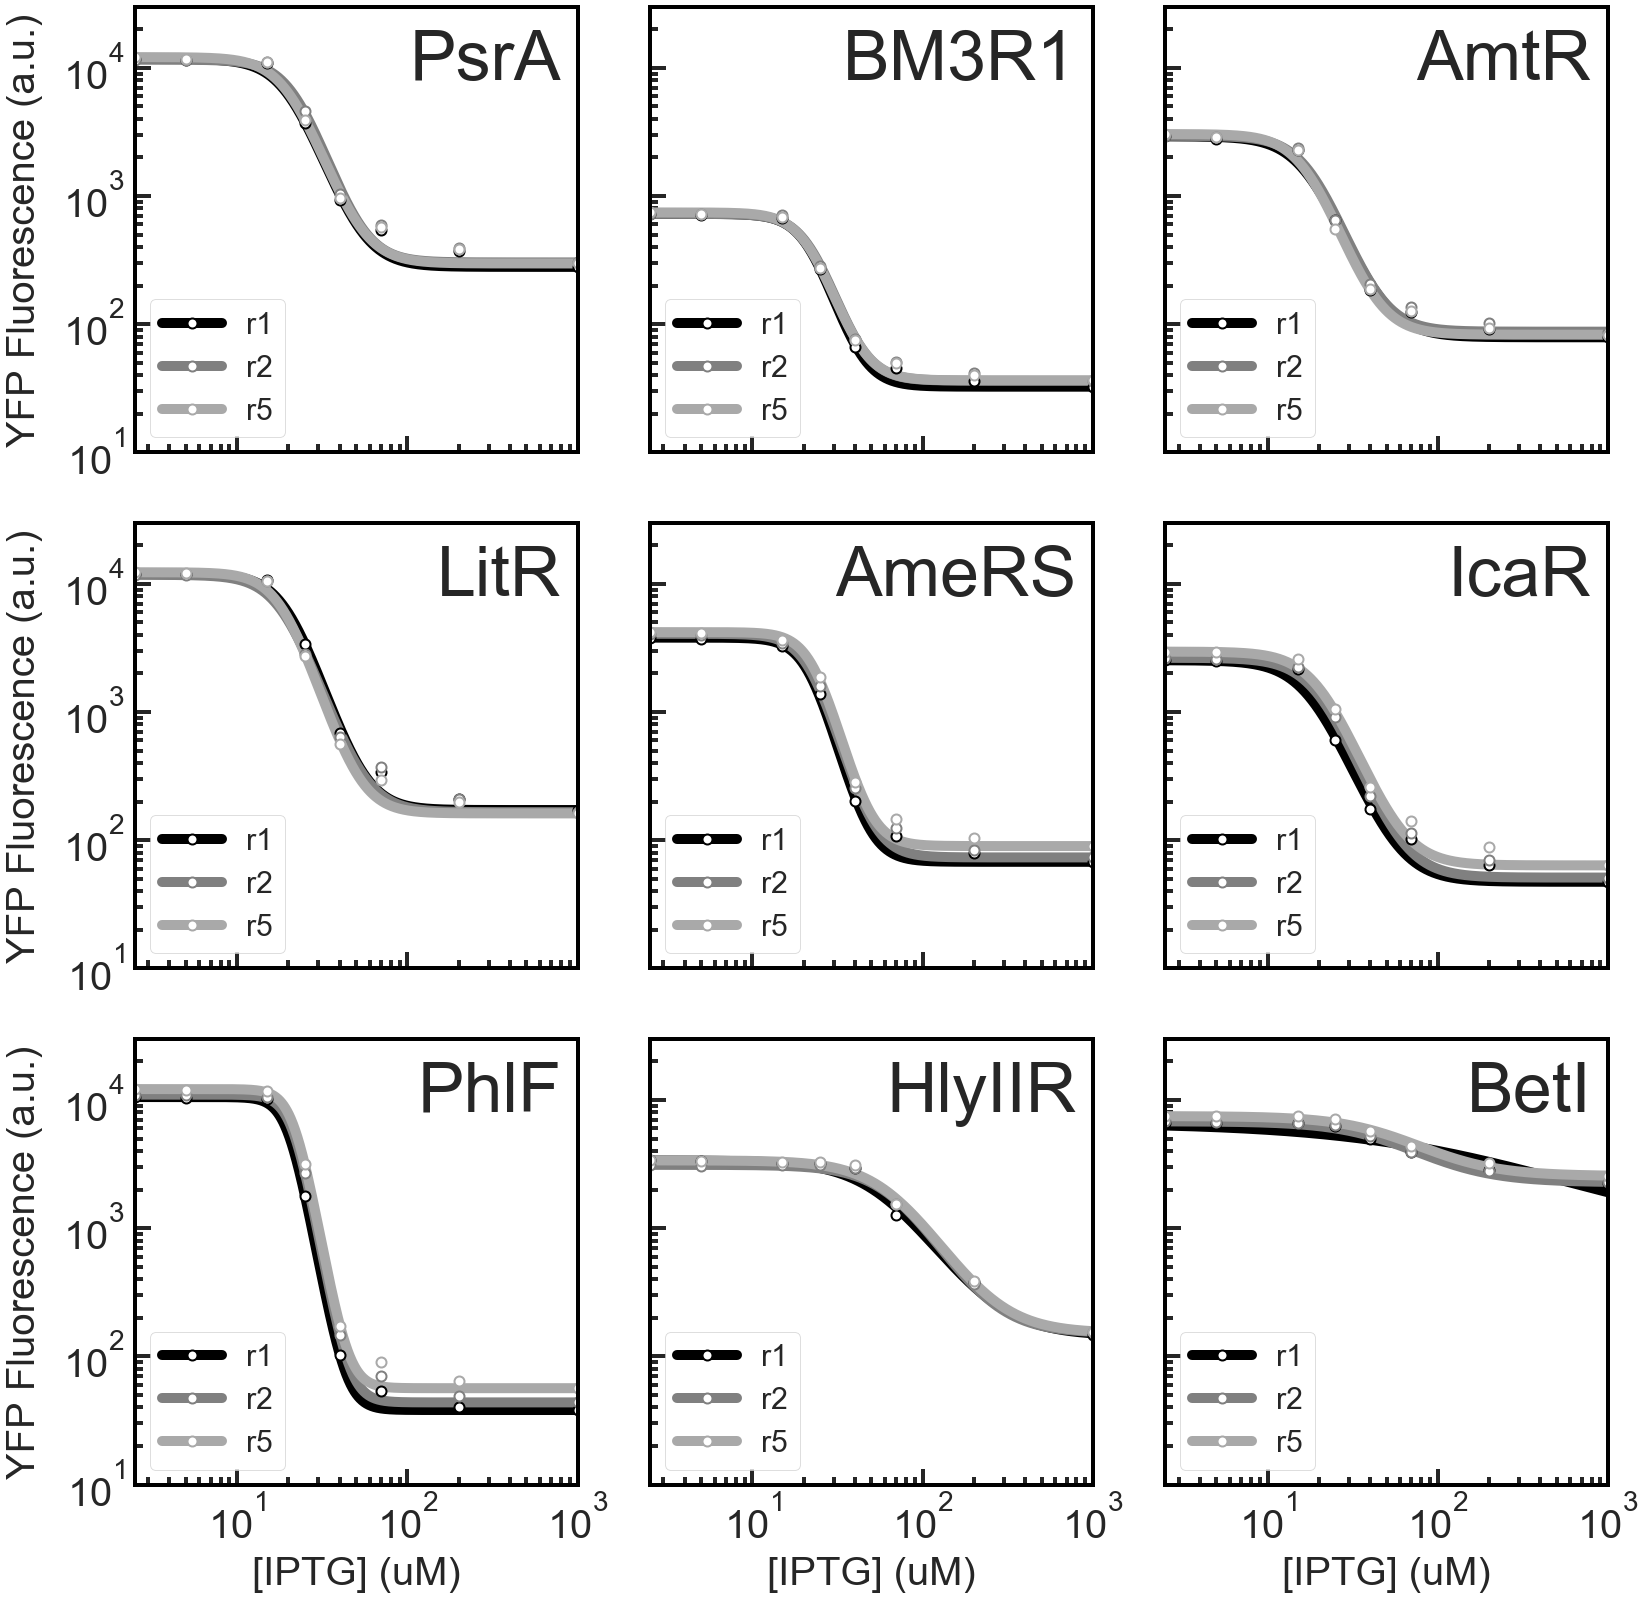

In [27]:
## plot transfer functions of each replicate

rows = 3
cols = 3

fig_au, ax_au = plt.subplots(rows,cols, figsize=(cols*7.5,rows*7.5), sharey = 'row', sharex = 'col') # row, column format
plt.tight_layout(pad = 6, h_pad = 6, w_pad = 6) #tidies up spacing between plots


tfs_au = dict()

for s in strains:
    tfs_au[s] = dict()

    FP = ax_au[fig_pos[s]['fig_row']][fig_pos[s]['fig_col']]

    for spine in FP.spines.values():
                spine.set_edgecolor('black')
                spine.set_linewidth(4)

    for r in ['r1','r2','r5']:

        ## transfer functions
        tfs_au[s][r] = build_transfer_functions([inducer_info['plot_conc']], # x data
                                            [data['au'][s][r].tolist()], # y data
                                            ['{} {}'.format(s,r)], # name
                                            'repressor') # kind

        ## scatter
        FP.scatter(tfs_au[s][r][0].inputs, tfs_au[s][r][0].outputs,
                                                    s = 100, zorder=2,
                                                     marker = plot_info[r]['marker'],
                                                     c = plot_info[r]['facecolor'],
                                                     edgecolors = plot_info[r]['edgecolor'], linewidths = 2)#,
#                                                       label = legend_names[strain_info[s]['parent']])

        ## fitting line
        xvals = np.logspace(np.log10(inducer_info['plot_conc'][0]),np.log10(inducer_info['plot_conc'][-1]), 1000) # x values for creating smooth line

        FP.plot(xvals, tfs_au[s][r][0].hill_eqn_rep(xvals),
                                          color = plot_info[r]['linecolor'],
                                          zorder = 1, linewidth = 10)#, label = legend_names[strain_info[s]['parent']])

        ## plotting empty data as legend entry creation so that I can do marker and line despite them being different data that is plotted
        FP.plot([],[], marker = plot_info[r]['marker'],
                                          mec = plot_info[r]['edgecolor'],
                                          mew = 2,
                                          mfc = plot_info[r]['facecolor'],
                                          ms = 10,
                                          color = plot_info[r]['linecolor'],
                                          linewidth = 10, label = r)

                
#     if s in strains4:
#         for r in ['r1','r2','r4']:

#             ## transfer functions
#             tfs_au[s][r] = build_transfer_functions([inducer_info['plot_conc']], # x data
#                                                 [data['au'][s][r].tolist()], # y data
#                                                 ['{} {}'.format(s,r)]) # name

#             ## scatter
#             FP.scatter(tfs_au[s][r][0].inputs, tfs_au[s][r][0].outputs,
#                                                         s = 100, zorder=2,
#                                                          marker = plot_info[r]['marker'],
#                                                          c = plot_info[r]['facecolor'],
#                                                          edgecolors = plot_info[r]['edgecolor'], linewidths = 2)#,
# #                                                       label = legend_names[strain_info[s]['parent']])

#             ## fitting line
#             xvals = np.logspace(np.log10(inducer_info['plot_conc'][0]),np.log10(inducer_info['plot_conc'][-1]), 1000) # x values for creating smooth line

#             FP.plot(xvals, tfs_au[s][r][0].hill_eqn(xvals),
#                                               color = plot_info[r]['linecolor'],
#                                               zorder = 1, linewidth = 10)#, label = legend_names[strain_info[s]['parent']])

#             ## plotting empty data as legend entry creation so that I can do marker and line despite them being different data that is plotted
#             FP.plot([],[], marker = plot_info[r]['marker'],
#                                               mec = plot_info[r]['edgecolor'],
#                                               mew = 2,
#                                               mfc = plot_info[r]['facecolor'],
#                                               ms = 10,
#                                               color = plot_info[r]['linecolor'],
#                                               linewidth = 10, label = r)

#     elif s in strains3:
#         for r in ['r1','r2','r3']:

#             ## transfer functions
#             tfs_au[s][r] = build_transfer_functions([inducer_info['plot_conc']], # x data
#                                                 [data['au'][s][r].tolist()], # y data
#                                                 ['{} {}'.format(s,r)]) # name

#             ## scatter
#             FP.scatter(tfs_au[s][r][0].inputs, tfs_au[s][r][0].outputs,
#                                                         s = 100, zorder=2,
#                                                          marker = plot_info[r]['marker'],
#                                                          c = plot_info[r]['facecolor'],
#                                                          edgecolors = plot_info[r]['edgecolor'], linewidths = 2)#,
#     #                                                       label = legend_names[strain_info[s]['parent']])

#             ## fitting line
#             xvals = np.logspace(np.log10(inducer_info['plot_conc'][0]),np.log10(inducer_info['plot_conc'][-1]), 1000) # x values for creating smooth line

#             FP.plot(xvals, tfs_au[s][r][0].hill_eqn(xvals),
#                                               color = plot_info[r]['linecolor'],
#                                               zorder = 1, linewidth = 10)#, label = legend_names[strain_info[s]['parent']])

#             ## plotting empty data as legend entry creation so that I can do marker and line despite them being different data that is plotted
#             FP.plot([],[], marker = plot_info[r]['marker'],
#                                               mec = plot_info[r]['edgecolor'],
#                                               mew = 2,
#                                               mfc = plot_info[r]['facecolor'],
#                                               ms = 10,
#                                               color = plot_info[r]['linecolor'],
#                                               linewidth = 10, label = r)

    FP.set_yscale('log')
    FP.set_xscale('log')

    if fig_pos[s]['fig_col'] == 0:                
        FP.set_ylabel('YFP Fluorescence (a.u.)', size = 40, labelpad = 20)
    
    if fig_pos[s]['fig_row'] == rows-1:
        FP.set_xlabel('[IPTG] (uM)', size = 40, labelpad = 10)  

#                 FP.set_title('{}'.format(strain_info[s]['promoter']), 
#                                                                                size = 24, pad = 10)
    FP.tick_params(labelsize = 40, length = 16, width = 4, direction = 'in', pad = 10)
    FP.tick_params(which='minor', length = 8, width = 4, direction = 'in')
    FP.set_ylim(10, 30000)
    FP.set_xlim(inducer_info['plot_conc'][0],inducer_info['plot_conc'][-1])

    FP.yaxis.grid(False)
    FP.xaxis.grid(False)
    FP.legend(markerscale = 1, fontsize = 30, loc = 'lower left')
#             FP.legend.legendHandles._legmarker.set_markersize(50)

    FP.text(max(tfs_au[s]['r1'][0].inputs)/1.25, 20000, strain_info_rep[s]['repressor'], 
                                                          verticalalignment = 'top', horizontalalignment = 'right', 
                                                          fontsize = 70)



In [36]:
# fig_au.savefig('EcN_NOTgates_Inducer_x_AU_EachReplicate_Rep5.pdf', bbox_inches = "tight", transparent = True)

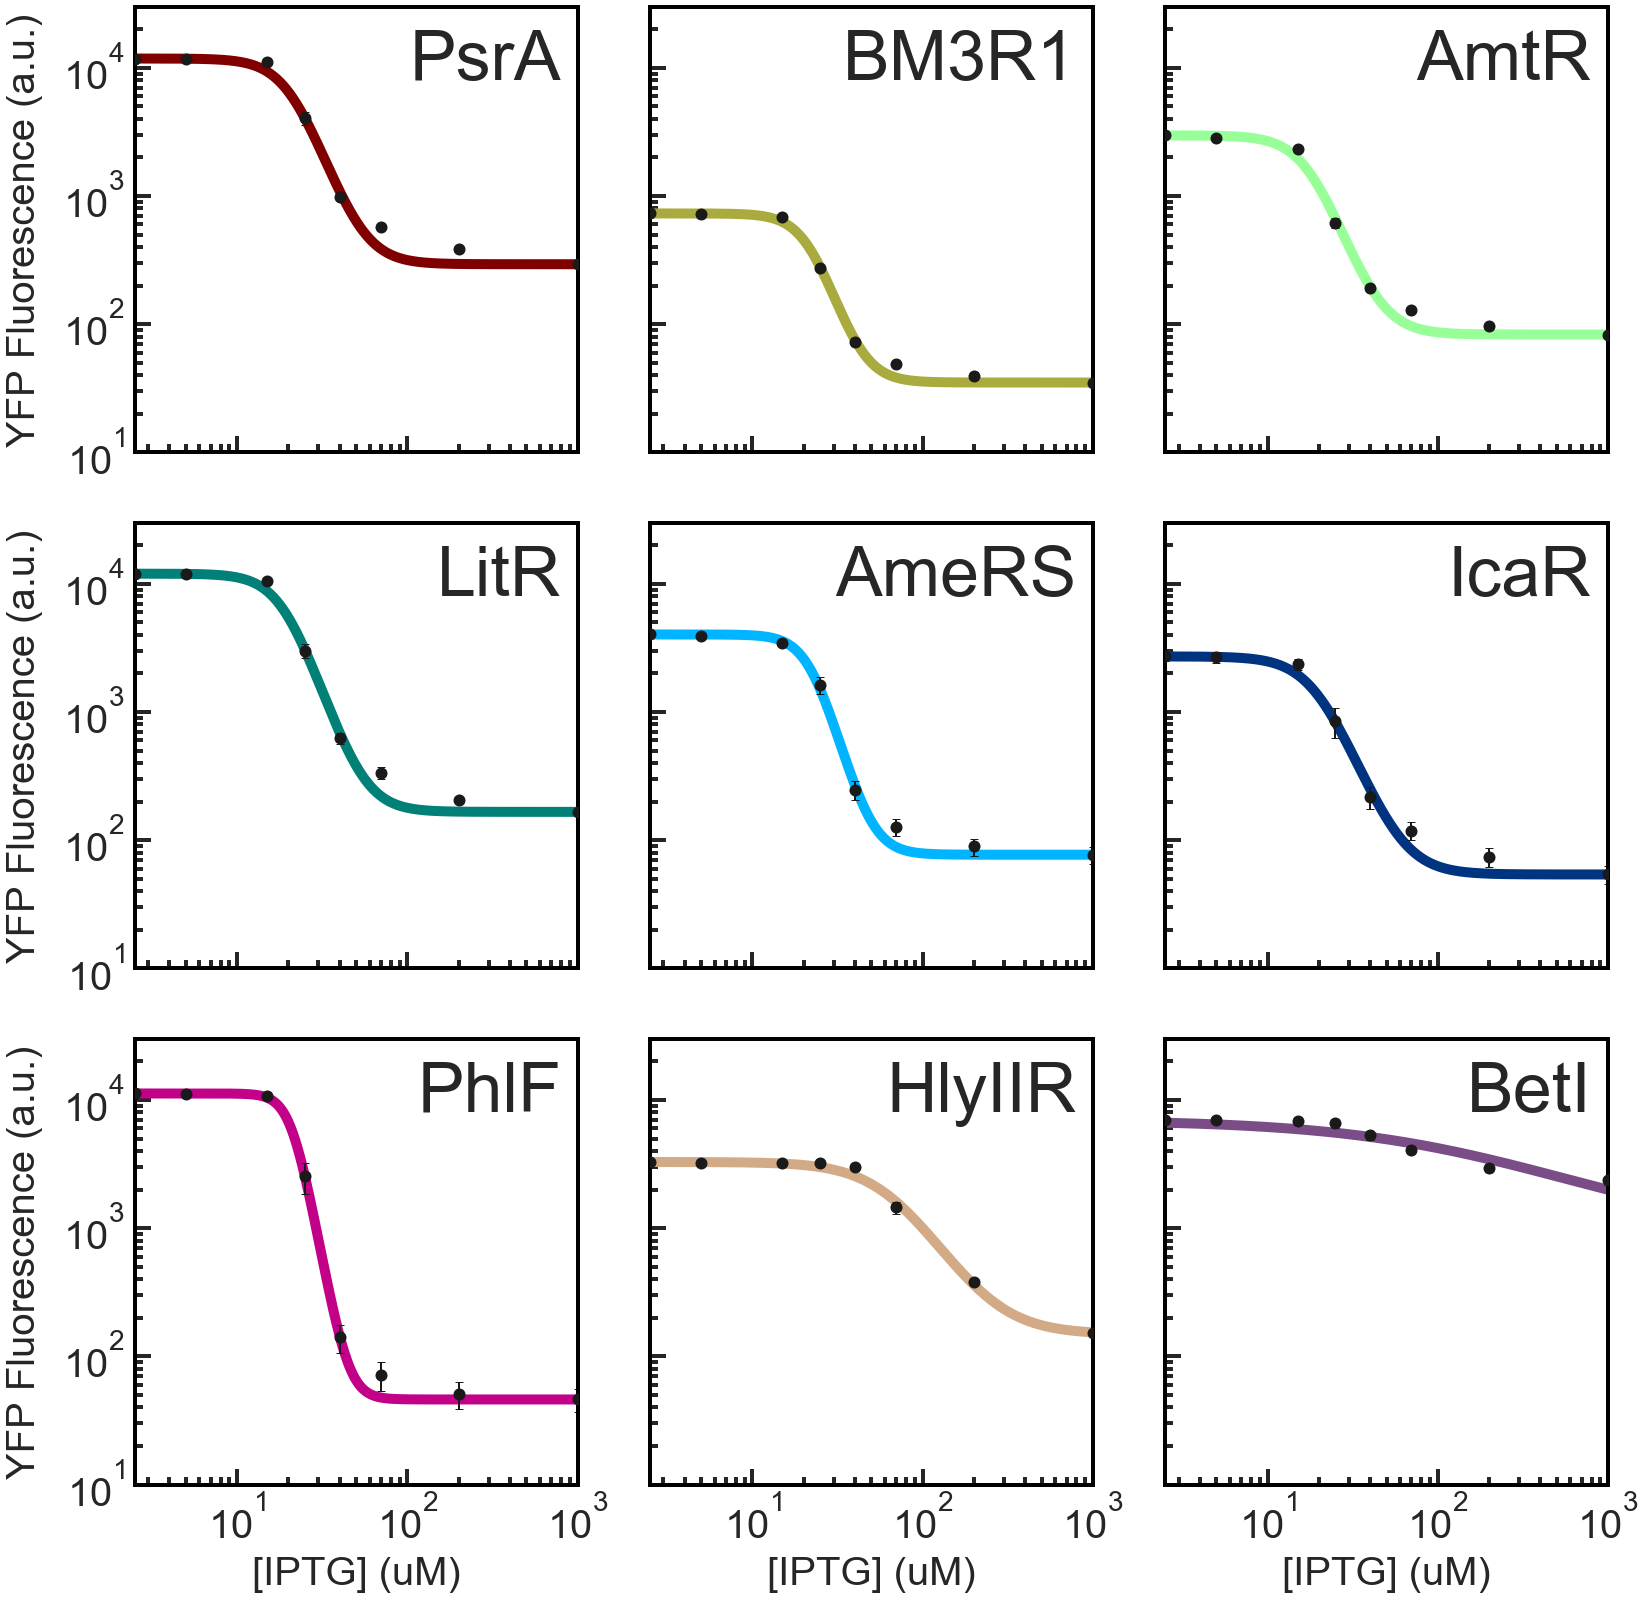

In [28]:
## plot transfer functions with error bars

rows = 3 
cols = 3

fig2_au, ax2_au = plt.subplots(rows,cols, figsize=(cols*7.5,rows*7.5), sharey = 'row', sharex = 'col') # row, column format
# fig, ax = plt.subplots(4,2, figsize=(15,30), sharey = 'row') # row, column format
plt.tight_layout(pad = 6, h_pad = 6, w_pad = 6) #tidies up spacing between plots


tfs_means_au = dict()

for s in strains:

    FP = ax2_au[fig_pos[s]['fig_row']][fig_pos[s]['fig_col']]

    for spine in FP.spines.values():
                spine.set_edgecolor('black')
                spine.set_linewidth(4)

    ## transfer functions
    tfs_means_au[s] = build_transfer_functions([inducer_info['plot_conc']], # x data
                                        [means['au'][s].tolist()], # y data
                                        [s], # name
                                        'repressor') # kind

    ## scatter
    FP.scatter(tfs_means_au[s][0].inputs, tfs_means_au[s][0].outputs,
                                            s = 100, zorder=3,
                                             marker = 'o',
                                             c = 'k',
                                             edgecolors = 'k', linewidths = 2)#,


    ## errorbars
    FP.errorbar(tfs_means_au[s][0].inputs, tfs_means_au[s][0].outputs, yerr = stdevs['au'][s],
                                                zorder=2, fmt = 'none', # plots just error bars, no marker or line
                                                c = 'k', elinewidth = 2, capsize = 4)#,
#                                                                     label = legend_names[strain_info[s]['parent']])

    ## fitting line
    xvals = np.logspace(np.log10(inducer_info['plot_conc'][0]),np.log10(inducer_info['plot_conc'][-1]), 1000) # x values for creating smooth line

    FP.plot(xvals, tfs_means_au[s][0].hill_eqn_rep(xvals),
                                      color = strain_info_rep[s]['color'],
                                      zorder = 1, linewidth = 10)#, label = legend_names[strain_info[s]['parent']])

#             ## plotting empty data as legend entry creation so that I can do marker and line despite them being different data that is plotted
#             FP.plot([],[], marker = plot_info[r][i]['marker'],
#                                                                   mec = plot_info[r][i]['edgecolor'],
#                                                                   mew = 2,
#                                                                   mfc = plot_info[r][i]['facecolor'],
#                                                                   ms = 10,
#                                                                   color = plot_info[r][i]['linecolor'],
#                                                                   linewidth = 10, label = s)

    FP.set_yscale('log')
    FP.set_xscale('log')

    if fig_pos[s]['fig_col'] == 0:                
        FP.set_ylabel('YFP Fluorescence (a.u.)', size = 40, labelpad = 20)

    if fig_pos[s]['fig_row'] == rows-1:
        FP.set_xlabel('[IPTG] (uM)', size = 40, labelpad = 10)  

#                 FP.set_title('{}'.format(strain_info[s]['promoter']), 
#                                                        size = 24, pad = 10)
    FP.tick_params(labelsize = 40, length = 16, width = 4, direction = 'in', pad = 10)
    FP.tick_params(which='minor', length = 8, width = 4, direction = 'in')
    FP.set_ylim(10,30000)
    FP.set_xlim(inducer_info['plot_conc'][0],inducer_info['plot_conc'][-1])

    FP.yaxis.grid(False)
    FP.xaxis.grid(False)
#             FP.legend(markerscale = 1, fontsize = 16)
#             FP.legend.legendHandles._legmarker.set_markersize(50)

    FP.text(max(tfs_means_au[s][0].inputs)/1.25, 20000, strain_info_rep[s]['repressor'], 
                                                          verticalalignment = 'top', horizontalalignment = 'right', 
                                                          fontsize = 70)



In [38]:
# fig2_au.savefig('EcN_NOTgates_Inducer_x_AU_ErrorBars_Rep5.pdf', bbox_inches = "tight", transparent = True)

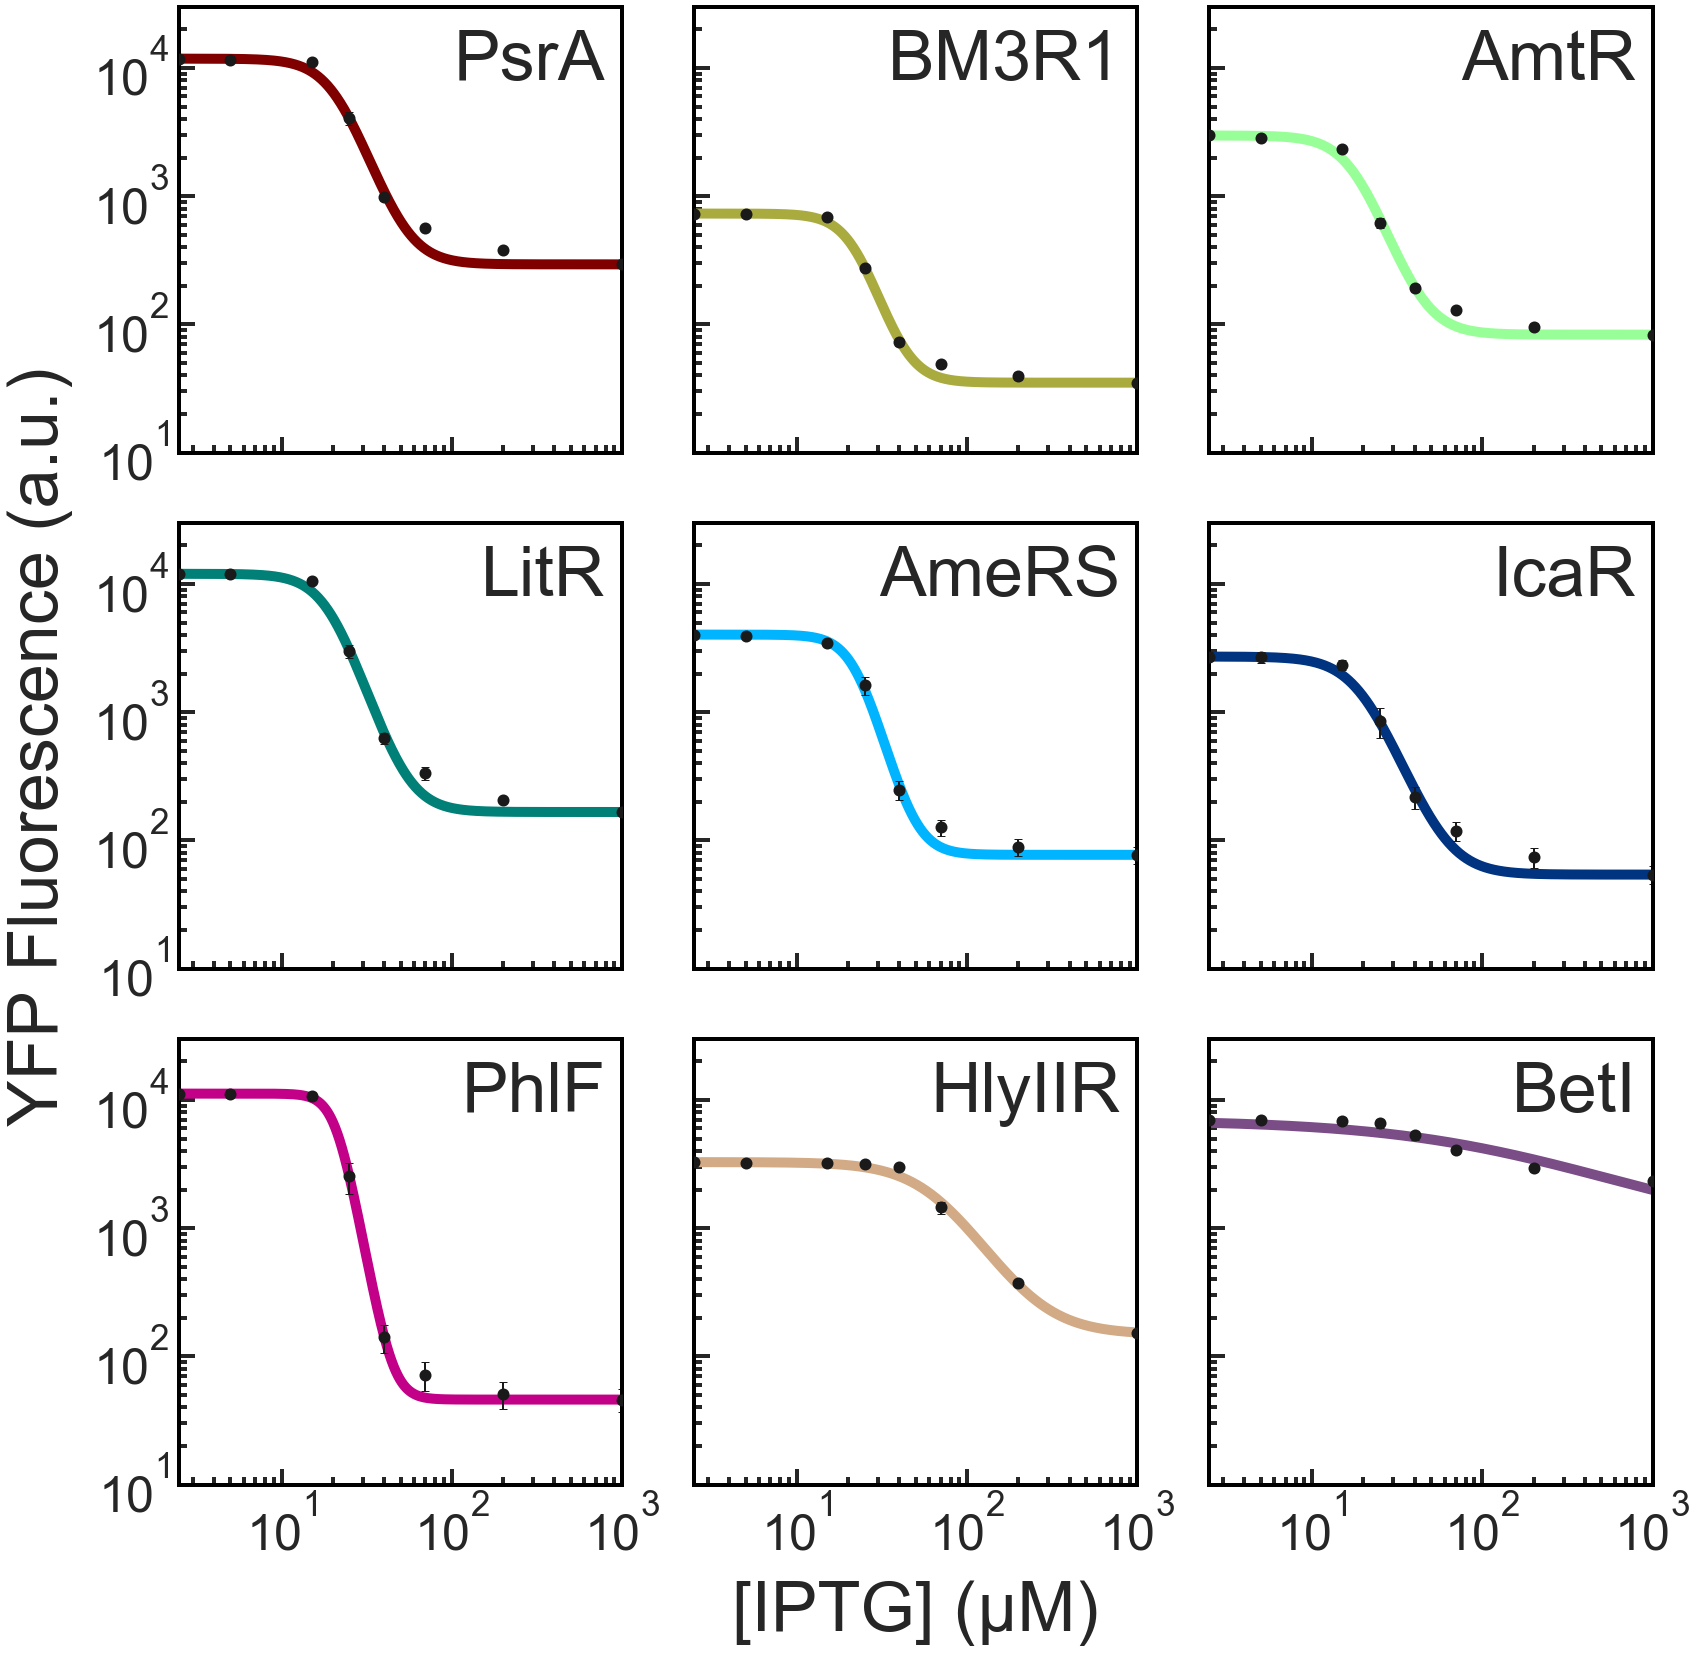

In [29]:
## plot transfer functions with error bars
## for presentations with modifications to spacing and size of labels

rows = 3 
cols = 3

fig2_pres, ax2_pres = plt.subplots(rows, cols, figsize=(cols*7.5,rows*7.5), sharey = 'row', sharex = 'col') # row, column format
# fig, ax = plt.subplots(4,2, figsize=(15,30), sharey = 'row') # row, column format
plt.tight_layout(pad = 6, h_pad = 6, w_pad = 6) #tidies up spacing between plots


tfs_means_au = dict()

for s in strains:

    FP = ax2_pres[fig_pos[s]['fig_row']][fig_pos[s]['fig_col']]

    for spine in FP.spines.values():
                spine.set_edgecolor('black')
                spine.set_linewidth(4)

    ## transfer functions
    tfs_means_au[s] = build_transfer_functions([inducer_info['plot_conc']], # x data
                                        [means['au'][s].tolist()], # y data
                                        [s], # name
                                        'repressor') # kind

    ## scatter
    FP.scatter(tfs_means_au[s][0].inputs, tfs_means_au[s][0].outputs,
                                            s = 100, zorder=3,
                                             marker = 'o',
                                             c = 'k',
                                             edgecolors = 'k', linewidths = 2)#,


    ## errorbars
    FP.errorbar(tfs_means_au[s][0].inputs, tfs_means_au[s][0].outputs, yerr = stdevs['au'][s],
                                                zorder=2, fmt = 'none', # plots just error bars, no marker or line
                                                c = 'k', elinewidth = 2, capsize = 4)#,
#                                                                     label = legend_names[strain_info[s]['parent']])

    ## fitting line
    xvals = np.logspace(np.log10(inducer_info['plot_conc'][0]),np.log10(inducer_info['plot_conc'][-1]), 1000) # x values for creating smooth line

    FP.plot(xvals, tfs_means_au[s][0].hill_eqn_rep(xvals),
                                      color = strain_info_rep[s]['color'],
                                      zorder = 1, linewidth = 10)#, label = legend_names[strain_info[s]['parent']])

#             ## plotting empty data as legend entry creation so that I can do marker and line despite them being different data that is plotted
#             FP.plot([],[], marker = plot_info[r][i]['marker'],
#                                                                   mec = plot_info[r][i]['edgecolor'],
#                                                                   mew = 2,
#                                                                   mfc = plot_info[r][i]['facecolor'],
#                                                                   ms = 10,
#                                                                   color = plot_info[r][i]['linecolor'],
#                                                                   linewidth = 10, label = s)

    FP.set_yscale('log')
    FP.set_xscale('log')

    ax2_pres[1][0].set_ylabel('YFP Fluorescence (a.u.)', size = 70, labelpad = 20)

    ax2_pres[2][1].set_xlabel('[IPTG] (\u03BCM)', size = 70, labelpad = 20)  


#                 FP.set_title('{}'.format(strain_info[s]['promoter']), 
#                                                        size = 24, pad = 10)
    FP.tick_params(labelsize = 50, length = 16, width = 4, direction = 'in', pad = 10)
    FP.tick_params(which='minor', length = 8, width = 4, direction = 'in')
    FP.set_ylim(10,30000)
    FP.set_xlim(inducer_info['plot_conc'][0],inducer_info['plot_conc'][-1])

    FP.yaxis.grid(False)
    FP.xaxis.grid(False)
#             FP.legend(markerscale = 1, fontsize = 16)
#             FP.legend.legendHandles._legmarker.set_markersize(50)

    FP.text(max(tfs_means_au[s][0].inputs)/1.25, 20000, strain_info_rep[s]['repressor'], 
                                                          verticalalignment = 'top', horizontalalignment = 'right', 
                                                          fontsize = 70)



In [40]:
# fig2_pres.savefig('EcN_NOTgates_Inducer_x_AU_ErrorBars_lesslabels_Rep5.pdf', bbox_inches = "tight", transparent = True)


## RPU x RPU

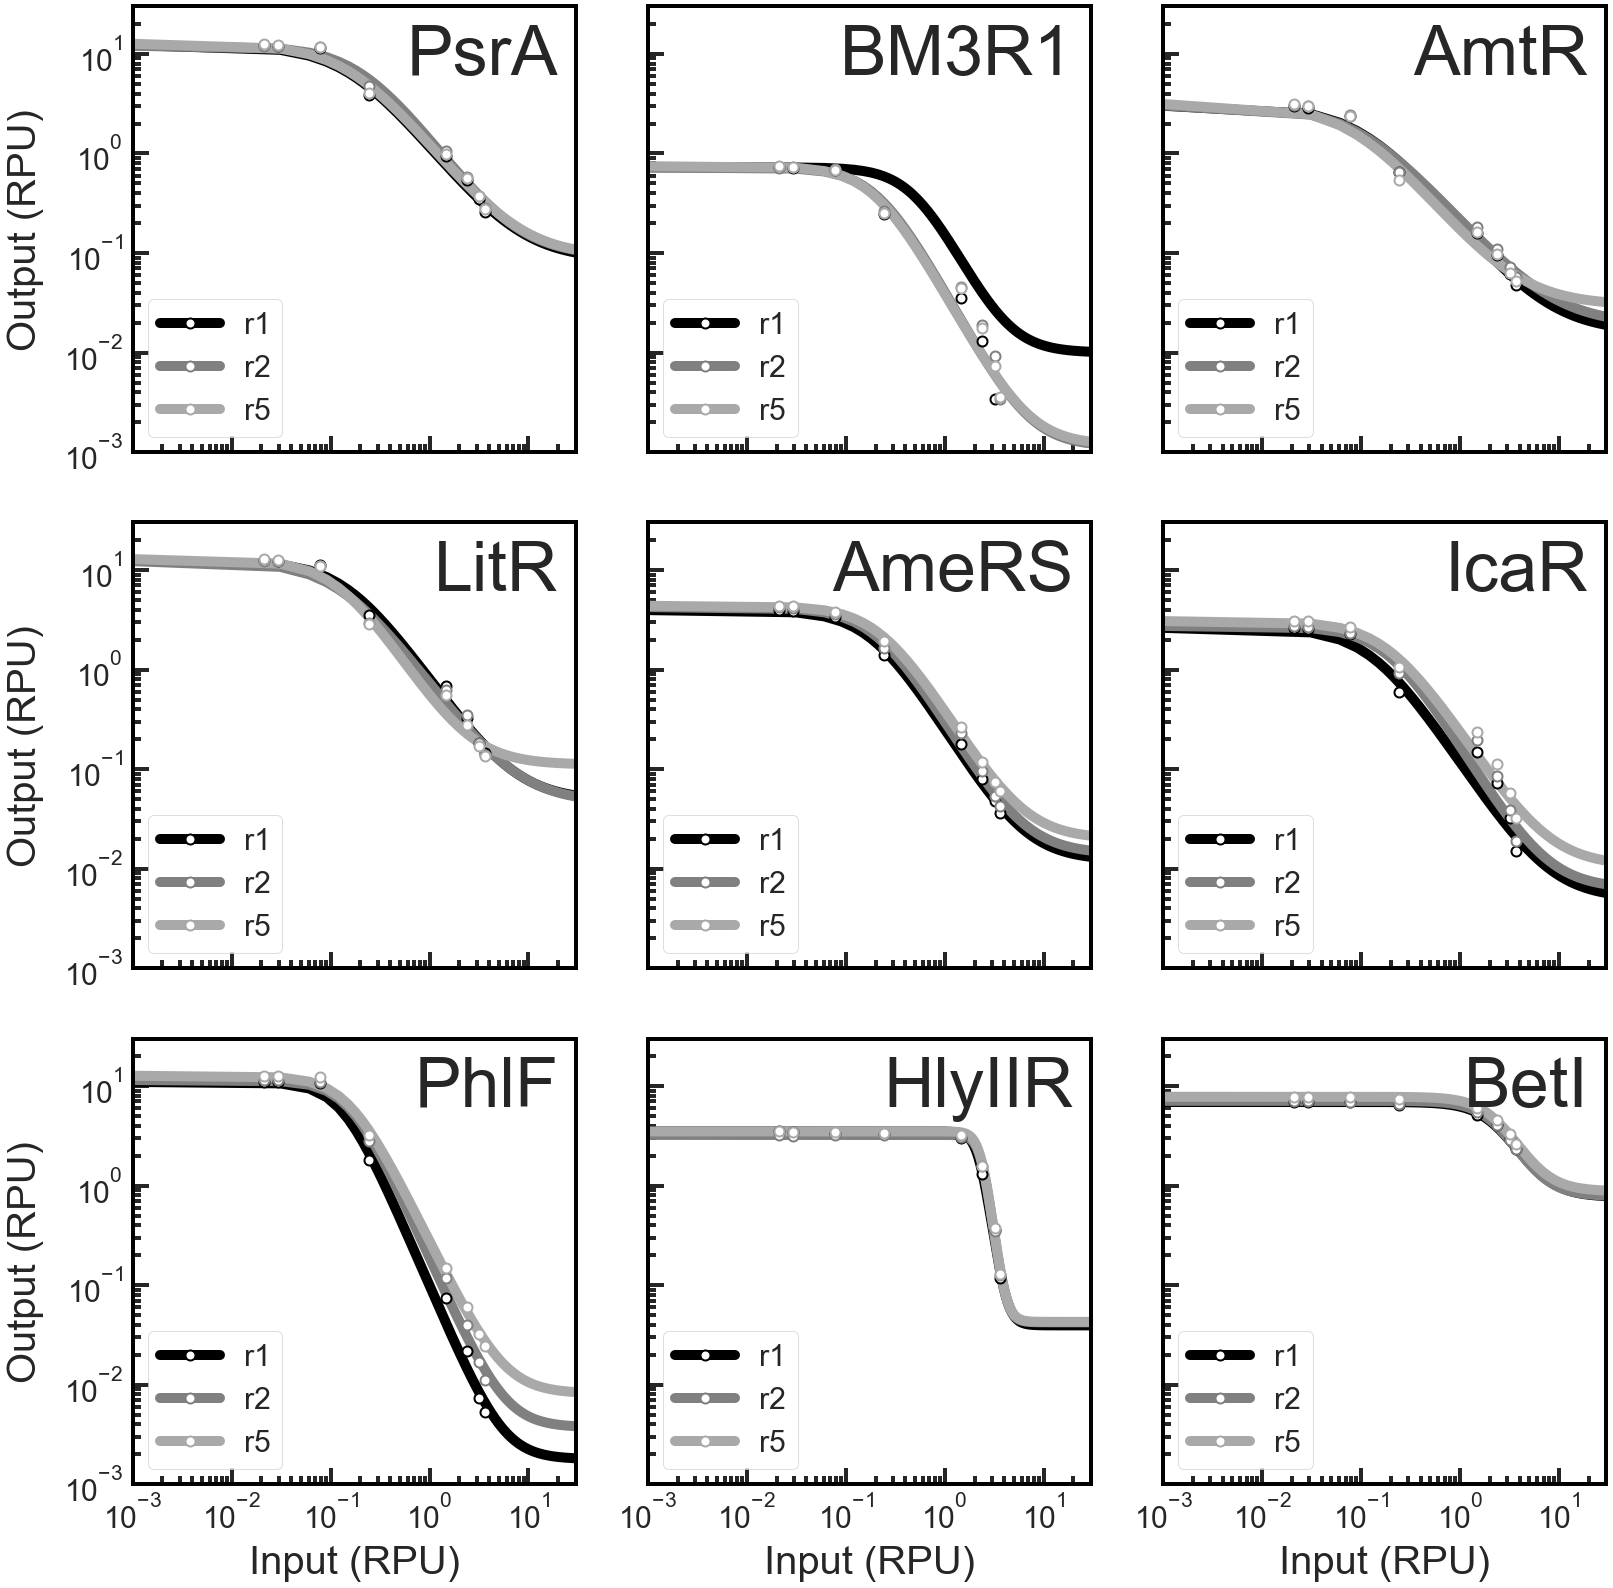

In [42]:
## plot transfer functions of each replicate

rows = 3
cols = 3

fig_RPU, ax_RPU = plt.subplots(rows,cols, figsize=(cols*7.5,rows*7.5), sharey = 'row', sharex = 'col') # row, column format
plt.tight_layout(pad = 6, h_pad = 6, w_pad = 6) #tidies up spacing between plots


tfs_RPU = dict()

for s in strains:
    tfs_RPU[s] = dict()

    FP = ax_RPU[fig_pos[s]['fig_row']][fig_pos[s]['fig_col']]

    for spine in FP.spines.values():
                spine.set_edgecolor('black')
                spine.set_linewidth(4)
            
    for r in ['r1','r2','r5']:

        ## transfer functions
        tfs_RPU[s][r] = build_transfer_functions([AJT269_means_RPU_store], # x data
                                            [r123_RPU[s][r].tolist()], # y data
                                            ['{} {}'.format(s,r)], # name
                                            'repressor') # kind

        ## scatter
        FP.scatter(tfs_RPU[s][r][0].inputs, tfs_RPU[s][r][0].outputs,
                                                    s = 100, zorder=2,
                                                     marker = plot_info[r]['marker'],
                                                     c = plot_info[r]['facecolor'],
                                                     edgecolors = plot_info[r]['edgecolor'], linewidths = 2)#,
#                                                       label = legend_names[strain_info[s]['parent']])

        ## fitting line
        xvals = np.linspace(.001,30,1000) # x values for creating smooth line

        FP.plot(xvals, tfs_RPU[s][r][0].hill_eqn_rep(xvals),
                                          color = plot_info[r]['linecolor'],
                                          zorder = 1, linewidth = 10)#, label = legend_names[strain_info[s]['parent']])

        ## plotting empty data as legend entry creation so that I can do marker and line despite them being different data that is plotted
        FP.plot([],[], marker = plot_info[r]['marker'],
                                          mec = plot_info[r]['edgecolor'],
                                          mew = 2,
                                          mfc = plot_info[r]['facecolor'],
                                          ms = 10,
                                          color = plot_info[r]['linecolor'],
                                          linewidth = 10, label = r)
#     if s in strains4:
#         for r in ['r1','r2','r4']:

#             ## transfer functions
#             tfs_RPU[s][r] = build_transfer_functions([AJT269_means_RPU_store], # x data
#                                                 [r123_RPU[s][r].tolist()], # y data
#                                                 ['{} {}'.format(s,r)]) # name

#             ## scatter
#             FP.scatter(tfs_RPU[s][r][0].inputs, tfs_RPU[s][r][0].outputs,
#                                                         s = 100, zorder=2,
#                                                          marker = plot_info[r]['marker'],
#                                                          c = plot_info[r]['facecolor'],
#                                                          edgecolors = plot_info[r]['edgecolor'], linewidths = 2)#,
# #                                                       label = legend_names[strain_info[s]['parent']])

#             ## fitting line
#             xvals = np.linspace(.001,30,1000) # x values for creating smooth line

#             FP.plot(xvals, tfs_RPU[s][r][0].hill_eqn(xvals),
#                                               color = plot_info[r]['linecolor'],
#                                               zorder = 1, linewidth = 10)#, label = legend_names[strain_info[s]['parent']])

#             ## plotting empty data as legend entry creation so that I can do marker and line despite them being different data that is plotted
#             FP.plot([],[], marker = plot_info[r]['marker'],
#                                               mec = plot_info[r]['edgecolor'],
#                                               mew = 2,
#                                               mfc = plot_info[r]['facecolor'],
#                                               ms = 10,
#                                               color = plot_info[r]['linecolor'],
#                                               linewidth = 10, label = r)

#     elif s in strains3:
#         for r in ['r1','r2','r3']:

#             ## transfer functions
#             tfs_RPU[s][r] = build_transfer_functions([AJT269_means_RPU_store], # x data
#                                                 [r123_RPU[s][r].tolist()], # y data
#                                                 ['{} {}'.format(s,r)]) # name

#             ## scatter
#             FP.scatter(tfs_RPU[s][r][0].inputs, tfs_RPU[s][r][0].outputs,
#                                                         s = 100, zorder=2,
#                                                          marker = plot_info[r]['marker'],
#                                                          c = plot_info[r]['facecolor'],
#                                                          edgecolors = plot_info[r]['edgecolor'], linewidths = 2)#,
#     #                                                       label = legend_names[strain_info[s]['parent']])

#             ## fitting line
#             xvals = np.linspace(.001,30,1000) # x values for creating smooth line

#             FP.plot(xvals, tfs_RPU[s][r][0].hill_eqn(xvals),
#                                               color = plot_info[r]['linecolor'],
#                                               zorder = 1, linewidth = 10)#, label = legend_names[strain_info[s]['parent']])

#             ## plotting empty data as legend entry creation so that I can do marker and line despite them being different data that is plotted
#             FP.plot([],[], marker = plot_info[r]['marker'],
#                                               mec = plot_info[r]['edgecolor'],
#                                               mew = 2,
#                                               mfc = plot_info[r]['facecolor'],
#                                               ms = 10,
#                                               color = plot_info[r]['linecolor'],
#                                               linewidth = 10, label = r)

    FP.set_yscale('log')
    FP.set_xscale('log')

    if fig_pos[s]['fig_col'] == 0:                
        FP.set_ylabel('Output (RPU)', size = 40, labelpad = 20)
    
    if fig_pos[s]['fig_row'] == rows-1:
        FP.set_xlabel('Input (RPU)', size = 40, labelpad = 10)  

#                 FP.set_title('{}'.format(strain_info[s]['promoter']), 
#                                                                                size = 24, pad = 10)
    FP.tick_params(labelsize = 30, length = 16, width = 4, direction = 'in', pad = 10)
    FP.tick_params(which='minor', length = 8, width = 4, direction = 'in')
    FP.set_ylim(0.001, 30)
    FP.set_xlim(0.001, 30)

    FP.yaxis.grid(False)
    FP.xaxis.grid(False)
    FP.legend(markerscale = 1, fontsize = 30, loc = 'lower left')
#             FP.legend.legendHandles._legmarker.set_markersize(50)

    FP.text(20, 20, strain_info_rep[s]['repressor'], 
                  verticalalignment = 'top', horizontalalignment = 'right', 
                  fontsize = 70)



In [42]:
# fig_RPU.savefig('EcN_NOTgates_RPUxRPU_EachReplicate_Rep5.pdf', bbox_inches = "tight", transparent = True)

In [43]:
# type(tfs_means_RPU[s][0])

In [24]:
# ymin, ymax, K, n
YJ_PhlF = [0.01, 5.12, 0.15, 2.4]
YJ_AmtR = [0.04, 4.52, 0.97, 4.3]
YJ_BM3R1 = [0.01, 0.65, 0.40, 2.7]
YJ_AmeRS = [0.03, 3.69, 0.13, 1.7]
YJ_QacR = [0.04, 4.52, 0.97, 4.3]
YJ_BetI = [0.25, 2.25, 1.25, 3.8]

YJparams_RPU = {'AJT312': YJ_PhlF,
               'AJT306': YJ_AmtR,
               'AJT305': YJ_BM3R1,
               'AJT309': YJ_AmeRS,
               'AJT307': YJ_QacR,
               'AJT311': YJ_BetI}


def Sensor(x, ymin, ymax, kd, n):
    return ymin +  (ymax - ymin) * (x**n)/((x**n) + (kd**n))

def NOTgate(x, ymin, ymax, kd, n):
    return ymin +  (ymax - ymin) * (kd**n)/((x**n) + (kd**n))

def YJPparams(x, params):
    ymin = params[0]
    ymax = params[1]
    k = params[2]
    n = params[3]
    return NOTgate(x, ymin, ymax, k, n)

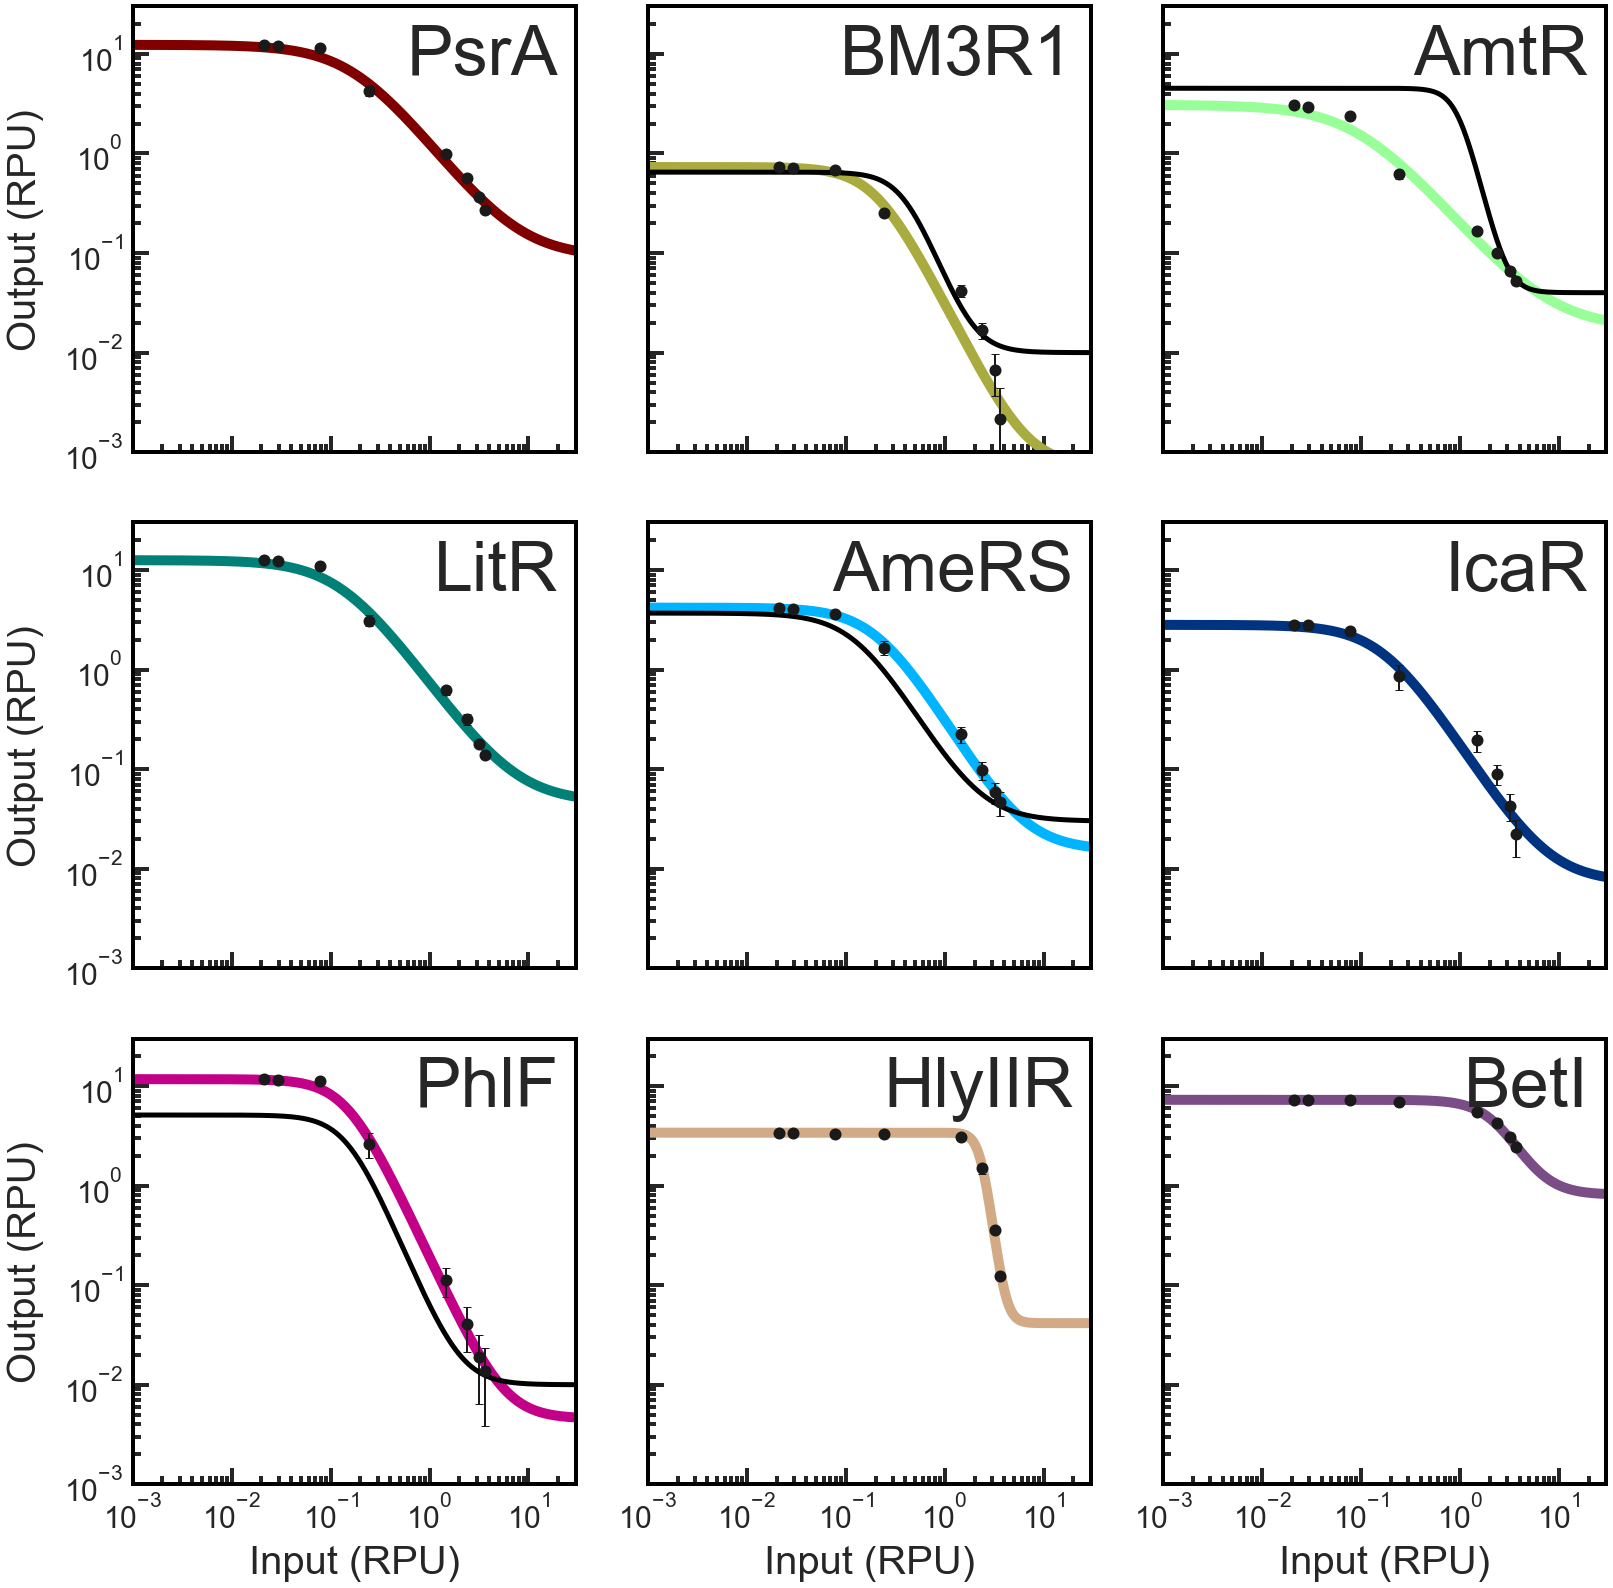

In [32]:
## plot transfer functions with error bars

rows = 3 
cols = 3

fig2_RPU, ax2_RPU = plt.subplots(rows,cols, figsize=(cols*7.5,rows*7.5), sharey = 'row', sharex = 'col') # row, column format
# fig, ax = plt.subplots(4,2, figsize=(15,30), sharey = 'row') # row, column format
plt.tight_layout(pad = 6, h_pad = 6, w_pad = 6) #tidies up spacing between plots


tfs_means_RPU = dict()

for s in strains:

    FP = ax2_RPU[fig_pos[s]['fig_row']][fig_pos[s]['fig_col']]

    for spine in FP.spines.values():
                spine.set_edgecolor('black')
                spine.set_linewidth(4)

    ## transfer functions
    tfs_means_RPU[s] = build_transfer_functions([AJT269_means_RPU_store], # x data
                                        [means_RPU[s].tolist()], # y data
                                        [s], # name
                                        'repressor') # kind

    ## scatter
    FP.scatter(tfs_means_RPU[s][0].inputs, tfs_means_RPU[s][0].outputs,
                                            s = 100, zorder=3,
                                             marker = 'o',
                                             c = 'k',
                                             edgecolors = 'k', linewidths = 2)#,


    ## errorbars
    FP.errorbar(tfs_means_RPU[s][0].inputs, tfs_means_RPU[s][0].outputs, yerr = stdevs_RPU[s],
                                                zorder=2, fmt = 'none', # plots just error bars, no marker or line
                                                c = 'k', elinewidth = 2, capsize = 4)#,
#                                                                     label = legend_names[strain_info[s]['parent']])

    ## fitting line
    xvals = np.logspace(np.log10(0.001),np.log10(30), 1000) # x values for creating smooth line

    if s in ['AJT305','AJT306','AJT309','AJT312']:
        yvals = NOTgate(xvals, *YJparams_RPU[s])

        FP.plot(xvals, yvals, color = 'black', zorder = 2, linewidth = 5)#, label = legend_names[strain_info[s]['parent']])


    FP.plot(xvals, tfs_means_RPU[s][0].hill_eqn_rep(xvals),
                                      color = strain_info_rep[s]['color'],
                                      zorder = 1, linewidth = 10)#, label = legend_names[strain_info[s]['parent']])

#             ## plotting empty data as legend entry creation so that I can do marker and line despite them being different data that is plotted
#             FP.plot([],[], marker = plot_info[r][i]['marker'],
#                                                                   mec = plot_info[r][i]['edgecolor'],
#                                                                   mew = 2,
#                                                                   mfc = plot_info[r][i]['facecolor'],
#                                                                   ms = 10,
#                                                                   color = plot_info[r][i]['linecolor'],
#                                                                   linewidth = 10, label = s)

    FP.set_yscale('log')
    FP.set_xscale('log')

    if fig_pos[s]['fig_col'] == 0:                
        FP.set_ylabel('Output (RPU)', size = 40, labelpad = 20)
    
    if fig_pos[s]['fig_row'] == rows-1:
        FP.set_xlabel('Input (RPU)', size = 40, labelpad = 10)  

#                 FP.set_title('{}'.format(strain_info[s]['promoter']), 
#                                                                                size = 24, pad = 10)
    FP.tick_params(labelsize = 30, length = 16, width = 4, direction = 'in', pad = 10)
    FP.tick_params(which='minor', length = 8, width = 4, direction = 'in')
    FP.set_ylim(0.001, 30)
    FP.set_xlim(0.001, 30)

    FP.yaxis.grid(False)
    FP.xaxis.grid(False)

    FP.text(20, 20, strain_info_rep[s]['repressor'], 
                  verticalalignment = 'top', horizontalalignment = 'right', 
                  fontsize = 70)


In [46]:
# fig2_RPU.savefig('EcN_NOTgates_RPUxRPU_ErrorBars_Rep5.pdf', bbox_inches = "tight", transparent = True)

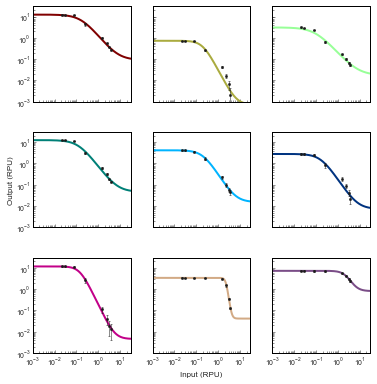

In [33]:
## plot transfer functions with error bars
## for presentations with modifications to spacing and size of labels

rows = 3 
cols = 3

fig_width = 7.2/4*3 # to maintain same size as sensor transfer functions

fig2_pres_RPU, ax2_pres_RPU = plt.subplots(rows, cols, 
                                           figsize=(fig_width,fig_width),
                                           sharey = 'row', sharex = 'col') # row, column format
# fig, ax = plt.subplots(4,2, figsize=(15,30), sharey = 'row') # row, column format
plt.tight_layout(pad = 1, h_pad = 2, w_pad = 1) #tidies up spacing between plots

tfs_means_RPU = dict()

for s in strains:

    FP = ax2_pres_RPU[fig_pos[s]['fig_row']][fig_pos[s]['fig_col']]

    for spine in FP.spines.values():
                spine.set_edgecolor('black')
                spine.set_linewidth(1)

    ## transfer functions
    tfs_means_RPU[s] = build_transfer_functions([AJT269_means_RPU_store], # x data
                                        [means_RPU[s].tolist()], # y data
                                        [s], # name
                                        'repressor') # kind

    ## scatter
    FP.scatter(tfs_means_RPU[s][0].inputs, tfs_means_RPU[s][0].outputs,
                                            s = 5, zorder=3,
                                             marker = 'o',
                                             c = 'k',
                                             edgecolors = 'k', linewidths = 0.5)#,


    ## errorbars
    FP.errorbar(tfs_means_RPU[s][0].inputs, tfs_means_RPU[s][0].outputs, yerr = stdevs_RPU[s],
                                                zorder=2, fmt = 'none', # plots just error bars, no marker or line
                                                c = 'k', elinewidth = 0.5, capsize = 1, capthick = 0.5)#,
#                                                                     label = legend_names[strain_info[s]['parent']])

    ## fitting line
    xvals = np.logspace(np.log10(0.0001),np.log10(10000), 1000) # x values for creating smooth line

    FP.plot(xvals, tfs_means_RPU[s][0].hill_eqn_rep(xvals),
                                      color = strain_info_rep[s]['color'],
                                      zorder = 1, linewidth = 2)#, label = legend_names[strain_info[s]['parent']])

#             ## plotting empty data as legend entry creation so that I can do marker and line despite them being different data that is plotted
#             FP.plot([],[], marker = plot_info[r][i]['marker'],
#                                                                   mec = plot_info[r][i]['edgecolor'],
#                                                                   mew = 2,
#                                                                   mfc = plot_info[r][i]['facecolor'],
#                                                                   ms = 10,
#                                                                   color = plot_info[r][i]['linecolor'],
#                                                                   linewidth = 10, label = s)

    FP.set_yscale('log')
    FP.set_xscale('log')

    ax2_pres_RPU[1][0].set_ylabel('Output (RPU)', size = 8, labelpad = 2)

    ax2_pres_RPU[2][1].set_xlabel('Input (RPU)', size = 8, labelpad = 2)  


#                 FP.set_title('{}'.format(strain_info[s]['promoter']), 
#                                                        size = 24, pad = 10)
    FP.tick_params(labelsize = 7, length = 3, width = 0.5, direction = 'in', pad = 2)
    FP.tick_params(which='minor', length = 2, width = 0.5, direction = 'in')
    FP.set_ylim(0.001, 30)
    FP.set_xlim(0.001, 30)

    FP.yaxis.grid(False)
    FP.xaxis.grid(False)

#     FP.text(.00175, .00125, strain_info_rep[s]['repressor'], 
#                   verticalalignment = 'bottom', horizontalalignment = 'left', 
#                   fontsize = 70)



In [48]:
# fig2_pres_RPU.savefig('EcN_NOTgates_RPUxRPU_ErrorBars_lesslabels_Rep5.pdf', bbox_inches = "tight", transparent = True)


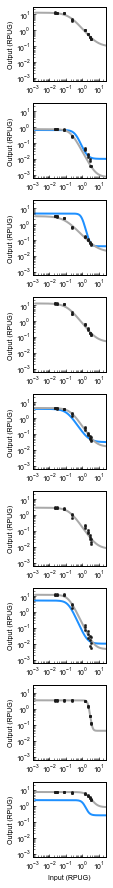

In [62]:
fig_pos_QacR = {'AJT303': {'fig_row': 0, 'fig_col': 0},
           'AJT305': {'fig_row': 0, 'fig_col': 1},
           'AJT306': {'fig_row': 0, 'fig_col': 2},
           'AJT308': {'fig_row': 1, 'fig_col': 0},
           'AJT309': {'fig_row': 1, 'fig_col': 1},
           'AJT310': {'fig_row': 1, 'fig_col': 2},
           'AJT312': {'fig_row': 2, 'fig_col': 0},
           'AJT304': {'fig_row': 2, 'fig_col': 1},
           'AJT311': {'fig_row': 2, 'fig_col': 2},
           'AJT307': {'fig_row': 3, 'fig_col': 0}
          }


right_color = 'dodgerblue'

## plot transfer functions with error bars
## for presentations with modifications to spacing and size of labels

# rows = 10
rows = 9 
cols = 1

# fig2_RPU_1col, ax2_RPU_1col = plt.subplots(rows,cols, figsize=(1.69*cols,1.38*rows), sharey = 'row') # row, column format
# fig2_RPU_1col_8onpage, ax2_RPU_1col_8onpage = plt.subplots(rows,cols, figsize=(1.71*(8/rows),1.36*8), sharey = 'row') # row, column format
fig2_RPU_1col_8onpage, ax2_RPU_1col_8onpage = plt.subplots(rows,cols, figsize=(1.69*cols,1.38*rows), sharey = 'row')

# fig, ax = plt.subplots(4,2, figsize=(15,30), sharey = 'row') # row, column format
plt.tight_layout(h_pad = 0) #tidies up spacing between plots

tfs_means_RPU = dict()

for s in strains:# + ['AJT307']:

#     FP = ax2_RPU_1col[(fig_pos_QacR[s]['fig_row']*3)+fig_pos_QacR[s]['fig_col']]
    FP = ax2_RPU_1col_8onpage[(fig_pos_QacR[s]['fig_row']*3)+fig_pos_QacR[s]['fig_col']]

    for spine in FP.spines.values():
                spine.set_edgecolor('black')
                FP.spines['left'].set_edgecolor('black')
                FP.spines['bottom'].set_edgecolor('black')
                spine.set_linewidth(1)

                
    if s in strains:
        ## transfer functions
        tfs_means_RPU[s] = build_transfer_functions([AJT269_means_RPU_store], # x data
                                            [means_RPU[s].tolist()], # y data
                                            [s], # name
                                            'repressor') # kind

        for r in reps:
        ## scatter
            FP.scatter(tfs_RPU[s][r][0].inputs, tfs_RPU[s][r][0].outputs,
    #             tfs_means_RPU[s][0].inputs, tfs_means_RPU[s][0].outputs,
                                                    s = 5, zorder=3,
                                                     marker = 'o',
                                                     c = 'k',
                                                     edgecolors = 'k', linewidths = 0.5)#,


#         ## errorbars
#         FP.errorbar(tfs_means_RPU[s][0].inputs, tfs_means_RPU[s][0].outputs, yerr = stdevs_RPU[s],
#                                                     zorder=2, fmt = 'none', # plots just error bars, no marker or line
#                                                     c = 'k', elinewidth = 0.5, capsize = 1, capthick = 0.5)#,
#     #                                                                     label = legend_names[strain_info[s]['parent']])

        ## fitting line
        xvals = np.logspace(np.log10(0.0001/0.073),np.log10(3/0.073), 1000) # x values for creating smooth line

        FP.plot(xvals, tfs_means_RPU[s][0].hill_eqn_rep(xvals),
                                          color = 'darkgrey',
                                          zorder = 1, linewidth = 2)#, label = legend_names[strain_info[s]['parent']])
    
    
    if s in YJparams_RPU.keys():
#         print(YJPparams(tfs_means_RPU[s][0].inputs, YJparams_RPU[s]))
        FP.plot(xvals, YJPparams(xvals, YJparams_RPU[s]),
                color = right_color, zorder = 0, linewidth = 2)#, label = legend_names[strain_info[s]['parent']])

#             ## plotting empty data as legend entry creation so that I can do marker and line despite them being different data that is plotted
#             FP.plot([],[], marker = plot_info[r][i]['marker'],
#                                                                   mec = plot_info[r][i]['edgecolor'],
#                                                                   mew = 2,
#                                                                   mfc = plot_info[r][i]['facecolor'],
#                                                                   ms = 10,
#                                                                   color = plot_info[r][i]['linecolor'],
#                                                                   linewidth = 10, label = s)

    FP.set_yscale('log')
    FP.set_xscale('log')

    FP.set_ylabel('Output (RPUG)', size = 7, labelpad = 2, color = 'black')

#     ax2_RPU_1col[8].set_xlabel('Input (RPUG)', size = 8, labelpad = 2, color = 'black')  
    ax2_RPU_1col_8onpage[8].set_xlabel('Input (RPUG)', size = 7, labelpad = 2, color = 'black')  


#                 FP.set_title('{}'.format(strain_info[s]['promoter']), 
#                                                        size = 24, pad = 10)

    ## set x ticks
    x_major = matplotlib.ticker.LogLocator(base = 10.0, numticks = 5)
    FP.xaxis.set_major_locator(x_major)
    x_minor = matplotlib.ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
    FP.xaxis.set_minor_locator(x_minor)
    FP.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
            
    ## set x ticks
    y_major = matplotlib.ticker.LogLocator(base = 10.0, numticks = 5)
    FP.yaxis.set_major_locator(y_major)
    y_minor = matplotlib.ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
    FP.yaxis.set_minor_locator(y_minor)
    FP.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())    
    
    FP.tick_params(labelsize = 7, length = 3, width = 0.5, direction = 'in', pad = 2, colors = 'black')
    FP.tick_params(which='minor', length = 2, width = 0.5, direction = 'in', colors = 'black')
    
    FP.set_xlim(0.001, 30)
    FP.set_ylim(0.0006, 30)

    FP.yaxis.grid(False)
    FP.xaxis.grid(False)

#     FP.text(.00175, .00125, strain_info_rep[s]['repressor'], 
#                   verticalalignment = 'bottom', horizontalalignment = 'left', 
#                   fontsize = 70)



In [54]:
for s in strains:
    y = tfs_means_RPU[s][0].outputs
    yfit = tfs_means_RPU[s][0].hill_eqn_rep(tfs_means_RPU[s][0].inputs)

    r_squared = 1 - (sum((y - (yfit))**2) / ((len(y) - 1) * np.var(y, ddof=1)))
    print(s, round(r_squared, 2))

# tfs_means_RPU[i][s][0].r_squared

AJT303 0.97
AJT304 1.0
AJT305 0.99
AJT306 0.93
AJT308 0.96
AJT309 1.0
AJT310 0.99
AJT311 0.99
AJT312 0.98


In [63]:
# fig2_RPU_1col.savefig('FigS10_EcN_NOTgates_RPUxRPU_AllPoints_onecolumn_darkgrey_withMG1655_withQacR.pdf', bbox_inches = "tight", transparent = True)
# fig2_RPU_1col.savefig('FigS8_S9_EcN_NOTgates_RPUxRPU_AllPoints_onecolumn_darkgrey_withQacR.pdf', bbox_inches = "tight", transparent = True)
# fig2_RPU_1col_8onpage.savefig('FigS10_EcN_NOTgates_RPUxRPU_AllPoints_onecolumn_darkgrey_withMG1655.pdf', bbox_inches = "tight", transparent = True)
# fig2_RPU_1col_8onpage.savefig('FigS8_S9_EcN_NOTgates_RPUxRPU_AllPoints_onecolumn_darkgrey.pdf', bbox_inches = "tight", transparent = True)


/usr/local/lib/python3.6/site-packages/transferfunction.py:69: RuntimeWarning: invalid value encountered in double_scalars


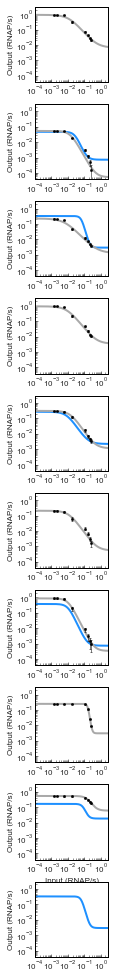

In [101]:
## plot transfer functions with error bars
## for presentations with modifications to spacing and size of labels

rows = 10
cols = 1

fig2_RNAP_1col, ax2_RNAP_1col = plt.subplots(rows,cols, figsize=(1.69*cols,1.38*rows), sharey = 'row') # row, column format
# fig, ax = plt.subplots(4,2, figsize=(15,30), sharey = 'row') # row, column format
plt.tight_layout(h_pad = 0) #tidies up spacing between plots

tfs_means_RNAP = dict()

for s in strains + ['AJT307']:

    FP = ax2_RNAP_1col[(fig_pos_QacR[s]['fig_row']*3)+fig_pos_QacR[s]['fig_col']]

    for spine in FP.spines.values():
                spine.set_edgecolor('black')
                spine.set_linewidth(1)

    if s in strains:
        ## transfer functions
        tfs_means_RNAP[s] = build_transfer_functions([AJT269_means_RNAP_store], # x data
                                            [means_RNAP[s].tolist()], # y data
                                            [s]) # name

        ## scatter
        FP.scatter(tfs_means_RNAP[s][0].inputs, tfs_means_RNAP[s][0].outputs,
                                                s = 5, zorder=3,
                                                 marker = 'o',
                                                 c = 'black',
                                                 edgecolors = 'black', linewidths = 0.5)#,


        ## errorbars
        FP.errorbar(tfs_means_RNAP[s][0].inputs, tfs_means_RNAP[s][0].outputs, yerr = stdevs_RNAP[s],
                                                    zorder=2, fmt = 'none', # plots just error bars, no marker or line
                                                    c = 'black', elinewidth = 0.5, capsize = 1, capthick = 0.5)#,
    #                                                                     label = legend_names[strain_info[s]['parent']])

        ## fitting line
        xvals = np.logspace(np.log10(0.0001),np.log10(3), 1000) # x values for creating smooth line

        FP.plot(xvals, tfs_means_RNAP[s][0].hill_eqn(xvals),
                                          color = 'darkgrey',
                                          zorder = 1, linewidth = 2)#, label = legend_names[strain_info[s]['parent']])

#             ## plotting empty data as legend entry creation so that I can do marker and line despite them being different data that is plotted
#             FP.plot([],[], marker = plot_info[r][i]['marker'],
#                                                                   mec = plot_info[r][i]['edgecolor'],
#                                                                   mew = 2,
#                                                                   mfc = plot_info[r][i]['facecolor'],
#                                                                   ms = 10,
#                                                                   color = plot_info[r][i]['linecolor'],
#                                                                   linewidth = 10, label = s)


    if s in YJparams_RPU.keys():
#         print(YJPparams(tfs_means_RPU[s][0].inputs, YJparams_RPU[s]))
        FP.plot(np.array(xvals), YJPparams(np.array(xvals)/0.073, np.array(YJparams_RPU[s]))*0.073,
                color = right_color, zorder = 0, linewidth = 2)#, label = legend_names[strain_info[s]['parent']])
    
    FP.set_yscale('log')
    FP.set_xscale('log')

    FP.set_ylabel('Output (RNAP/s)', size = 8, labelpad = 2)

    ax2_RNAP_1col[8].set_xlabel('Input (RNAP/s)', size = 8, labelpad = 2)  


#                 FP.set_title('{}'.format(strain_info[s]['promoter']), 
#                                                        size = 24, pad = 10)

    ## set x ticks
    x_major = matplotlib.ticker.LogLocator(base = 10.0, numticks = 5)
    FP.xaxis.set_major_locator(x_major)
    x_minor = matplotlib.ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
    FP.xaxis.set_minor_locator(x_minor)
    FP.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
    
    ## set x ticks
    y_major = matplotlib.ticker.LogLocator(base = 10.0, numticks = 5)
    FP.yaxis.set_major_locator(y_major)
    y_minor = matplotlib.ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
    FP.yaxis.set_minor_locator(y_minor)
    FP.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())    
    
    FP.tick_params(labelsize = 8, length = 3, width = 0.5, direction = 'in', pad = 2)
    FP.tick_params(which='minor', length = 2, width = 0.5, direction = 'in')
            
#     FP.tick_params(labelsize = 7, length = 3, width = 0.5, direction = 'in', pad = 2)
#     FP.tick_params(which='minor', length = 2, width = 0.5, direction = 'in')
    FP.set_ylim(0.00004, 3)
    FP.set_xlim(0.0001, 3)

    FP.yaxis.grid(False)
    FP.xaxis.grid(False)

#     FP.text(.00175, .00125, strain_info_rep[s]['repressor'], 
#                   verticalalignment = 'bottom', horizontalalignment = 'left', 
#                   fontsize = 70)



In [102]:
# fig2_RNAP_1col.savefig('EcN_NOTgates_RNAPxRNAP_ErrorBars_onecolumn_darkgrey_YminRestrict_ymin3fold_withMG1655.pdf', bbox_inches = "tight", transparent = True)


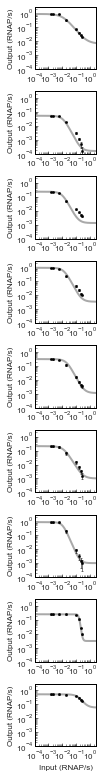

In [53]:
## plot transfer functions with error bars
## for presentations with modifications to spacing and size of labels

rows = 9 
cols = 1

fig2_RNAP_1col_8onpage, ax2_RNAP_1col_8onpage = plt.subplots(rows,cols, figsize=(1.71*(8/rows),1.36*8), sharey = 'row') # row, column format
# fig, ax = plt.subplots(4,2, figsize=(15,30), sharey = 'row') # row, column format
plt.tight_layout(h_pad = 0) #tidies up spacing between plots

tfs_means_RNAP = dict()

for s in strains:

    FP = ax2_RNAP_1col_8onpage[(fig_pos[s]['fig_row']*3)+fig_pos[s]['fig_col']]

    for spine in FP.spines.values():
                spine.set_edgecolor('black')
                spine.set_linewidth(1)

    ## transfer functions
    tfs_means_RNAP[s] = build_transfer_functions([AJT269_means_RNAP_store], # x data
                                        [means_RNAP[s].tolist()], # y data
                                        [s]) # name

    ## scatter
    FP.scatter(tfs_means_RNAP[s][0].inputs, tfs_means_RNAP[s][0].outputs,
                                            s = 5, zorder=3,
                                             marker = 'o',
                                             c = 'black',
                                             edgecolors = 'black', linewidths = 0.5)#,


    ## errorbars
    FP.errorbar(tfs_means_RNAP[s][0].inputs, tfs_means_RNAP[s][0].outputs, yerr = stdevs_RNAP[s],
                                                zorder=2, fmt = 'none', # plots just error bars, no marker or line
                                                c = 'black', elinewidth = 0.5, capsize = 1, capthick = 0.5)#,
#                                                                     label = legend_names[strain_info[s]['parent']])

    ## fitting line
    xvals = np.logspace(np.log10(0.0001),np.log10(10000), 1000) # x values for creating smooth line

    FP.plot(xvals, tfs_means_RNAP[s][0].hill_eqn(xvals),
                                      color = 'darkgrey',
                                      zorder = 1, linewidth = 2)#, label = legend_names[strain_info[s]['parent']])

#             ## plotting empty data as legend entry creation so that I can do marker and line despite them being different data that is plotted
#             FP.plot([],[], marker = plot_info[r][i]['marker'],
#                                                                   mec = plot_info[r][i]['edgecolor'],
#                                                                   mew = 2,
#                                                                   mfc = plot_info[r][i]['facecolor'],
#                                                                   ms = 10,
#                                                                   color = plot_info[r][i]['linecolor'],
#                                                                   linewidth = 10, label = s)

    FP.set_yscale('log')
    FP.set_xscale('log')

    FP.set_ylabel('Output (RNAP/s)', size = 8, labelpad = 2)

    ax2_RNAP_1col_8onpage[8].set_xlabel('Input (RNAP/s)', size = 8, labelpad = 2)  


#                 FP.set_title('{}'.format(strain_info[s]['promoter']), 
#                                                        size = 24, pad = 10)

    ## set x ticks
    x_major = matplotlib.ticker.LogLocator(base = 10.0, numticks = 5)
    FP.xaxis.set_major_locator(x_major)
    x_minor = matplotlib.ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
    FP.xaxis.set_minor_locator(x_minor)
    FP.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
    
    FP.yaxis.set_major_locator(x_major)
    FP.yaxis.set_minor_locator(x_minor)
    FP.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
    
            
    FP.tick_params(labelsize = 8, length = 3, width = 0.5, direction = 'in', pad = 2)
    FP.tick_params(which='minor', length = 2, width = 0.5, direction = 'in')
    FP.set_ylim(0.0001, 3)
    FP.set_xlim(0.0001, 3)

    FP.yaxis.grid(False)
    FP.xaxis.grid(False)

#     FP.text(.00175, .00125, strain_info_rep[s]['repressor'], 
#                   verticalalignment = 'bottom', horizontalalignment = 'left', 
#                   fontsize = 70)



In [54]:
# fig2_RNAP_1col_8onpage.savefig('EcN_NOTgates_RNAPxRNAP_ErrorBars_onecolumn_darkgrey_8onpage.pdf', bbox_inches = "tight", transparent = True)


In [55]:
# type(RNAP_means)

## New Fitting Attempt

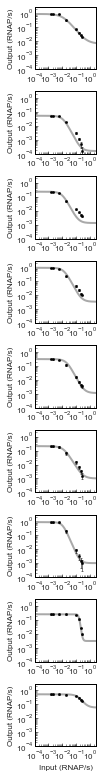

In [56]:
# Jai's fancy script that contains a class that builds transfer functions
## path for it in terminal open -a Sublime\ Text transferfunction.py

%reload_ext autoreload
%autoreload 2 # to make sure that it reloads properly when this is run
from transferfunction import *

## plot transfer functions with error bars
## for presentations with modifications to spacing and size of labels

rows = 9 
cols = 1

fig2_RNAP_1col_8onpage_YminRestrict, ax2_RNAP_1col_8onpage_YminRestrict = plt.subplots(rows,cols, figsize=(1.71*(8/rows),1.36*8), sharey = 'row') # row, column format
# fig, ax = plt.subplots(4,2, figsize=(15,30), sharey = 'row') # row, column format
plt.tight_layout(h_pad = 0) #tidies up spacing between plots

tfs_means_RNAP = dict()

for s in strains:

    FP = ax2_RNAP_1col_8onpage_YminRestrict[(fig_pos[s]['fig_row']*3)+fig_pos[s]['fig_col']]

    for spine in FP.spines.values():
                spine.set_edgecolor('black')
                spine.set_linewidth(1)

    ## transfer functions
    tfs_means_RNAP[s] = build_transfer_functions([AJT269_means_RNAP_store], # x data
                                        [means_RNAP[s].tolist()], # y data
                                        [s]) # name

    ## scatter
    FP.scatter(tfs_means_RNAP[s][0].inputs, tfs_means_RNAP[s][0].outputs,
                                            s = 5, zorder=3,
                                             marker = 'o',
                                             c = 'black',
                                             edgecolors = 'black', linewidths = 0.5)#,


    ## errorbars
    FP.errorbar(tfs_means_RNAP[s][0].inputs, tfs_means_RNAP[s][0].outputs, yerr = stdevs_RNAP[s],
                                                zorder=2, fmt = 'none', # plots just error bars, no marker or line
                                                c = 'black', elinewidth = 0.5, capsize = 1, capthick = 0.5)#,
#                                                                     label = legend_names[strain_info[s]['parent']])

    ## fitting line
    xvals = np.logspace(np.log10(0.0001),np.log10(10000), 1000) # x values for creating smooth line

    FP.plot(xvals, tfs_means_RNAP[s][0].hill_eqn(xvals),
                                      color = 'darkgrey',
                                      zorder = 1, linewidth = 2)#, label = legend_names[strain_info[s]['parent']])

#             ## plotting empty data as legend entry creation so that I can do marker and line despite them being different data that is plotted
#             FP.plot([],[], marker = plot_info[r][i]['marker'],
#                                                                   mec = plot_info[r][i]['edgecolor'],
#                                                                   mew = 2,
#                                                                   mfc = plot_info[r][i]['facecolor'],
#                                                                   ms = 10,
#                                                                   color = plot_info[r][i]['linecolor'],
#                                                                   linewidth = 10, label = s)

    FP.set_yscale('log')
    FP.set_xscale('log')

    FP.set_ylabel('Output (RNAP/s)', size = 8, labelpad = 2)

    ax2_RNAP_1col_8onpage_YminRestrict[8].set_xlabel('Input (RNAP/s)', size = 8, labelpad = 2)  


#                 FP.set_title('{}'.format(strain_info[s]['promoter']), 
#                                                        size = 24, pad = 10)

    ## set x ticks
    x_major = matplotlib.ticker.LogLocator(base = 10.0, numticks = 5)
    FP.xaxis.set_major_locator(x_major)
    x_minor = matplotlib.ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
    FP.xaxis.set_minor_locator(x_minor)
    FP.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
    
    FP.yaxis.set_major_locator(x_major)
    FP.yaxis.set_minor_locator(x_minor)
    FP.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
    
            
    FP.tick_params(labelsize = 8, length = 3, width = 0.5, direction = 'in', pad = 2)
    FP.tick_params(which='minor', length = 2, width = 0.5, direction = 'in')
    FP.set_ylim(0.0001, 3)
    FP.set_xlim(0.0001, 3)

    FP.yaxis.grid(False)
    FP.xaxis.grid(False)

#     FP.text(.00175, .00125, strain_info_rep[s]['repressor'], 
#                   verticalalignment = 'bottom', horizontalalignment = 'left', 
#                   fontsize = 70)



In [57]:
# fig2_RNAP_1col_8onpage_NoYmin.savefig('EcN_NOTgates_RNAPxRNAP_ErrorBars_onecolumn_darkgrey_8onpage_NoYmin.pdf', bbox_inches = "tight", transparent = True)


In [58]:
### different functions to model the growth curve ########################
def Sensor(x, ymin, ymax, kd, n):
    return ymin +  (ymax - ymin) * (x**n)/((x**n) + (kd**n))


def NOTgate(x, ymin, ymax, kd, n):
    return ymin +  (ymax - ymin) * (kd**n)/((x**n) + (kd**n))
##########################################################################

RNAP_means_min = dict()
RNAP_means_max = dict()
results_means = dict()
pcov_means = dict()
fit_params_means = dict()

for s in strains:
    results_means[s] = dict()
    pcov_means[s] = dict()
    fit_params_means[s] = dict()
    
    
    RNAP_means_min[s] = means_RNAP[s].min()
    RNAP_means_max[s] = means_RNAP[s].max()
    
    initial_guesses = [RNAP_means_min[s], RNAP_means_max[s], 0.5, 2] # guesses that work well in Jai's function
    
    # curve fit the test data
    results_means[s], pcov_means[s] = curve_fit(NOTgate, AJT269_means_RNAP_store, means_RNAP[s], initial_guesses)

    # results is a list containing fitted parameter [ymin, ymax, kd, n] 
    fit_params_means[s] = {'ymin': results_means[s][0],
                        'ymax': results_means[s][1],
                        'kd': results_means[s][2],
                        'n': results_means[s][3], # results[s][r][1] = growth_rate

                        # get standard error
                        'std_err': np.sqrt(np.diag(pcov_means[s])) # array listing standard error of growth_rate, lag_time, and double_time
                       }    

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars


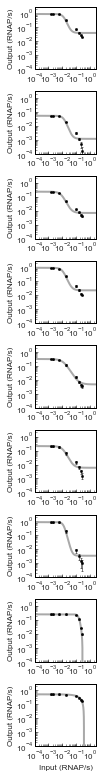

In [59]:
## plot transfer functions with error bars
## for presentations with modifications to spacing and size of labels

rows = 9 
cols = 1

fig_newfit_8onpage, ax_newfit_8onpage = plt.subplots(rows,cols, figsize=(1.71*(8/rows),1.36*8), sharey = 'row') # row, column format
# fig, ax = plt.subplots(4,2, figsize=(15,30), sharey = 'row') # row, column format
plt.tight_layout(h_pad = 0) #tidies up spacing between plots

for s in strains:

    FP = ax_newfit_8onpage[(fig_pos[s]['fig_row']*3)+fig_pos[s]['fig_col']]

    for spine in FP.spines.values():
                spine.set_edgecolor('black')
                spine.set_linewidth(1)

    ## scatter
    FP.scatter(AJT269_means_RNAP_store, means_RNAP[s],
                        s = 5, zorder=3,
                         marker = 'o',
                         c = 'black',
                         edgecolors = 'black', linewidths = 0.5)#,


    ## errorbars
    FP.errorbar(AJT269_means_RNAP_store, means_RNAP[s], yerr = stdevs_RNAP[s],
                zorder=2, fmt = 'none', # plots just error bars, no marker or line
                c = 'black', elinewidth = 0.5, capsize = 1, capthick = 0.5)#,
#                                                                     label = legend_names[strain_info[s]['parent']])

    ## fitting line
    xvals = np.logspace(np.log10(0.0001),np.log10(10000), 1000) # x values for creating smooth line
    yvals = NOTgate(xvals, *results_means[s])

    FP.plot(xvals, yvals, color = 'darkgrey', zorder = 1, linewidth = 2)#, label = legend_names[strain_info[s]['parent']])

#             ## plotting empty data as legend entry creation so that I can do marker and line despite them being different data that is plotted
#             FP.plot([],[], marker = plot_info[r][i]['marker'],
#                                                                   mec = plot_info[r][i]['edgecolor'],
#                                                                   mew = 2,
#                                                                   mfc = plot_info[r][i]['facecolor'],
#                                                                   ms = 10,
#                                                                   color = plot_info[r][i]['linecolor'],
#                                                                   linewidth = 10, label = s)

    FP.set_yscale('log')
    FP.set_xscale('log')

    FP.set_ylabel('Output (RNAP/s)', size = 8, labelpad = 2)

    ax_newfit_8onpage[8].set_xlabel('Input (RNAP/s)', size = 8, labelpad = 2)  


#                 FP.set_title('{}'.format(strain_info[s]['promoter']), 
#                                                        size = 24, pad = 10)

    ## set x ticks
    x_major = matplotlib.ticker.LogLocator(base = 10.0, numticks = 5)
    FP.xaxis.set_major_locator(x_major)
    x_minor = matplotlib.ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
    FP.xaxis.set_minor_locator(x_minor)
    FP.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
    
    FP.yaxis.set_major_locator(x_major)
    FP.yaxis.set_minor_locator(x_minor)
    FP.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
    
            
    FP.tick_params(labelsize = 8, length = 3, width = 0.5, direction = 'in', pad = 2)
    FP.tick_params(which='minor', length = 2, width = 0.5, direction = 'in')
    FP.set_ylim(0.0001, 3)
    FP.set_xlim(0.0001, 3)

    FP.yaxis.grid(False)
    FP.xaxis.grid(False)

#     FP.text(.00175, .00125, strain_info_rep[s]['repressor'], 
#                   verticalalignment = 'bottom', horizontalalignment = 'left', 
#                   fontsize = 70)



In [60]:
# fig_newfit_8onpage.savefig('EcN_NOTgates_RNAPxRNAP_ErrorBars_onecolumn_darkgrey_8onpage_newfit.pdf', bbox_inches = "tight", transparent = True)


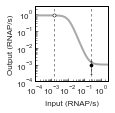

In [61]:
## plot transfer functions with error bars
## for presentations with modifications to spacing and size of labels

rows = 1 
cols = 1

fig2_RNAP_PhlF, ax2_RNAP_PhlF = plt.subplots(rows,cols, figsize=(1.69*cols,1.65*rows), sharey = 'row') # row, column format
# fig, ax = plt.subplots(4,2, figsize=(15,30), sharey = 'row') # row, column format
plt.tight_layout(h_pad = 0) #tidies up spacing between plots

tfs_means_RNAP = dict()

for s in ['AJT312']:

    FP = ax2_RNAP_PhlF

    for spine in FP.spines.values():
                spine.set_edgecolor('black')
                spine.set_linewidth(1)

    ## transfer functions
    tfs_means_RNAP[s] = build_transfer_functions([AJT269_means_RNAP_store], # x data
                                        [means_RNAP[s].tolist()], # y data
                                        [s]) # name

    ## scatter
    FP.scatter(tfs_means_RNAP[s][0].inputs[0], tfs_means_RNAP[s][0].outputs[0],
                                            s = 10, zorder=3,
                                             marker = 'o',
                                             c = 'white',
                                             edgecolors = 'black', linewidths = 0.5)#,
    
    FP.scatter(tfs_means_RNAP[s][0].inputs[1000], tfs_means_RNAP[s][0].outputs[-1],
                    s = 10, zorder=3,
                     marker = 'o',
                     c = 'black',
                     edgecolors = 'black', linewidths = 0.5)#,)


    ## errorbars
    FP.errorbar([tfs_means_RNAP[s][0].inputs[0]] + [tfs_means_RNAP[s][0].inputs[1000]], 
                [tfs_means_RNAP[s][0].outputs[0]] + [tfs_means_RNAP[s][0].outputs[-1]], yerr = [stdevs_RNAP[s][0]] + [stdevs_RNAP[s][1000]],
                                                zorder=2, fmt = 'none', # plots just error bars, no marker or line
                                                c = 'k', elinewidth = 0.5, capsize = 1, capthick = 0.5)#,
#                                                                     label = legend_names[strain_info[s]['parent']])

    ## fitting line
    xvals = np.logspace(np.log10(0.0001),np.log10(10000), 1000) # x values for creating smooth line

    FP.plot(xvals, tfs_means_RNAP[s][0].hill_eqn(xvals),
                                      color = 'darkgrey',
                                      zorder = 1, linewidth = 2)#, label = legend_names[strain_info[s]['parent']])

#             ## plotting empty data as legend entry creation so that I can do marker and line despite them being different data that is plotted
#             FP.plot([],[], marker = plot_info[r][i]['marker'],
#                                                                   mec = plot_info[r][i]['edgecolor'],
#                                                                   mew = 2,
#                                                                   mfc = plot_info[r][i]['facecolor'],
#                                                                   ms = 10,
#                                                                   color = plot_info[r][i]['linecolor'],
#                                                                   linewidth = 10, label = s)

    FP.set_yscale('log')
    FP.set_xscale('log')

    FP.set_ylabel('Output (RNAP/s)', size = 8, labelpad = 2)

    FP.set_xlabel('Input (RNAP/s)', size = 8, labelpad = 2)  


#                 FP.set_title('{}'.format(strain_info[s]['promoter']), 
#                                                        size = 24, pad = 10)

    ## set x ticks
    x_major = matplotlib.ticker.LogLocator(base = 10.0, numticks = 5)
    FP.xaxis.set_major_locator(x_major)
    x_minor = matplotlib.ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
    FP.xaxis.set_minor_locator(x_minor)
    FP.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
    
    ## set y ticks
    FP.yaxis.set_major_locator(x_major)
    FP.yaxis.set_minor_locator(x_minor)
    FP.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
            
    FP.tick_params(labelsize = 8, length = 3, width = 0.5, direction = 'in', pad = 2)
    FP.tick_params(which='minor', length = 2, width = 0.5, direction = 'in')
    
    ymin = 0.0001
    ymax = 3
    
    FP.set_ylim(ymin, ymax)
    FP.set_xlim(ymin, ymax)

    FP.yaxis.grid(False)
    FP.xaxis.grid(False)
    
    FP.vlines(tfs_means_RNAP[s][0].inputs[0], ymin, ymax, linestyle = (0, (5, 5)), linewidth = 0.5)
    FP.vlines(tfs_means_RNAP[s][0].inputs[1000], ymin, ymax, linestyle = (0, (5, 5)), linewidth = 0.5)

#     FP.text(.00175, .00125, strain_info_rep[s]['repressor'], 
#                   verticalalignment = 'bottom', horizontalalignment = 'left', 
#                   fontsize = 70)



In [62]:
# fig2_RNAP_PhlF.savefig('EcN_NOTgates_RNAPxRNAP_ErrorBars_PhlFonly_YminRestrict_ymin3fold.pdf', bbox_inches = "tight", transparent = True)


/usr/local/lib/python3.6/site-packages/transferfunction.py:69: RuntimeWarning: invalid value encountered in double_scalars


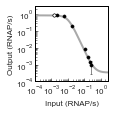

In [78]:
## plot transfer functions with error bars
## for presentations with modifications to spacing and size of labels

rows = 1 
cols = 1

fig2_RNAP_PhlF_conv, ax2_RNAP_PhlF_conv = plt.subplots(rows,cols, figsize=(1.69*cols,1.65*rows), sharey = 'row') # row, column format
# fig, ax = plt.subplots(4,2, figsize=(15,30), sharey = 'row') # row, column format
plt.tight_layout(h_pad = 0) #tidies up spacing between plots

tfs_means_RNAP = dict()

for s in ['AJT312']:

    FP = ax2_RNAP_PhlF_conv

    for spine in FP.spines.values():
                spine.set_edgecolor('black')
                spine.set_linewidth(1)

    ## transfer functions
    tfs_means_RNAP[s] = build_transfer_functions([AJT269_means_RNAP_store], # x data
                                        [means_RNAP[s].tolist()], # y data
                                        [s]) # name

    ## scatter
    FP.scatter(tfs_means_RNAP[s][0].inputs[0], tfs_means_RNAP[s][0].outputs[0],
                                            s = 10, zorder=4,
                                             marker = 'o',
                                             c = 'white',
                                             edgecolors = 'black', linewidths = 0.5)#,
    
    FP.scatter(tfs_means_RNAP[s][0].inputs, tfs_means_RNAP[s][0].outputs,
                    s = 10, zorder=3,
                     marker = 'o',
                     c = 'black',
                     edgecolors = 'black', linewidths = 0.5)#,)


    ## errorbars
    FP.errorbar([tfs_means_RNAP[s][0].inputs[0]] + [tfs_means_RNAP[s][0].inputs[1000]], 
                [tfs_means_RNAP[s][0].outputs[0]] + [tfs_means_RNAP[s][0].outputs[-1]], yerr = [stdevs_RNAP[s][0]] + [stdevs_RNAP[s][1000]],
                                                zorder=2, fmt = 'none', # plots just error bars, no marker or line
                                                c = 'k', elinewidth = 0.5, capsize = 1, capthick = 0.5)#,
# #                                                                     label = legend_names[strain_info[s]['parent']])

    ## fitting line
    xvals = np.logspace(np.log10(0.0001),np.log10(10000), 1000) # x values for creating smooth line

    FP.plot(xvals, tfs_means_RNAP[s][0].hill_eqn(xvals),
                                      color = 'darkgrey',
                                      zorder = 1, linewidth = 2)#, label = legend_names[strain_info[s]['parent']])

#             ## plotting empty data as legend entry creation so that I can do marker and line despite them being different data that is plotted
#             FP.plot([],[], marker = plot_info[r][i]['marker'],
#                                                                   mec = plot_info[r][i]['edgecolor'],
#                                                                   mew = 2,
#                                                                   mfc = plot_info[r][i]['facecolor'],
#                                                                   ms = 10,
#                                                                   color = plot_info[r][i]['linecolor'],
#                                                                   linewidth = 10, label = s)

    FP.set_yscale('log')
    FP.set_xscale('log')

    FP.set_ylabel('Output (RNAP/s)', size = 8, labelpad = 2)

    FP.set_xlabel('Input (RNAP/s)', size = 8, labelpad = 2)  


#                 FP.set_title('{}'.format(strain_info[s]['promoter']), 
#                                                        size = 24, pad = 10)

    ## set x ticks
    x_major = matplotlib.ticker.LogLocator(base = 10.0, numticks = 5)
    FP.xaxis.set_major_locator(x_major)
    x_minor = matplotlib.ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
    FP.xaxis.set_minor_locator(x_minor)
    FP.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
    
    ## set y ticks
    FP.yaxis.set_major_locator(x_major)
    FP.yaxis.set_minor_locator(x_minor)
    FP.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
            
    FP.tick_params(labelsize = 8, length = 3, width = 0.5, direction = 'in', pad = 2)
    FP.tick_params(which='minor', length = 2, width = 0.5, direction = 'in')
    
    ymin = 0.0001
    ymax = 3
    
    FP.set_ylim(ymin, ymax)
    FP.set_xlim(ymin, ymax)

    FP.yaxis.grid(False)
    FP.xaxis.grid(False)
    
#     FP.vlines(tfs_means_RNAP[s][0].inputs, ymin, ymax, linestyle = (0, (5, 5)), linewidth = 0.5)

#     FP.text(.00175, .00125, strain_info_rep[s]['repressor'], 
#                   verticalalignment = 'bottom', horizontalalignment = 'left', 
#                   fontsize = 70)



In [79]:
# fig2_RNAP_PhlF_conv.savefig('EcN_NOTgates_RNAPxRNAP_ErrorBars_PhlFonly_conv_YminRestrict_ymin3fold.pdf', bbox_inches = "tight", transparent = True)


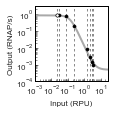

In [65]:
## plot transfer functions with error bars
## for presentations with modifications to spacing and size of labels

rows = 1 
cols = 1

fig2_RPU_PhlF_conv, ax2_RPU_PhlF_conv = plt.subplots(rows,cols, figsize=(1.69*cols,1.65*rows), sharey = 'row') # row, column format
# fig, ax = plt.subplots(4,2, figsize=(15,30), sharey = 'row') # row, column format
plt.tight_layout(h_pad = 0) #tidies up spacing between plots

tfs_means_RPU = dict()

for s in ['AJT312']:

    FP = ax2_RPU_PhlF_conv

    for spine in FP.spines.values():
                spine.set_edgecolor('black')
                spine.set_linewidth(1)

    ## transfer functions
    tfs_means_RPU[s] = build_transfer_functions([AJT269_means_RPU_store], # x data
                                        [means_RNAP[s].tolist()], # y data
                                        [s]) # name

    ## scatter
    FP.scatter(tfs_means_RPU[s][0].inputs[0], tfs_means_RNAP[s][0].outputs[0],
                                            s = 10, zorder=4,
                                             marker = 'o',
                                             c = 'white',
                                             edgecolors = 'black', linewidths = 0.5)#,
    
    FP.scatter(tfs_means_RPU[s][0].inputs, tfs_means_RNAP[s][0].outputs,
                    s = 10, zorder=3,
                     marker = 'o',
                     c = 'black',
                     edgecolors = 'black', linewidths = 0.5)#,)


#     ## errorbars
#     FP.errorbar([tfs_means_RNAP[s][0].inputs[0]] + [tfs_means_RNAP[s][0].inputs[1000]], 
#                 [tfs_means_RNAP[s][0].outputs[0]] + [tfs_means_RNAP[s][0].outputs[-1]], yerr = [stdevs_RNAP[s][0]] + [stdevs_RNAP[s][1000]],
#                                                 zorder=2, fmt = 'none', # plots just error bars, no marker or line
#                                                 c = 'k', elinewidth = 0.5, capsize = 1, capthick = 0.5)#,
# #                                                                     label = legend_names[strain_info[s]['parent']])

    ## fitting line
    xvals = np.logspace(np.log10(0.001),np.log10(30), 1000) # x values for creating smooth line

    FP.plot(xvals, tfs_means_RPU[s][0].hill_eqn(xvals),
                                      color = 'darkgrey',
                                      zorder = 1, linewidth = 2)#, label = legend_names[strain_info[s]['parent']])

#             ## plotting empty data as legend entry creation so that I can do marker and line despite them being different data that is plotted
#             FP.plot([],[], marker = plot_info[r][i]['marker'],
#                                                                   mec = plot_info[r][i]['edgecolor'],
#                                                                   mew = 2,
#                                                                   mfc = plot_info[r][i]['facecolor'],
#                                                                   ms = 10,
#                                                                   color = plot_info[r][i]['linecolor'],
#                                                                   linewidth = 10, label = s)

    FP.set_yscale('log')
    FP.set_xscale('log')

    FP.set_ylabel('Output (RNAP/s)', size = 8, labelpad = 2)

    FP.set_xlabel('Input (RPU)', size = 8, labelpad = 2)  


#                 FP.set_title('{}'.format(strain_info[s]['promoter']), 
#                                                        size = 24, pad = 10)

    ## set x ticks
    x_major = matplotlib.ticker.LogLocator(base = 10.0, numticks = 5)
    FP.xaxis.set_major_locator(x_major)
    x_minor = matplotlib.ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
    FP.xaxis.set_minor_locator(x_minor)
    FP.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
    
    ## set y ticks
    FP.yaxis.set_major_locator(x_major)
    FP.yaxis.set_minor_locator(x_minor)
    FP.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
            
    FP.tick_params(labelsize = 8, length = 3, width = 0.5, direction = 'in', pad = 2)
    FP.tick_params(which='minor', length = 2, width = 0.5, direction = 'in')
    
    ymin = 0.0001
    ymax = 3
    
    FP.set_ylim(ymin, ymax)
    FP.set_xlim(0.001, 30)

    FP.yaxis.grid(False)
    FP.xaxis.grid(False)
    
    FP.vlines(tfs_means_RPU[s][0].inputs, ymin, ymax, linestyle = (0, (5, 5)), linewidth = 0.5)

#     FP.text(.00175, .00125, strain_info_rep[s]['repressor'], 
#                   verticalalignment = 'bottom', horizontalalignment = 'left', 
#                   fontsize = 70)



In [66]:
# fig2_RPU_PhlF_conv.savefig('EcN_NOTgates_RPUxRNAP_ErrorBars_PhlFonly_conv_YminRestrict_ymin3fold.pdf', bbox_inches = "tight", transparent = True)


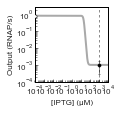

In [67]:
## plot transfer functions with error bars
## for presentations with modifications to spacing and size of labels

rows = 1 
cols = 1

fig2_IPTGxRNAP_PhlF, ax2_IPTGxRNAP_PhlF = plt.subplots(rows,cols, figsize=(1.69*cols,1.65*rows), sharey = 'row') # row, column format
# fig, ax = plt.subplots(4,2, figsize=(15,30), sharey = 'row') # row, column format
plt.tight_layout(h_pad = 0) #tidies up spacing between plots

tfs_means_RNAP = dict()

for s in ['AJT312']:

    FP = ax2_IPTGxRNAP_PhlF

    for spine in FP.spines.values():
                spine.set_edgecolor('black')
                spine.set_linewidth(1)

    ## transfer functions
    tfs_means_RNAP[s] = build_transfer_functions([[0.0001] + inducer_info['plot_conc'][1:]], # x data
                                        [means_RNAP[s].tolist()], # y data
                                        [s]) # name

    ## scatter
    FP.scatter(tfs_means_RNAP[s][0].inputs[0], tfs_means_RNAP[s][0].outputs[0],
                                            s = 10, zorder=3,
                                             marker = 'o',
                                             c = 'white',
                                             edgecolors = 'black', linewidths = 0.5)#,
    
    FP.scatter(tfs_means_RNAP[s][0].inputs[-1], tfs_means_RNAP[s][0].outputs[-1],
                    s = 10, zorder=3,
                     marker = 'o',
                     c = 'black',
                     edgecolors = 'black', linewidths = 0.5)#,)


    ## errorbars
    FP.errorbar([tfs_means_RNAP[s][0].inputs[0]] + [tfs_means_RNAP[s][0].inputs[-1]], 
                [tfs_means_RNAP[s][0].outputs[0]] + [tfs_means_RNAP[s][0].outputs[-1]], yerr = [stdevs_RNAP[s][0]] + [stdevs_RNAP[s][1000]],
                                                zorder=2, fmt = 'none', # plots just error bars, no marker or line
                                                c = 'k', elinewidth = 0.5, capsize = 1, capthick = 0.5)#,
#                                                                     label = legend_names[strain_info[s]['parent']])

    ## fitting line
    xvals = np.logspace(np.log10(0.0001),np.log10(10000), 1000) # x values for creating smooth line

    FP.plot(xvals, tfs_means_RNAP[s][0].hill_eqn(xvals),
                                      color = 'darkgrey',
                                      zorder = 1, linewidth = 2)#, label = legend_names[strain_info[s]['parent']])

#             ## plotting empty data as legend entry creation so that I can do marker and line despite them being different data that is plotted
#             FP.plot([],[], marker = plot_info[r][i]['marker'],
#                                                                   mec = plot_info[r][i]['edgecolor'],
#                                                                   mew = 2,
#                                                                   mfc = plot_info[r][i]['facecolor'],
#                                                                   ms = 10,
#                                                                   color = plot_info[r][i]['linecolor'],
#                                                                   linewidth = 10, label = s)

    FP.set_yscale('log')
    FP.set_xscale('log')

    FP.set_ylabel('Output (RNAP/s)', size = 8, labelpad = 2)

    FP.set_xlabel('[IPTG] (\u03BCM)', size = 8, labelpad = 2)


#                 FP.set_title('{}'.format(strain_info[s]['promoter']), 
#                                                        size = 24, pad = 10)

    ## set x ticks
    x_major = matplotlib.ticker.LogLocator(base = 10.0, numticks = 9)
    FP.xaxis.set_major_locator(x_major)
    x_minor = matplotlib.ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
    FP.xaxis.set_minor_locator(x_minor)
    FP.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
    
    ## set y ticks
    y_major = matplotlib.ticker.LogLocator(base = 10.0, numticks = 5)
    FP.yaxis.set_major_locator(y_major)
    y_minor = matplotlib.ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
    FP.yaxis.set_minor_locator(y_minor)
    FP.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
            
    FP.tick_params(labelsize = 8, length = 3, width = 0.5, direction = 'in', pad = 2)
    FP.tick_params(which='minor', length = 2, width = 0.5, direction = 'in')
    
    ymin = 0.0001
    ymax = 3
    
    FP.set_ylim(ymin, ymax)
    FP.set_xlim(0.0001, 10000)

    FP.yaxis.grid(False)
    FP.xaxis.grid(False)
    
    FP.vlines(tfs_means_RNAP[s][0].inputs[0], ymin, ymax, linestyle = (0, (5, 5)), linewidth = 0.5)
    FP.vlines(tfs_means_RNAP[s][0].inputs[-1], ymin, ymax, linestyle = (0, (5, 5)), linewidth = 0.5)

#     FP.text(.00175, .00125, strain_info_rep[s]['repressor'], 
#                   verticalalignment = 'bottom', horizontalalignment = 'left', 
#                   fontsize = 70)



In [68]:
# fig2_IPTGxRNAP_PhlF.savefig('EcN_NOTgates_IPTGxRNAP_ErrorBars_PhlFonly.pdf', bbox_inches = "tight", transparent = True)


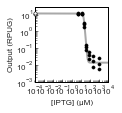

In [89]:
## plot transfer functions with error bars
## for presentations with modifications to spacing and size of labels

rows = 1 
cols = 1

fig2_IPTGxRPU_PhlF, ax2_IPTGxRPU_PhlF = plt.subplots(rows,cols, figsize=(1.69*cols,1.65*rows), sharey = 'row') # row, column format
# fig, ax = plt.subplots(4,2, figsize=(15,30), sharey = 'row') # row, column format
plt.tight_layout(h_pad = 0) #tidies up spacing between plots

tfs_means_RPU_PhlF = dict()

for s in ['AJT312']:

    FP = ax2_IPTGxRPU_PhlF

    for spine in FP.spines.values():
                spine.set_edgecolor('black')
                spine.set_linewidth(1)

    ## transfer functions
    tfs_means_RPU_PhlF[s] = build_transfer_functions([[0.0001] + inducer_info['plot_conc'][1:]], # x data
                                        [means_RPU[s].tolist()], # y data
                                        [s], # name
                                        'repressor') # kind

    for r in reps:
        ## scatter
        FP.scatter(tfs_means_RPU_PhlF[s][0].inputs[0], r123_RPU[s][r][0],
                                                s = 10, zorder=3,
                                                 marker = 'o',
                                                 c = 'white',
                                                 edgecolors = 'black', linewidths = 0.5, clip_on=False)#,

        FP.scatter(tfs_means_RPU_PhlF[s][0].inputs[1:], r123_RPU[s][r][1:],
                        s = 10, zorder=3,
                         marker = 'o',
                         c = 'black',
                         edgecolors = 'black', linewidths = 0.5, clip_on=False)#,)

#     ## scatter
#     FP.scatter(tfs_means_RPU_PhlF[s][0].inputs[0], tfs_means_RPU_PhlF[s][0].outputs[0],
#                                             s = 10, zorder=3,
#                                              marker = 'o',
#                                              c = 'white',
#                                              edgecolors = 'black', linewidths = 0.5, clip_on=False)#,
    
#     FP.scatter(tfs_means_RPU_PhlF[s][0].inputs[1:], tfs_means_RPU_PhlF[s][0].outputs[1:],
#                     s = 10, zorder=3,
#                      marker = 'o',
#                      c = 'black',
#                      edgecolors = 'black', linewidths = 0.5, clip_on=False)#,)


#     ## errorbars
#     FP.errorbar([tfs_means_RPU_PhlF[s][0].inputs[0]] + [tfs_means_RPU_PhlF[s][0].inputs[-1]], 
#                 [tfs_means_RPU_PhlF[s][0].outputs[0]] + [tfs_means_RPU_PhlF[s][0].outputs[-1]], yerr = [stdevs_RPU[s][0]] + [stdevs_RPU[s][1000]],
#                                                 zorder=2, fmt = 'none', # plots just error bars, no marker or line
#                                                 c = 'k', elinewidth = 0.5, capsize = 1, capthick = 0.5, clip_on=False)#,
#                                                                     label = legend_names[strain_info[s]['parent']])

    ## fitting line
    xvals = np.logspace(np.log10(0.0001),np.log10(10000), 1000) # x values for creating smooth line

    FP.plot(xvals, tfs_means_RPU_PhlF[s][0].hill_eqn_rep(xvals),
                                      color = 'darkgrey',
                                      zorder = 1, linewidth = 2)#, label = legend_names[strain_info[s]['parent']])

#             ## plotting empty data as legend entry creation so that I can do marker and line despite them being different data that is plotted
#             FP.plot([],[], marker = plot_info[r][i]['marker'],
#                                                                   mec = plot_info[r][i]['edgecolor'],
#                                                                   mew = 2,
#                                                                   mfc = plot_info[r][i]['facecolor'],
#                                                                   ms = 10,
#                                                                   color = plot_info[r][i]['linecolor'],
#                                                                   linewidth = 10, label = s)

    FP.set_yscale('log')
    FP.set_xscale('log')

    FP.set_ylabel('Output (RPUG)', size = 8, labelpad = 2)

    FP.set_xlabel('[IPTG] (\u03BCM)', size = 8, labelpad = 2)


#                 FP.set_title('{}'.format(strain_info[s]['promoter']), 
#                                                        size = 24, pad = 10)

    ## set x ticks
    x_major = matplotlib.ticker.LogLocator(base = 10.0, numticks = 9)
    FP.xaxis.set_major_locator(x_major)
    x_minor = matplotlib.ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
    FP.xaxis.set_minor_locator(x_minor)
    FP.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
    
    ## set y ticks
    y_major = matplotlib.ticker.LogLocator(base = 10.0, numticks = 5)
    FP.yaxis.set_major_locator(y_major)
    y_minor = matplotlib.ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
    FP.yaxis.set_minor_locator(y_minor)
    FP.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
            
    FP.tick_params(labelsize = 8, length = 3, width = 0.5, direction = 'in', pad = 2)
    FP.tick_params(which='minor', length = 2, width = 0.5, direction = 'in')
    
    ymin = 0.001
    ymax = 30
    
    FP.set_ylim(ymin, ymax)
    FP.set_xlim(0.0001, 10000)

    FP.yaxis.grid(False)
    FP.xaxis.grid(False)
    
#     FP.vlines(tfs_means_RPU_PhlF[s][0].inputs[0], ymin, ymax, linestyle = (0, (5, 5)), linewidth = 0.5)
#     FP.vlines(tfs_means_RPU_PhlF[s][0].inputs[-1], ymin, ymax, linestyle = (0, (5, 5)), linewidth = 0.5)

#     FP.text(.00175, .00125, strain_info_rep[s]['repressor'], 
#                   verticalalignment = 'bottom', horizontalalignment = 'left', 
#                   fontsize = 70)



In [90]:
# fig2_IPTGxRPU_PhlF.savefig('FigS7_EcN_NOTgates_IPTGxRPU_AllPoints_PhlFonly.pdf', bbox_inches = "tight", transparent = True)


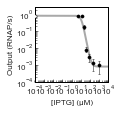

In [75]:
def hill_eqn_rep(x, ymax, ymin, k, n):
    return ymin + ((ymax-ymin) * k**n)/(x**n + k**n)

def fphlf(x):
#     ymin = 0.0003
    ymin = 0.0008 #Chris asked for it to be 2-3 fold higher
    ymax = 0.86
    k = 12
    n =  2.86
    return hill_eqn_rep(x, ymax, ymin, k, n)


## plot transfer functions with error bars
## for presentations with modifications to spacing and size of labels

rows = 1 
cols = 1

fig2_IPTGxRNAP_PhlF_conv, ax2_IPTGxRNAP_PhlF_conv = plt.subplots(rows,cols, figsize=(1.69*cols,1.65*rows), sharey = 'row') # row, column format
# fig, ax = plt.subplots(4,2, figsize=(15,30), sharey = 'row') # row, column format
plt.tight_layout(h_pad = 0) #tidies up spacing between plots

tfs_means_RNAP = dict()

for s in ['AJT312']:

    FP = ax2_IPTGxRNAP_PhlF_conv

    for spine in FP.spines.values():
                spine.set_edgecolor('black')
                spine.set_linewidth(1)

    ## transfer functions
    tfs_means_RNAP[s] = build_transfer_functions([[0.0001] + inducer_info['plot_conc'][1:]], # x data
                                        [means_RNAP[s].tolist()], # y data
                                        [s]) # name

    ## scatter
    FP.scatter(tfs_means_RNAP[s][0].inputs[0], tfs_means_RNAP[s][0].outputs[0],
                                            s = 10, zorder=3,
                                             marker = 'o',
                                             c = 'white',
                                             edgecolors = 'black', linewidths = 0.5)#,
    
    FP.scatter(tfs_means_RNAP[s][0].inputs[1:], tfs_means_RNAP[s][0].outputs[1:],
                    s = 10, zorder=3,
                     marker = 'o',
                     c = 'black',
                     edgecolors = 'black', linewidths = 0.5)#,)


    ## errorbars
    FP.errorbar(tfs_means_RNAP[s][0].inputs, tfs_means_RNAP[s][0].outputs, 
                yerr = stdevs_RNAP[s],
                zorder=2, fmt = 'none', # plots just error bars, no marker or line
                c = 'k', elinewidth = 0.5, capsize = 1, capthick = 0.5)#,
# #                                                                     label = legend_names[strain_info[s]['parent']])

    ## fitting line
    xvals = np.logspace(np.log10(0.0001),np.log10(10000), 1000) # x values for creating smooth line

#     FP.plot(xvals, tfs_means_RNAP[s][0].hill_eqn(xvals),
#                                       color = 'darkgrey',
#                                       zorder = 1, linewidth = 2)#, label = legend_names[strain_info[s]['parent']])

    FP.plot(xvals, fphlf(xvals),
                  color = 'darkgrey',
                  zorder = 1, linewidth = 2)

#             ## plotting empty data as legend entry creation so that I can do marker and line despite them being different data that is plotted
#             FP.plot([],[], marker = plot_info[r][i]['marker'],
#                                                                   mec = plot_info[r][i]['edgecolor'],
#                                                                   mew = 2,
#                                                                   mfc = plot_info[r][i]['facecolor'],
#                                                                   ms = 10,
#                                                                   color = plot_info[r][i]['linecolor'],
#                                                                   linewidth = 10, label = s)

    FP.set_yscale('log')
    FP.set_xscale('log')

    FP.set_ylabel('Output (RNAP/s)', size = 8, labelpad = 2)

    FP.set_xlabel('[IPTG] (\u03BCM)', size = 8, labelpad = 2)


#                 FP.set_title('{}'.format(strain_info[s]['promoter']), 
#                                                        size = 24, pad = 10)

    ## set x ticks
    x_major = matplotlib.ticker.LogLocator(base = 10.0, numticks = 9)
    FP.xaxis.set_major_locator(x_major)
    x_minor = matplotlib.ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
    FP.xaxis.set_minor_locator(x_minor)
    FP.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
    
    ## set y ticks
    y_major = matplotlib.ticker.LogLocator(base = 10.0, numticks = 5)
    FP.yaxis.set_major_locator(y_major)
    y_minor = matplotlib.ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
    FP.yaxis.set_minor_locator(y_minor)
    FP.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
            
    FP.tick_params(labelsize = 8, length = 3, width = 0.5, direction = 'in', pad = 2)
    FP.tick_params(which='minor', length = 2, width = 0.5, direction = 'in')
    
    ymin = 0.0001
    ymax = 3
    
    FP.set_ylim(ymin, ymax)
    FP.set_xlim(0.0001, 10000)

    FP.yaxis.grid(False)
    FP.xaxis.grid(False)
    
#     FP.vlines(tfs_means_RNAP[s][0].inputs, ymin, ymax, linestyle = (0, (5, 5)), linewidth = 0.5)

#     FP.text(.00175, .00125, strain_info_rep[s]['repressor'], 
#                   verticalalignment = 'bottom', horizontalalignment = 'left', 
#                   fontsize = 70)



In [76]:
# fig2_IPTGxRNAP_PhlF_conv.savefig('EcN_NOTgates_IPTGxRNAP_ErrorBars_PhlFonly_conv.pdf', bbox_inches = "tight", transparent = True)


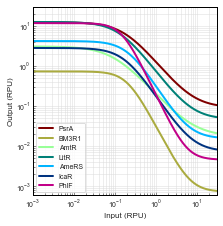

In [73]:
## plot transfer functions all in one plot

rows = 1 
cols = 1

fig3_RPU, ax3_RPU = plt.subplots(rows,cols, figsize=(cols*3.2,rows*3.2), sharey = 'row') # row, column format
# fig, ax = plt.subplots(4,2, figsize=(15,30), sharey = 'row') # row, column format
plt.tight_layout(pad = 1, h_pad = 1, w_pad = 1) #tidies up spacing between plots

tfs_means_RPU = dict()

for s in strains:
    if s not in ['AJT304','AJT311']:
        FP = ax3_RPU

        for spine in FP.spines.values():
                    spine.set_edgecolor('black')
                    spine.set_linewidth(1)


        ## transfer functions
        tfs_means_RPU[s] = build_transfer_functions([AJT269_means_RPU_store], # x data
                                            [means_RPU[s].tolist()], # y data
                                            [s], # name
                                            'repressor') # kind

#             ## scatter
#             FP.scatter(tfs_means_RPU[i][s][0].inputs, tfs_means_RPU[i][s][0].outputs,
#                                                     s = 100, zorder=3,
#                                                      marker = 'o',
#                                                      c = 'k',
#                                                      edgecolors = 'k', linewidths = 2)#,


#             ## errorbars
#             FP.errorbar(tfs_means_RPU[i][s][0].inputs, tfs_means_RPU[i][s][0].outputs, yerr = stdevs_RPU[s],
#                                                         zorder=2, fmt = 'none', # plots just error bars, no marker or line
#                                                         c = 'k', elinewidth = 2, capsize = 4)#,
# #                                                                     label = legend_names[strain_info[s]['parent']])

        ## fitting line
        xvals = np.logspace(np.log10(0.001),np.log10(30), 1000)

        FP.plot(xvals, tfs_means_RPU[s][0].hill_eqn_rep(xvals),
                                          color = strain_info_rep[s]['color'],
                                          zorder = 1, linewidth = 2, label = strain_info_rep[s]['repressor'])

#             ## plotting empty data as legend entry creation so that I can do marker and line despite them being different data that is plotted
#             FP.plot([],[], marker = plot_info[r][i]['marker'],
#                                                                   mec = plot_info[r][i]['edgecolor'],
#                                                                   mew = 2,
#                                                                   mfc = plot_info[r][i]['facecolor'],
#                                                                   ms = 10,
#                                                                   color = plot_info[r][i]['linecolor'],
#                                                                   linewidth = 10, label = s)

    FP.set_yscale('log')
    FP.set_xscale('log')

    FP.set_xlabel('Input (RPU)', size = 8, labelpad = 2)
    FP.set_ylabel('Output (RPU)', size = 8, labelpad = 2)

#                 FP.set_title('{}'.format(strain_info[s]['promoter']), 
#                                                        size = 24, pad = 10)
    FP.tick_params(labelsize = 7, length = 3, width = 0.5, direction = 'in', pad = 2)
    FP.tick_params(which='minor', length = 2, width = 0.5, direction = 'in')
    FP.set_xlim(0.001, 30)
    FP.set_ylim(0.0006, 30)

    FP.yaxis.grid(False)
    FP.xaxis.grid(False)
            
    FP.yaxis.grid(True, which='both', linewidth = 0.5, color = 'gainsboro')
    FP.xaxis.grid(True, which='both', linewidth = 0.5, color = 'gainsboro')
    FP.legend(markerscale = 1, fontsize = 7)
#             FP.legend.legendHandles._legmarker.set_markersize(50)

#             FP.text(max(tfs_means_RPU[i][s][0].inputs)/1.25, .00125, strain_info_withdmso[s]['promoter'], 
#                                                                   verticalalignment = 'bottom', horizontalalignment = 'right', 
#                                                                   fontsize = 70)




In [74]:
# fig3_RPU.savefig('Fig2_EcN_NOTgates_RPUxRPU_AllInOne.pdf', bbox_inches = "tight", transparent = True)


/usr/local/lib/python3.6/site-packages/transferfunction.py:69: RuntimeWarning: invalid value encountered in double_scalars


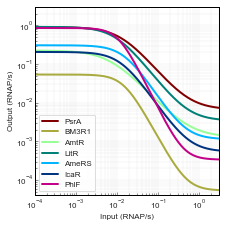

In [54]:
## plot transfer functions all in one plot

rows = 1 
cols = 1

fig3_RNAP, ax3_RNAP = plt.subplots(rows,cols, figsize=(cols*3.2,rows*3.2), sharey = 'row') # row, column format
# fig, ax = plt.subplots(4,2, figsize=(15,30), sharey = 'row') # row, column format
plt.tight_layout(pad = 1, h_pad = 1, w_pad = 1) #tidies up spacing between plots

tfs_means_RNAP = dict()

for s in strains:
    if s not in ['AJT304','AJT311']:

        FP = ax3_RNAP

        for spine in FP.spines.values():
                    spine.set_edgecolor('black')
                    spine.set_linewidth(1)

        ## transfer functions
        tfs_means_RNAP[s] = build_transfer_functions([AJT269_means_RNAP_store], # x data
                                            [means_RNAP[s].tolist()], # y data
                                            [s]) # name

    #             ## scatter
    #             FP.scatter(tfs_means_RPU[i][s][0].inputs, tfs_means_RPU[i][s][0].outputs,
    #                                                     s = 100, zorder=3,
    #                                                      marker = 'o',
    #                                                      c = 'k',
    #                                                      edgecolors = 'k', linewidths = 2)#,


    #             ## errorbars
    #             FP.errorbar(tfs_means_RPU[i][s][0].inputs, tfs_means_RPU[i][s][0].outputs, yerr = stdevs_RPU[s],
    #                                                         zorder=2, fmt = 'none', # plots just error bars, no marker or line
    #                                                         c = 'k', elinewidth = 2, capsize = 4)#,
    # #                                                                     label = legend_names[strain_info[s]['parent']])

        ## fitting line
        xvals = np.logspace(np.log10(0.0001),np.log10(3), 1000)

        FP.plot(xvals, tfs_means_RNAP[s][0].hill_eqn(xvals),
                                          color = strain_info_rep[s]['color'],
                                          zorder = 1, linewidth = 2, label = strain_info_rep[s]['repressor'])

    #             ## plotting empty data as legend entry creation so that I can do marker and line despite them being different data that is plotted
    #             FP.plot([],[], marker = plot_info[r][i]['marker'],
    #                                                                   mec = plot_info[r][i]['edgecolor'],
    #                                                                   mew = 2,
    #                                                                   mfc = plot_info[r][i]['facecolor'],
    #                                                                   ms = 10,
    #                                                                   color = plot_info[r][i]['linecolor'],
    #                                                                   linewidth = 10, label = s)

        FP.set_yscale('log')
        FP.set_xscale('log')

        FP.set_xlabel('Input (RNAP/s)', size = 8, labelpad = 2)
        FP.set_ylabel('Output (RNAP/s)', size = 8, labelpad = 2)

    #                 FP.set_title('{}'.format(strain_info[s]['promoter']), 
    #                                                        size = 24, pad = 10)
        FP.set_ylim(.00004,3)
        FP.set_xlim(.0001,3)

        FP.yaxis.grid(False)
        FP.xaxis.grid(False)

        FP.yaxis.grid(True, which='both', linewidth = 0.25, color = 'gainsboro')
        FP.xaxis.grid(True, which='both', linewidth = 0.25, color = 'gainsboro')
        
        FP.tick_params(labelsize = 8, length = 3, width = 0.5, direction = 'in', pad = 2)
        FP.tick_params(which='minor', length = 2, width = 0.5, direction = 'in')
        
        FP.legend(markerscale = 1, fontsize = 8)
#             FP.legend.legendHandles._legmarker.set_markersize(50)

#             FP.text(max(tfs_means_RPU[i][s][0].inputs)/1.25, .00125, strain_info_withdmso[s]['promoter'], 
#                                                                   verticalalignment = 'bottom', horizontalalignment = 'right', 
#                                                                   fontsize = 70)




In [55]:
# fig3_RNAP.savefig('EcN_NOTgates_RNAPxRNAP_AllInOne_NoBetIorHlyIIR.pdf', bbox_inches = "tight", transparent = True)


In [34]:
import matplotlib.gridspec as gridspec
from matplotlib.colors import LogNorm # for making colorbar scale logarithmic
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

PhlF


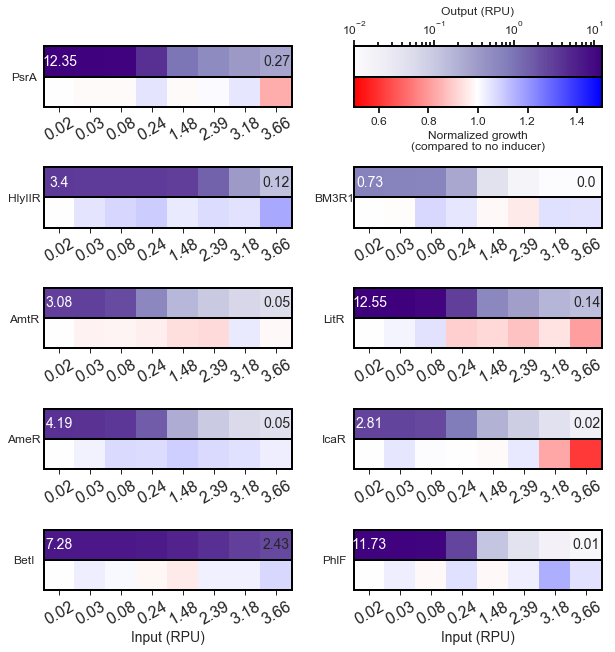

In [190]:
fig3_heat = plt.figure(figsize = (10,10))
main_grid = gridspec.GridSpec(5,2, hspace=1, wspace=0.25)

# grid of grids, kinda confusing, but it works
# remove height space between plots so that they touch each other
grid1 = main_grid[0].subgridspec(2,1, hspace=0)
grid2 = main_grid[1].subgridspec(2,1, hspace=0)
grid3 = main_grid[2].subgridspec(2,1, hspace=0)
grid4 = main_grid[3].subgridspec(2,1, hspace=0)
grid5 = main_grid[4].subgridspec(2,1, hspace=0)
grid6 = main_grid[5].subgridspec(2,1, hspace=0)
grid7 = main_grid[6].subgridspec(2,1, hspace=0)
grid8 = main_grid[7].subgridspec(2,1, hspace=0)
grid9 = main_grid[8].subgridspec(2,1, hspace=0)
grid10 = main_grid[9].subgridspec(2,1, hspace=0)

# so that grids can be iterated through
grids = [grid1,grid3,grid4,grid5,grid6,grid7,grid8,grid9,grid10] # skipped grid2 to leave open for legend

axes = [[[] for i in range(2)] for j in range(len(grids))]

for s in strains:

    for a in range(2):
        # add subplot to figure and assign to axes list of lists
        axes[strains.index(s)][a] = fig3_heat.add_subplot(grids[strains.index(s)][a])

    FP = axes[strains.index(s)]
    for a in range(2):
        for spine in FP[a].spines.values():
            spine.set_edgecolor('black')
            spine.set_linewidth(2)

    ## heatmap of fluorescence data
    # had to concatenate two of the same dataset together in order to plot as a heatmap
    # this is fine because the data are the same so they blend together and can just be re-sized to look like one
    hot_data = pd.DataFrame.transpose(pd.concat((pd.Series(means_RPU[s],name=s), means_RPU[s]), axis = 1)) # made it a series so it could have the name attached to it
    heatmap_fluor = FP[0].pcolor(hot_data, cmap="Purples",norm=LogNorm(vmin=.01, vmax=12.5))

    
    ## heatmap of toxicity data 
    # diverging heatmap so it's clear when growth was impacted from normal
    hot_data_tox = pd.DataFrame.transpose(pd.concat((pd.Series(tox_rel_means['M9'][i]['EcN'][s],name=s), tox_rel_means['M9'][i]['EcN'][s]), axis = 1))
    heatmap_tox = FP[1].pcolor(hot_data_tox, cmap="bwr_r",vmin=.5, vmax=1.5)

    FP[0].set_ylabel(strain_info_rep[s]['repressor'], size = 12, 
                     rotation=0, position =(0,-0.2), labelpad = 20)

    #remove xticks of top heatmap
    FP[0].set_xticks([])
    # remove yticks from heatmaps
    FP[0].set_yticks([])
    FP[1].set_yticks([])

    # change xticks so I can label in middle of each position
    FP[1].set_xticks(np.arange(0.5,8.5,1))
    FP[1].set_xticklabels([round(e,2) for e in AJT269_means_RPU_store], rotation=30, size = 16)
    
    # only label x-axis for heatmaps in bottom row
    if strains.index(s) in [7,8]:
        FP[1].set_xlabel('Input (RPU)', size = 14)

    FP[0].text(0.5,1,round(means_RPU[s][0],2), fontsize = 14, ha='center', va='center', color = 'white')
    FP[0].text(7.5,1,round(means_RPU[s][1000],2), fontsize = 14, ha='center', va='center')
            
# make an inset axis for plotting the legend on
axins = inset_axes(axes[0][0],
                   width="100%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='upper left',
                   bbox_to_anchor=(1.25, 0., 1, 1),
                   bbox_transform=axes[0][0].transAxes,
                   borderpad=0,
                   )

# mess with colorbar labeling for heatmap_fluor
cbar = fig3_heat.colorbar(heatmap_fluor,cax=axins, orientation='horizontal') # adds colorbar to this figure
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')
cbar.set_label('Output (RPU)', rotation=0,fontsize = 12)
cbar.ax.tick_params(labelsize = 12, length = 6, width = 2) # change colorbar labelsize and ticks
cbar.ax.tick_params(which='minor',length = 4, width = 2) # change colorbar labelsize and ticks
cbar.outline.set_edgecolor('black')
cbar.outline.set_linewidth(2)

# make an inset axis for plotting the legend on
axins = inset_axes(axes[0][1],
                   width="100%",  # width = 12% of parent_bbox width
                   height="100%",  # height : 600%
                   loc='upper left',
                   bbox_to_anchor=(1.25, 0., 1, 1),
                   bbox_transform=axes[0][1].transAxes,
                   borderpad=0,
                   )

# mess with colorbar labeling for heatmap_tox
cbar = fig3_heat.colorbar(heatmap_tox,cax=axins, orientation='horizontal') # adds colorbar to this figure
cbar.set_label('Normalized growth\n(compared to no inducer)', rotation=0,fontsize = 12)
cbar.ax.tick_params(labelsize = 12, length = 6, width = 2) # change colorbar labelsize and ticks
cbar.ax.tick_params(which='minor',length = 4, width = 2) # change colorbar labelsize and ticks
cbar.outline.set_edgecolor('black')
cbar.outline.set_linewidth(2)


In [82]:
# fig3_heat.savefig('EcN_NOTgates_RPU+Tox_HeatMaps_5x2.pdf', bbox_inches = "tight", transparent = True)


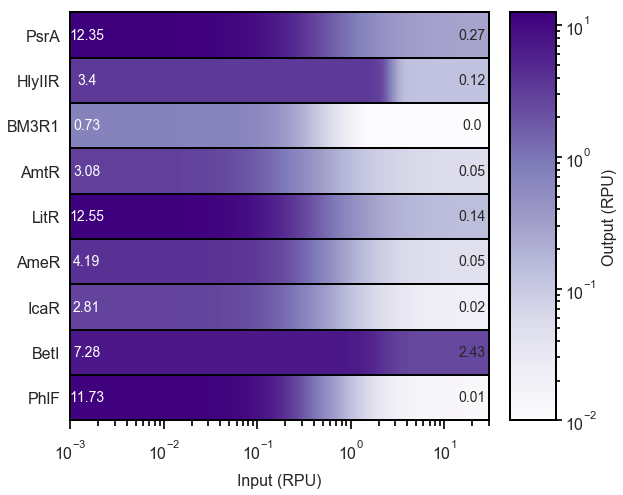

In [206]:
fig3_heat_v2, ax3_heat_v2 = plt.subplots(1,1, figsize=(cols*7.5,rows*7.5))

FP = ax3_heat_v2

# color borders of plot
for spine in FP.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(2)

# logarithmically distributed x values for calculating y-values
# doing this so that heatmap gradient can become smooth
xvals = np.logspace(np.log10(0.001),np.log10(30), 1000)

# calculate y-values based on fitted parameters at range of x-values aboves
tfs_means_RPU_dict = dict()
for s in strains:
    tfs_means_RPU_dict[s] = pd.Series(tfs_means_RPU[s][0].hill_eqn(xvals), name = s, index = xvals)
    
tfs_means_RPU_df = pd.DataFrame.transpose(pd.DataFrame.from_dict(tfs_means_RPU_dict))


# heatmap
y = np.arange(len(tfs_means_RPU_df)+1) # not sure why/if it needs to be + 1

# first two args change coordinates that heatmap bins are placed at
# then plot data at those points
heatmap_fluor_v2 = ax3_heat_v2.pcolor(xvals,y,tfs_means_RPU_df,cmap="Purples",norm=LogNorm(vmin=.01, vmax=12.5))
ax3_heat_v2.set_xlim(0.001, 30)
ax3_heat_v2.set_xscale('log')
ax3_heat_v2.invert_yaxis() # so that they data are in same order as previously

ylabels = ['PsrA','HlyIIR','BM3R1','AmtR','LitR',
           'AmeR','IcaR','BetI','PhlF']
FP.set_yticks(np.arange(0.5,9.5,1))
FP.set_yticklabels(ylabels, size = 16)

FP.set_xlabel('Input (RPU)', size = 16, labelpad = 10)

FP.tick_params(labelsize = 16, length = 9, width = 2, direction = 'out', pad = 10)
FP.tick_params(which='minor', length = 6, width = 2, direction = 'out')
FP.tick_params(axis = 'y', which='both', length=0, width=0)

# draw lines between linear heatmaps
for p in [1,2,3,4,5,6,7,8]:
    FP.axhline(p, ls = '-', lw = 2, c = 'black')

# write output RPU values on plot
for s in strains:
    # uninduced
    FP.text(0.0015,strains.index(s)+0.5,
            round(means_RPU[s][0],2), fontsize = 14, 
            ha='center', va='center', color = 'white')
    # induced
    FP.text(20,strains.index(s)+0.5,
            round(means_RPU[s][1000],2), fontsize = 14, 
            ha='center', va='center')
            
# make an inset axis for plotting the legend on
axins_v2 = inset_axes(FP,
                   width="11%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='upper left',
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=FP.transAxes,
                   borderpad=0,
                   )

# mess with colorbar labeling for heatmap_fluor
cbar = fig3_heat_v2.colorbar(heatmap_fluor_v2,cax=axins_v2, orientation='vertical') # adds colorbar to this figure
# cbar.ax.xaxis.set_ticks_position('top')
# cbar.ax.xaxis.set_label_position('top')
cbar.set_label('Output (RPU)',fontsize = 16)
cbar.ax.tick_params(labelsize = 16, length = 6, width = 2) # change colorbar labelsize and ticks
cbar.ax.tick_params(which='minor',length = 4, width = 2) # change colorbar labelsize and ticks
cbar.outline.set_edgecolor('black')
cbar.outline.set_linewidth(2)

In [207]:
# fig3_heat_v2.savefig('EcN_NOTgates_RPUonly_HeatMaps_NoOD.pdf', bbox_inches = "tight", transparent = True)


In [34]:
import matplotlib.gridspec as gridspec
from matplotlib.colors import LogNorm # for making colorbar scale logarithmic
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

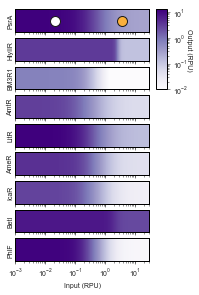

In [45]:
fig3_heat_v3 = plt.figure(figsize = (2.4,4.63))
main_grid = gridspec.GridSpec(9,1, hspace=0.25)

# grid of grids, kinda confusing, but it works
# remove height space between plots so that they touch each other
grid1 = fig3_heat_v3.add_subplot(main_grid[0])
grid2 = fig3_heat_v3.add_subplot(main_grid[1])
grid3 = fig3_heat_v3.add_subplot(main_grid[2])
grid4 = fig3_heat_v3.add_subplot(main_grid[3])
grid5 = fig3_heat_v3.add_subplot(main_grid[4])
grid6 = fig3_heat_v3.add_subplot(main_grid[5])
grid7 = fig3_heat_v3.add_subplot(main_grid[6])
grid8 = fig3_heat_v3.add_subplot(main_grid[7])
grid9 = fig3_heat_v3.add_subplot(main_grid[8])

# so that grids can be iterated through
grids = [grid1,grid2,grid3,grid4,grid5,grid6,grid7,grid8,grid9]

axes = [[] for j in range(len(grids))]

# logarithmically distributed x values for calculating y-values
# doing this so that heatmap gradient can become smooth
xvals = np.logspace(np.log10(0.0001),np.log10(10000), 1000)

# calculate y-values based on fitted parameters at range of x-values aboves
tfs_means_RPU_dict = dict()

for s in strains:

    FP = grids[strains.index(s)]
    
    for spine in FP.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(1)
    
    ## heatmap of fluorescence data
    tfs_means_RPU_dict[s] = pd.Series(tfs_means_RPU[s][0].hill_eqn(xvals), 
                                  name = s, index = xvals)

    ## heatmap of fluorescence data
    # had to concatenate two of the same dataset together in order to plot as a heatmap
    # this is fine because the data are the same so they blend together and can just be re-sized to look like one
    hot_data = pd.DataFrame.transpose(pd.concat((pd.Series(tfs_means_RPU_dict[s], name=s), 
                                                 tfs_means_RPU_dict[s]), axis = 1)) # made it a series so it could have the name attached to it
    heatmap_fluor_v3 = FP.pcolor(xvals, [0,1], hot_data, cmap="Purples",norm=LogNorm(vmin=.01, vmax=12.5))


    FP.set_ylabel(strain_info_rep[s]['repressor'], size = 7, labelpad = 2)

    FP.set_xlim(.001,30)
    FP.set_xscale('log')

    
    # remove yticks from heatmaps
    FP.set_yticks([])

    ## set x ticks
    x_major = matplotlib.ticker.LogLocator(base = 10.0, numticks = 9)
    FP.xaxis.set_major_locator(x_major)
    x_minor = matplotlib.ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
    FP.xaxis.set_minor_locator(x_minor)
    FP.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

    FP.tick_params(labelsize = 7, length = 3, width = 0.5, direction = 'out', pad = 2)
    FP.tick_params(which='minor', length = 2, width = 0.5, direction = 'out')

    if strains.index(s) == 8:
        FP.set_xlabel('Input (RPU)', size = 7, labelpad = 2)
        FP.tick_params(labelsize=7)

    if strains.index(s) !=8:
        FP.set_xticklabels([])

    if strains.index(s) == 0:
        FP.scatter(AJT269_means_RPU_store[0],0.5, # x, y
                   s = 100, zorder=3, marker = 'o',
                   c = 'white', edgecolors = 'k', linewidth = 1)
        FP.scatter(AJT269_means_RPU_store[1000], 0.5, #x,y
                   s = 100, zorder=3, marker = 'o',
                   c = '#FBB03B', edgecolors = 'k', linewidth = 1)
    
    
            
# make an inset axis for plotting the legend on
axins_v3 = inset_axes(grids[0],
                   width="8%",  # width = 5% of parent_bbox width
                   height="350%",  # height : 50%
                   loc='upper left',
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=grids[0].transAxes,
                   borderpad=0,
                   )

# mess with colorbar labeling for heatmap_fluor
cbar = fig3_heat_v3.colorbar(heatmap_fluor_v3,cax=axins_v3, orientation='vertical') # adds colorbar to this figure
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')
cbar.set_label('Output (RPU)', rotation=270, fontsize = 7)
cbar.ax.tick_params(labelsize = 7, length = 3, width = 0.5) # change colorbar labelsize and ticks
cbar.ax.tick_params(which='minor',length = 2, width = 0.5) # change colorbar labelsize and ticks
cbar.outline.set_edgecolor('black')
cbar.outline.set_linewidth(1)



In [46]:
# fig3_heat_v3.savefig('EcN_NOTgates_RPUonly_HeatMaps_NoOD_SpacingAdded_withPoints.pdf', bbox_inches = "tight", transparent = True)


In [50]:
means_RPU['AJT303']

0.0       12.346919
5.0       12.134904
15.0      11.597404
25.0       4.235569
40.0       0.991210
70.0       0.561513
200.0      0.366015
1000.0     0.272818
dtype: float64

In [84]:
media = ['M9']

In [56]:
hill_params = dict()
hill_params_df = dict()

for s in strains:
    hill_params[s] = ({'Repressor': strain_info_rep[s]['repressor'],
                     'Max inducer (Input RPUG)': round(max(tfs_means_RPU[s][0].inputs), 2),
                     'ymax (RPUG)' : round(tfs_means_RPU[s][0].ymax,2),
#                      'ymin (RPU * 10^-3)' : round(min(tfs_means_RPU[s][0].outputs)/(1*10**-3),1),
                     'ymin (RPUG)' : round(tfs_means_RPU[s][0].ymin,4),
                     'K (Input RPUG)': round(tfs_means_RPU[s][0].kd, 2), 
                     'n': round(tfs_means_RPU[s][0].n, 2),
                     'fold-change': round((max(tfs_means_RPU[s][0].outputs))/(min(tfs_means_RPU[s][0].outputs)),2)})
                     
#                      'Max inducer (Input RNAP/s)': round(max(tfs_means_RNAP[s][0].inputs), 2),
#                      'ymax (RNAP/s)' : round(tfs_means_RNAP[s][0].ymax,2),
# #                      'ymin (RPU * 10^-3)' : round(min(tfs_means_RPU[s][0].outputs)/(1*10**-3),1),
#                      'ymin (RNAP/s)' : round(tfs_means_RNAP[s][0].ymin,4),
#                      'K (Input RNAP/s)': round(tfs_means_RNAP[s][0].kd, 2), 
#                      'n': round(tfs_means_RNAP[s][0].n, 2),
#                      'fold-change': round((max(tfs_means_RNAP[s][0].outputs))/(min(tfs_means_RNAP[s][0].outputs)),2)})
    hill_params_df[s] = pd.DataFrame.from_dict(hill_params[s], orient = 'index')

hill_params_df_all = pd.concat([hill_params_df['AJT303'], hill_params_df['AJT304'], hill_params_df['AJT305'], 
                                hill_params_df['AJT306'], hill_params_df['AJT308'], hill_params_df['AJT309'],
                               hill_params_df['AJT310'], hill_params_df['AJT311'], hill_params_df['AJT312']], axis = 1)

In [57]:
hill_params_df_all

,0,0,0,0,0,0,0,0,0
Repressor,PsrA,HlyIIR,BM3R1,AmtR,LitR,AmeRS,IcaR,BetI,PhlF
Max inducer (Input RPUG),3.66,3.66,3.66,3.66,3.66,3.66,3.66,3.66,3.66
ymax (RPUG),12.34,3.4,0.73,3.08,12.55,4.19,2.81,7.28,11.73
ymin (RPUG),0.091,0.0416,0.0007,0.0175,0.0466,0.0154,0.0074,0.8101,0.0046
K (Input RPUG),0.18,2.33,0.2,0.1,0.13,0.21,0.17,2.4,0.15
n,1.32,7.86,1.97,1.18,1.4,1.65,1.56,2.42,2.16
fold-change,45.21,27.3,336.71,58.65,89.68,90.52,127.24,2.99,855.42


In [25]:
# Renaming the file as "file"
file = '/Users/atriassi/Documents/MIT Dropbox (local)/Voigt Lab/_Data/Plate Reader Data/2020-09-23_PostCytometryToxicity_EcN_NOTgates_ALL_v2/2020-09-23_PostCytometryToxicity_EcN_NOTgates_ALL_v2.xlsx'
sheets = ['r1_tidy','r2_tidy','r5_tidy']

# file2 = '/Users/atriassi/Dropbox (MIT)/Voigt Platereader/AJT/2020-08-25_PostCytometryToxicity_Pcin_Pvan_Pcym_AJT275_AJT276_AJT278.xlsx'

# Another way to get data as dataframe
tox = pd.read_excel(file, sheet_name = sheets, header = 0, fill_value = 0)
# tox2 = pd.read_excel(file2, sheet_name = sheets, header = 0, fill_value = 0)


In [26]:
tox

OrderedDict([('r1_tidy',
                  plate_num well_id parent_strain strain_num media  iptg  replicate  od600
              0           1      A1           EcN     AJT206    M9     0          1  0.141
              1           1      B1           EcN     AJT206    M9     0          1  0.138
              2           1      C1           EcN     AJT206    M9     0          1  0.140
              3           1      D1           EcN     AJT206    M9     0          1  0.125
              4           1      E1           EcN     AJT280    M9     0          1  0.190
              5           1      F1           EcN     AJT280    M9     0          1  0.183
              6           1      G1           EcN     AJT280    M9     0          1  0.242
              7           1      H1           EcN     AJT280    M9     0          1  0.185
              8           1      A2           EcN     AJT303    M9     0          1  0.214
              9           1      B2           EcN     AJT303    M

In [27]:
media = sorted(tox['r1_tidy']['media'].unique())
media

['M9']

In [28]:
rep_info = {'AJT303':{'r1': 'r1_tidy',
                       'r2': 'r2_tidy',
                       'r3': 'r5_tidy'},
            'AJT304':{'r1': 'r1_tidy',
                       'r2': 'r2_tidy',
                       'r3': 'r5_tidy'}, # didn't grow well in r3
           'AJT305':{'r1': 'r1_tidy',
                       'r2': 'r2_tidy',
                       'r3': 'r5_tidy'},
           'AJT306':{'r1': 'r1_tidy',
                       'r2': 'r2_tidy',
                       'r3': 'r5_tidy'},
           'AJT308':{'r1': 'r1_tidy',
                       'r2': 'r2_tidy',
                       'r3': 'r5_tidy'},
           'AJT309':{'r1': 'r1_tidy',
                       'r2': 'r2_tidy',
                       'r3': 'r5_tidy'},
           'AJT310':{'r1': 'r1_tidy',
                       'r2': 'r2_tidy',
                       'r3': 'r5_tidy'}, # r4 is not good data, will need to re-gather
           'AJT311':{'r1': 'r1_tidy',
                       'r2': 'r2_tidy',
                       'r3': 'r5_tidy'},
           'AJT312':{'r1': 'r1_tidy',
                       'r2': 'r2_tidy',
                       'r3': 'r5_tidy'}}

In [29]:
tox_dict = dict() # initiate dictionary

# make giant nested dictionary with medians in it for each condition (media, inducer, concentration, strain)
for m in media:
    tox_dict[m] = dict()
    for i in ['iptg']:
        tox_dict[m][i] = dict()
        for p in parent:
            tox_dict[m][i][p] = dict()
        
            # since not all strains were induced with all inducers (e.g. Pvan was never induced with iptg), 
            # making separate strain lists for each inducer; otherwise, there will be an error that the strain 
            # with inducer condition !=0 doesn't exist (that's my guess anyways)

            # chose >1 since if never saw other inducer, there should only be 0 as the inducer concentration from conditions file            
            strains_subset = [s for s in strains if (len(tox['r1_tidy'][tox['r1_tidy']['strain_num']==s][i].unique())>1 and
                                                     s in tox['r1_tidy'][tox['r1_tidy']['parent_strain']==p]['strain_num'].unique())] # need to separate this way for subtracting autfluorescence later
            
            for s in strains_subset:
                tox_dict[m][i][p][s] = dict()

                for c in inducer_info['conc']:
                    tox_dict[m][i][p][s][c] = dict()
                    for r in ['r1','r2','r3']:
                        sheet = rep_info[s][r]
                        
                        q = tox[sheet].query('media == "{}"'.format(m) 
                                           + ' and ' + '{} == {}'.format(i, c)
    #                                        + ' and ' + 'parent_strain == "{}"'.format(p)
                                           + ' and ' +  'strain_num == "{}"'.format(s))
                        print(q)
                        
                        tox_dict[m][i][p][s][c][r] = q['od600'].values[0] # need to return a value instead of a series of 1, so selected first value

# make dictionary of dataframes beacuse dataframes look nicer
tox_data = dict()

for m in media:
    tox_data[m] = dict()
    for i in ['iptg']:
        tox_data[m][i] = dict()
        for p in parent:
            tox_data[m][i][p] = dict()
            
            strains_subset = [s for s in strains if (len(tox['r1_tidy'][tox['r1_tidy']['strain_num']==s][i].unique())>1 and
                                                     s in tox['r1_tidy'][tox['r1_tidy']['parent_strain']==p]['strain_num'].unique())] # need to separate this way for subtracting autfluorescence later
            for s in strains_subset:
                tox_data[m][i][p][s] = pd.DataFrame.from_dict(tox_dict[m][i][p][s])
    

   plate_num well_id parent_strain strain_num media  iptg  replicate  od600
8          1      A2           EcN     AJT303    M9     0          1  0.214
   plate_num well_id parent_strain strain_num media  iptg  replicate  od600
8          1      A2           EcN     AJT303    M9     0          2   0.16
   plate_num well_id parent_strain strain_num media  iptg  replicate  od600
8          1      A2           EcN     AJT303    M9     0          5  0.172
   plate_num well_id parent_strain strain_num media  iptg  replicate  od600
9          1      B2           EcN     AJT303    M9     5          1  0.214
   plate_num well_id parent_strain strain_num media  iptg  replicate  od600
9          1      B2           EcN     AJT303    M9     5          2  0.165
   plate_num well_id parent_strain strain_num media  iptg  replicate  od600
9          1      B2           EcN     AJT303    M9     5          5  0.162
    plate_num well_id parent_strain strain_num media  iptg  replicate  od600
10         

    plate_num well_id parent_strain strain_num media  iptg  replicate  od600
31          1      H4           EcN     AJT305    M9  1000          2  0.203
    plate_num well_id parent_strain strain_num media  iptg  replicate  od600
31          1      H4           EcN     AJT305    M9  1000          5  0.144
    plate_num well_id parent_strain strain_num media  iptg  replicate  od600
32          1      A5           EcN     AJT306    M9     0          1    0.2
    plate_num well_id parent_strain strain_num media  iptg  replicate  od600
32          1      A5           EcN     AJT306    M9     0          2  0.171
    plate_num well_id parent_strain strain_num media  iptg  replicate  od600
32          1      A5           EcN     AJT306    M9     0          5  0.157
    plate_num well_id parent_strain strain_num media  iptg  replicate  od600
33          1      B5           EcN     AJT306    M9     5          1  0.199
    plate_num well_id parent_strain strain_num media  iptg  replicate  od600

    plate_num well_id parent_strain strain_num media  iptg  replicate  od600
53          1      F7           EcN     AJT309    M9    70          2  0.189
    plate_num well_id parent_strain strain_num media  iptg  replicate  od600
53          1      F7           EcN     AJT309    M9    70          5  0.144
    plate_num well_id parent_strain strain_num media  iptg  replicate  od600
54          1      G7           EcN     AJT309    M9   200          1  0.143
    plate_num well_id parent_strain strain_num media  iptg  replicate  od600
54          1      G7           EcN     AJT309    M9   200          2  0.193
    plate_num well_id parent_strain strain_num media  iptg  replicate  od600
54          1      G7           EcN     AJT309    M9   200          5  0.143
    plate_num well_id parent_strain strain_num media  iptg  replicate  od600
55          1      H7           EcN     AJT309    M9  1000          1  0.141
    plate_num well_id parent_strain strain_num media  iptg  replicate  od600

    plate_num well_id parent_strain strain_num media  iptg  replicate  od600
71          1      H9           EcN     AJT311    M9  1000          2  0.139
    plate_num well_id parent_strain strain_num media  iptg  replicate  od600
71          1      H9           EcN     AJT311    M9  1000          5  0.189
    plate_num well_id parent_strain strain_num media  iptg  replicate  od600
72          1     A10           EcN     AJT312    M9     0          1  0.202
    plate_num well_id parent_strain strain_num media  iptg  replicate  od600
72          1     A10           EcN     AJT312    M9     0          2  0.136
    plate_num well_id parent_strain strain_num media  iptg  replicate  od600
72          1     A10           EcN     AJT312    M9     0          5  0.143
    plate_num well_id parent_strain strain_num media  iptg  replicate  od600
73          1     B10           EcN     AJT312    M9     5          1  0.188
    plate_num well_id parent_strain strain_num media  iptg  replicate  od600

In [30]:
new = dict()
for s in strains_subset:
    new[s] = tox_data['M9']['iptg']['EcN'][s].mean(axis=0)
    
new_df = pd.DataFrame.from_dict(new)
new_df

,AJT303,AJT304,AJT305,AJT306,AJT308,AJT309,AJT310,AJT311,AJT312
0.0,0.182000,0.089333,0.176667,0.176000,0.163667,0.150333,0.173000,0.177000,0.160333
5.0,0.180333,0.094000,0.175333,0.171333,0.167333,0.153000,0.181333,0.179000,0.163667
15.0,0.178667,0.096667,0.190333,0.172000,0.173667,0.159667,0.174000,0.177333,0.158333
25.0,0.189667,0.097333,0.185333,0.170667,0.147333,0.159333,0.172667,0.169667,0.169667
40.0,0.179333,0.092333,0.175333,0.162667,0.151667,0.163000,0.171000,0.167333,0.157667
70.0,0.182333,0.095333,0.169000,0.162333,0.144333,0.160667,0.180667,0.178667,0.165333
200.0,0.193333,0.095333,0.187000,0.183667,0.155667,0.159667,0.143000,0.177667,0.184000
1000.0,0.152000,0.104667,0.187000,0.173667,0.133333,0.154667,0.105667,0.187667,0.164333


In [31]:
AJT269_means_RPU_store

0.0       0.021033
5.0       0.029155
15.0      0.078215
25.0      0.243913
40.0      1.477551
70.0      2.390190
200.0     3.184891
1000.0    3.659567
dtype: float64

In [32]:
# divide each strain/replicate by no inducer control to get idea of relative growth
tox_relative = dict()
for m in media:
    tox_relative[m] = dict()
    for i in ['iptg']:
        tox_relative[m][i] = dict()
        for p in parent:
            tox_relative[m][i][p] = dict()
            strains_subset = [s for s in strains if (len(tox['r1_tidy'][tox['r1_tidy']['strain_num']==s][i].unique())>1 and
                                                     s in tox['r1_tidy'][tox['r1_tidy']['parent_strain']==p]['strain_num'].unique())] # need to separate this way for subtracting autfluorescence later
            for s in strains_subset:
#                 print(tox2[m][i][p][s].loc[:,tox2[m][i][p][s].columns[0]])
                tox_relative[m][i][p][s] = tox_data[m][i][p][s].div(tox_data[m][i][p][s].loc[:,tox_data[m][i][p][s].columns[0]], axis = 0)
                    
# tox_relative['M9']['nar']['EcN']['AJT274']

In [33]:
tox_relative['M9']['iptg']['EcN']['AJT303']

,0.0,5.0,15.0,25.0,40.0,70.0,200.0,1000.0
r1,1.0,1.00000,0.911215,0.915888,0.925234,0.929907,1.200935,0.831776
r2,1.0,1.03125,1.031250,1.062500,1.068750,1.056250,0.956250,0.862500
r3,1.0,0.94186,1.023256,1.180233,0.982558,1.040698,0.988372,0.813953


In [34]:
tox_relative

{'M9': {'iptg': {'EcN': {'AJT303':     0.0      5.0       15.0      25.0      40.0      70.0      200.0   \
    r1     1.0  1.00000  0.911215  0.915888  0.925234  0.929907  1.200935   
    r2     1.0  1.03125  1.031250  1.062500  1.068750  1.056250  0.956250   
    r3     1.0  0.94186  1.023256  1.180233  0.982558  1.040698  0.988372   
    
          1000.0  
    r1  0.831776  
    r2  0.862500  
    r3  0.813953  ,
    'AJT304':     0.0       5.0       15.0      25.0      40.0      70.0      200.0   \
    r1     1.0  1.126582  1.151899  1.151899  1.164557  1.113924  0.962025   
    r2     1.0  1.047170  1.103774  1.009434  0.990566  1.056604  1.150943   
    r3     1.0  0.987952  0.987952  1.132530  0.963855  1.036145  1.060241   
    
          1000.0  
    r1  1.240506  
    r2  1.207547  
    r3  1.060241  ,
    'AJT305':     0.0       5.0       15.0      25.0      40.0      70.0      200.0   \
    r1     1.0  1.005076  1.192893  1.106599  1.010152  0.908629  1.086294   
    r2   

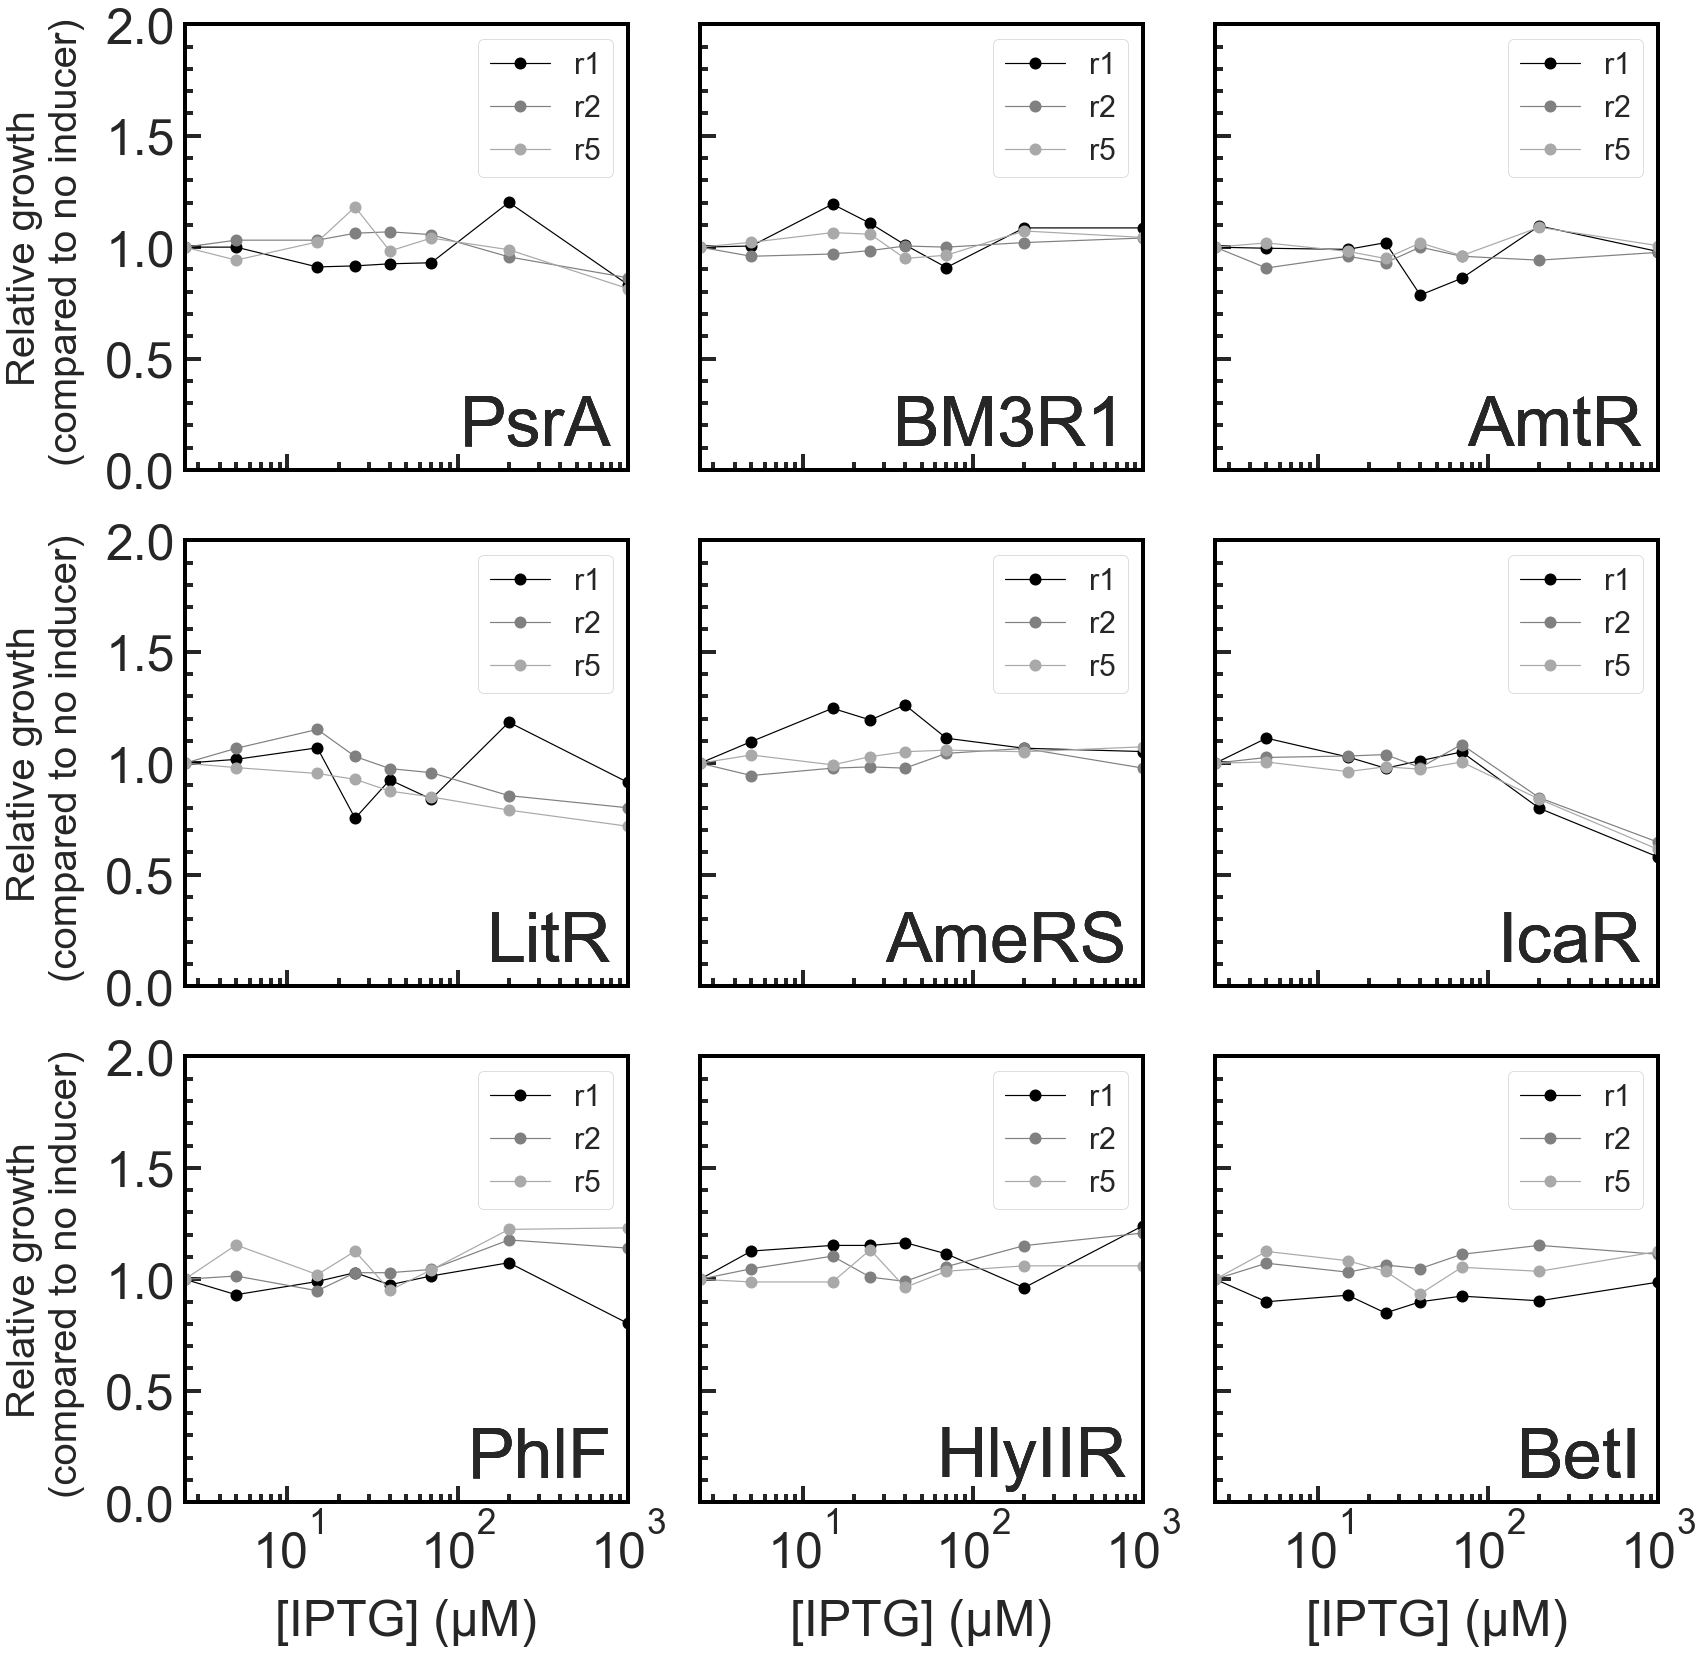

In [35]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)

rows = 3
cols = 3

# plot this relative growth measurement on y-axis with concentration on x-axis

fig_tox, ax_tox = plt.subplots(rows,cols, figsize=(cols*7.5,rows*7.5), sharey = 'row', sharex = 'col') # row, column format
# fig, ax = plt.subplots(4,2, figsize=(15,30), sharey = 'row') # row, column format
plt.tight_layout(pad = 6, h_pad = 6, w_pad = 6) #tidies up spacing between plots

for m in media:
    for i in ['iptg']:
        for p in parent:
            for s in strains:
                for r in ['r1','r2', 'r3']:

                    FP = ax_tox[fig_pos[s]['fig_row']][fig_pos[s]['fig_col']]
                    
                    for spine in FP.spines.values():
                                spine.set_edgecolor('black')
                                spine.set_linewidth(4)

                    FP.plot(inducer_info['plot_conc'], tox_relative[m][i][p][s].loc[r,:],
                                                            ms = 10, marker = plot_info[r]['marker'], linestyle = '-',
                                                            color = plot_info[r]['linecolor'],
                                                            mec = plot_info[r]['edgecolor'],
                                                            mfc = plot_info[r]['edgecolor'], mew = 2, 
                                                            label = rep_info[s][r][:2]) # included :2 to only select first two characters of string, which would otherwise say "r1_tidy"


                    FP.set_yscale('linear')
                    FP.set_xscale('log')

                    if fig_pos[s]['fig_col'] == 0:                
                        FP.set_ylabel('Relative growth\n (compared to no inducer)', size = 40, labelpad = 20)

                    if fig_pos[s]['fig_row'] == rows-1:                
                        FP.set_xlabel('[IPTG] (\u03BCM)', size = 50, labelpad = 20)  

        #                 ax_tox[fig_pos[i]['fig_row']][fig_pos[i]['fig_col']].set_title('{}'.format(strain_info[s]['promoter']), 
        #                                                                                size = 24, pad = 10)
                    FP.set_ylim(0,2)
                    FP.set_xlim(inducer_info['plot_conc'][0],inducer_info['plot_conc'][-1])

                    FP.yaxis.set_major_locator(MultipleLocator(0.5))
                    FP.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
                    FP.yaxis.set_minor_locator(MultipleLocator(0.1))

#                     FP.set_yticks(np.arange(0,2.1,0.1))
#                     FP.tick_params(axis='y', which='minor',labelleft=False)


                    FP.tick_params(labelsize = 50, length = 16, width = 4, direction = 'in', pad = 10)
                    FP.tick_params(which='minor', length = 8, width = 4, direction = 'in')

                    FP.yaxis.grid(False)
                    FP.xaxis.grid(False)
                    FP.legend(markerscale = 1, fontsize = 30)
        #             FP.legend.legendHandles._legmarker.set_markersize(50)

                    FP.text(max(inducer_info['plot_conc'])/1.25, .05, strain_info_rep[s]['repressor'], 
                                                                          verticalalignment = 'bottom', horizontalalignment = 'right', 
                                                                          fontsize = 70)

                

In [169]:
# fig_tox.savefig('EcN_NOTgates_toxicity_EachReplicate_Rep5.pdf', bbox_inches = "tight", transparent = True)


In [36]:
# take mean across replicates and standard deviation for toxicity measurements

tox_rel_means = dict()
tox_rel_stdevs = dict()
for m in media:
    tox_rel_means[m] = dict()
    tox_rel_stdevs[m] = dict()
    for i in ['iptg']:
        tox_rel_means[m][i] = dict()
        tox_rel_stdevs[m][i] = dict()
        for p in parent:
            tox_rel_means[m][i][p] = dict()
            tox_rel_stdevs[m][i][p] = dict()
            
            strains_subset = [s for s in strains if (len(tox['r1_tidy'][tox['r1_tidy']['strain_num']==s][i].unique())>1 and
                                                     s in tox['r1_tidy'][tox['r1_tidy']['parent_strain']==p]['strain_num'].unique())] # need to separate this way for subtracting autfluorescence later
            for s in strains_subset:
                tox_rel_means[m][i][p][s] = tox_relative[m][i][p][s].mean(axis = 0)
                tox_rel_stdevs[m][i][p][s] = tox_relative[m][i][p][s].std(axis = 0)
                
                

In [37]:
tox_rel_stdevs['M9']['iptg']['EcN']['AJT310']

0.0       0.000000
5.0       0.056795
15.0      0.039205
25.0      0.033642
40.0      0.020188
70.0      0.039397
200.0     0.025712
1000.0    0.033260
dtype: float64

In [38]:
# take mean across replicates and standard deviation for toxicity measurements

tox_means = dict()
tox_stdevs = dict()
for m in media:
    tox_means[m] = dict()
    tox_stdevs[m] = dict()
    for i in ['iptg']:
        tox_means[m][i] = dict()
        tox_stdevs[m][i] = dict()
        for p in parent:
            tox_means[m][i][p] = dict()
            tox_stdevs[m][i][p] = dict()
            
            strains_subset = [s for s in strains if (len(tox['r1_tidy'][tox['r1_tidy']['strain_num']==s][i].unique())>1 and
                                                     s in tox['r1_tidy'][tox['r1_tidy']['parent_strain']==p]['strain_num'].unique())] # need to separate this way for subtracting autfluorescence later
            for s in strains_subset:
                tox_means[m][i][p][s] = tox_data[m][i][p][s].mean(axis = 0)
                tox_stdevs[m][i][p][s] = tox_data[m][i][p][s].std(axis = 0)
                
                

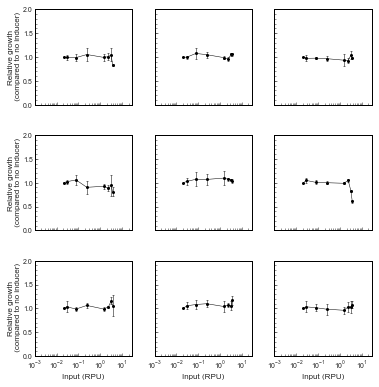

In [39]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)

# plot this relative growth measurement on y-axis with concentration on x-axis

rows = 3 
cols = 3

fig_width = 7.2/4*3 # to maintain same size as sensor transfer functions

fig_tox2, ax_tox2 = plt.subplots(rows, cols, 
                                       figsize=(fig_width,fig_width),
                                       sharey = 'row', sharex = 'col')
plt.tight_layout(pad = 1, h_pad = 2, w_pad = 1) #tidies up spacing between plots


for m in media:
    for i in ['iptg']:
        for p in parent:
            for s in strains:

                FP = ax_tox2[fig_pos[s]['fig_row']][fig_pos[s]['fig_col']]
                
                for spine in FP.spines.values():
                            spine.set_edgecolor('black')
                            spine.set_linewidth(1)

                ## errorbars
                FP.errorbar(AJT269_means_RPU_store, tox_rel_means[m][i][p][s], yerr = tox_rel_stdevs[m][i][p][s],
                                                            ms = 2, zorder=1, fmt='o-', c = 'black', # marker, line, color shorthand notation
                                                            mfc = 'black', mec = 'black', ecolor = 'black', lw= 0.5, elinewidth = 0.5, capsize = 1, capthick = 0.5)#,
    #                                                                     label = legend_names[strain_info[s]['parent']])

                FP.set_yscale('linear')
                FP.set_xscale('log')

                if fig_pos[s]['fig_col'] == 0:                
                    FP.set_ylabel('Relative growth\n (compared to no inducer)', size = 8, labelpad = 2)

                if fig_pos[s]['fig_row'] == rows-1 : 
                    FP.set_xlabel('Input (RPU)', size = 8, labelpad = 2)  

               
    #                 FP.set_title('{}'.format(strain_info[s]['promoter']), 
    #                                                                                size = 24, pad = 10)
                FP.set_ylim(0,2)
                FP.set_xlim(0.001,30)

                FP.yaxis.set_major_locator(MultipleLocator(0.5))
                FP.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
                FP.yaxis.set_minor_locator(MultipleLocator(0.1))

#                     FP.set_yticks(np.arange(0,2.1,0.1))
#                     FP.tick_params(axis='y', which='minor',labelleft=False)


                FP.tick_params(labelsize = 7, length = 3, width = 0.5, direction = 'in', pad = 2)
                FP.tick_params(which='minor', length = 2, width = 0.5, direction = 'in')

                FP.yaxis.grid(False)
                FP.xaxis.grid(False)
    #             FP.legend(markerscale = 1, fontsize = 16)
    #             FP.legend.legendHandles._legmarker.set_markersize(50)

#                 FP.text(max(inducer_info['plot_conc'])/1.25, .05, strain_info_rep[s]['repressor'], 
#                                                                       verticalalignment = 'bottom', horizontalalignment = 'right', 
#                                                                       fontsize = 70)


In [227]:
# fig_tox2.savefig('EcN_Sensors_toxicity_errorbars_black_Rep5.pdf', bbox_inches = "tight", transparent = True)


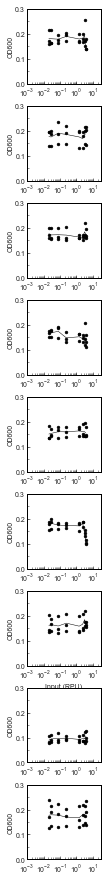

In [53]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)

# plot this relative growth measurement on y-axis with concentration on x-axis

rows = 9 
cols = 1

fig_tox3, ax_tox3 = plt.subplots(rows,cols, figsize=(1.69*cols,1.38*rows), sharey = 'row')
plt.tight_layout(h_pad = 0) #tidies up spacing between plots


for m in media:
    for i in ['iptg']:
        for p in parent:
            for s in strains:

                FP = ax_tox3[(fig_pos[s]['fig_row']*3)+fig_pos[s]['fig_col']]
                
                for spine in FP.spines.values():
                            spine.set_edgecolor('black')
                            spine.set_linewidth(1)

                for r in ['r1','r2', 'r3']:
                    FP.scatter(AJT269_means_RPU_store,
                                        tox_data[m][i][p][s].loc[r,:],
                                        linewidths = 0.5, marker = 'o', s = 8, zorder=1,c = 'black')
                            
                FP.plot(AJT269_means_RPU_store, tox_means[m][i][p][s],
                        lw=0.5, c = 'black')            
                
#                 ## errorbars
#                 FP.errorbar(AJT269_means_RPU_store, tox_means[m][i][p][s], yerr = tox_stdevs[m][i][p][s],
#                                                             ms = 1.5, zorder=1, fmt='o-', c = 'black', # marker, line, color shorthand notation
#                                                             mfc = 'black', mec = 'black', ecolor = 'black', lw= 0.5, elinewidth = 0.5, capsize = 1, capthick = 0.5)#,
#     #                                                                     label = legend_names[strain_info[s]['parent']])

                FP.set_yscale('linear')
                FP.set_xscale('log')

#                 if fig_pos[s]['fig_col'] == 0:                
                FP.set_ylabel('OD600', size = 7, labelpad = 2)

#                 if fig_pos[s]['fig_row'] == rows-1 : 
                if s == 'AJT312':
                    FP.set_xlabel('Input (RPU)', size = 7, labelpad = 2)  

               
    #                 FP.set_title('{}'.format(strain_info[s]['promoter']), 
    #                                                                                size = 24, pad = 10)
                FP.set_ylim(0,0.3)
                FP.set_xlim(0.001,30)

                FP.yaxis.set_major_locator(MultipleLocator(0.1))
                FP.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
                FP.yaxis.set_minor_locator(MultipleLocator(0.05))

#                     FP.set_yticks(np.arange(0,2.1,0.1))
#                     FP.tick_params(axis='y', which='minor',labelleft=False)

                ## set x ticks
                x_major = matplotlib.ticker.LogLocator(base = 10.0, numticks = 5)
                FP.xaxis.set_major_locator(x_major)
                x_minor = matplotlib.ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
                FP.xaxis.set_minor_locator(x_minor)
                FP.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())


                FP.tick_params(labelsize = 7, length = 3, width = 0.5, direction = 'in', pad = 2)
                FP.tick_params(which='minor', length = 2, width = 0.5, direction = 'in')

                FP.yaxis.grid(False)
                FP.xaxis.grid(False)
    #             FP.legend(markerscale = 1, fontsize = 16)
    #             FP.legend.legendHandles._legmarker.set_markersize(50)

#                 FP.text(max(inducer_info['plot_conc'])/1.25, .05, strain_info_rep[s]['repressor'], 
#                                                                       verticalalignment = 'bottom', horizontalalignment = 'right', 
#                                                                       fontsize = 70)


In [54]:
# fig_tox3.savefig('FigS8_S9_EcN_NOTgates_toxicity_AllPoints_black_onecolumn.pdf', bbox_inches = "tight", transparent = True)


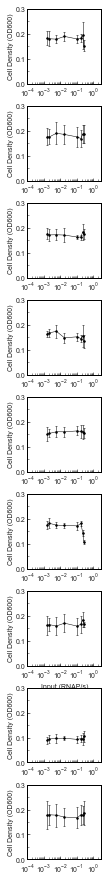

In [57]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)

# plot this relative growth measurement on y-axis with concentration on x-axis

rows = 9 
cols = 1

fig_tox3_RNAP, ax_tox3_RNAP = plt.subplots(rows,cols, figsize=(1.69*cols,1.38*rows), sharey = 'row')
plt.tight_layout(h_pad = 0) #tidies up spacing between plots


for m in media:
    for i in ['iptg']:
        for p in parent:
            for s in strains:

                FP = ax_tox3_RNAP[(fig_pos[s]['fig_row']*3)+fig_pos[s]['fig_col']]
                
                for spine in FP.spines.values():
                            spine.set_edgecolor('black')
                            spine.set_linewidth(1)

                ## errorbars
                FP.errorbar(AJT269_means_RNAP_store, tox_means[m][i][p][s], yerr = tox_stdevs[m][i][p][s],
                                                            ms = 1.5, zorder=1, fmt='o-', c = 'black', # marker, line, color shorthand notation
                                                            mfc = 'black', mec = 'black', ecolor = 'black', lw= 0.5, elinewidth = 0.5, capsize = 1, capthick = 0.5)#,
    #                                                                     label = legend_names[strain_info[s]['parent']])

                FP.set_yscale('linear')
                FP.set_xscale('log')

#                 if fig_pos[s]['fig_col'] == 0:                
                FP.set_ylabel('Cell Density (OD600)', size = 7, labelpad = 2)

#                 if fig_pos[s]['fig_row'] == rows-1 : 
                if s == 'AJT312':
                    FP.set_xlabel('Input (RNAP/s)', size = 7, labelpad = 2)  

               
    #                 FP.set_title('{}'.format(strain_info[s]['promoter']), 
    #                                                                                size = 24, pad = 10)
                FP.set_ylim(0,0.3)
                FP.set_xlim(0.0001,3)

                FP.yaxis.set_major_locator(MultipleLocator(0.1))
                FP.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
                FP.yaxis.set_minor_locator(MultipleLocator(0.05))

#                     FP.set_yticks(np.arange(0,2.1,0.1))
#                     FP.tick_params(axis='y', which='minor',labelleft=False)

                ## set x ticks
                x_major = matplotlib.ticker.LogLocator(base = 10.0, numticks = 5)
                FP.xaxis.set_major_locator(x_major)
                x_minor = matplotlib.ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
                FP.xaxis.set_minor_locator(x_minor)
                FP.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())


                FP.tick_params(labelsize = 7, length = 3, width = 0.5, direction = 'in', pad = 2)
                FP.tick_params(which='minor', length = 2, width = 0.5, direction = 'in')

                FP.yaxis.grid(False)
                FP.xaxis.grid(False)
    #             FP.legend(markerscale = 1, fontsize = 16)
    #             FP.legend.legendHandles._legmarker.set_markersize(50)

#                 FP.text(max(inducer_info['plot_conc'])/1.25, .05, strain_info_rep[s]['repressor'], 
#                                                                       verticalalignment = 'bottom', horizontalalignment = 'right', 
#                                                                       fontsize = 70)


In [58]:
# fig_tox3_RNAP.savefig('EcN_NOTgates_toxicity_RNAP_errorbars_black_onecolumn.pdf', bbox_inches = "tight", transparent = True)


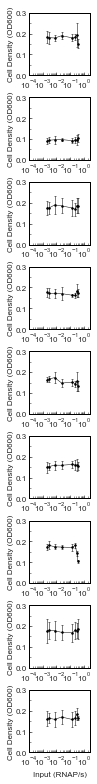

In [95]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)

# plot this relative growth measurement on y-axis with concentration on x-axis

rows = 9 
cols = 1

fig_tox3_RNAP_8onpage, ax_tox3_RNAP_8onpage = plt.subplots(rows,cols, figsize=(1.71*(8/rows),1.36*8), sharey = 'row')
plt.tight_layout(h_pad = 0) #tidies up spacing between plots


for m in media:
    for i in ['iptg']:
        for p in parent:
            for s in strains:

                FP = ax_tox3_RNAP_8onpage[(fig_pos[s]['fig_row']*3)+fig_pos[s]['fig_col']]
                
                for spine in FP.spines.values():
                            spine.set_edgecolor('black')
                            spine.set_linewidth(1)

                ## errorbars
                FP.errorbar(AJT269_means_RNAP_store, tox_means[m][i][p][s], yerr = tox_stdevs[m][i][p][s],
                                                            ms = 1.5, zorder=1, fmt='o-', c = 'black', # marker, line, color shorthand notation
                                                            mfc = 'black', mec = 'black', ecolor = 'black', lw= 0.5, elinewidth = 0.5, capsize = 1, capthick = 0.5)#,
    #                                                                     label = legend_names[strain_info[s]['parent']])

                FP.set_yscale('linear')
                FP.set_xscale('log')

#                 if fig_pos[s]['fig_col'] == 0:                
                FP.set_ylabel('Cell Density (OD600)', size = 8, labelpad = 2)

#                 if fig_pos[s]['fig_row'] == rows-1 : 
                if s == 'AJT312':
                    FP.set_xlabel('Input (RNAP/s)', size = 8, labelpad = 2)  

               
    #                 FP.set_title('{}'.format(strain_info[s]['promoter']), 
    #                                                                                size = 24, pad = 10)
                FP.set_ylim(0,0.3)
                FP.set_xlim(0.0001,3)

                FP.yaxis.set_major_locator(MultipleLocator(0.1))
                FP.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
                FP.yaxis.set_minor_locator(MultipleLocator(0.05))

#                     FP.set_yticks(np.arange(0,2.1,0.1))
#                     FP.tick_params(axis='y', which='minor',labelleft=False)

                ## set x ticks
                x_major = matplotlib.ticker.LogLocator(base = 10.0, numticks = 5)
                FP.xaxis.set_major_locator(x_major)
                x_minor = matplotlib.ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
                FP.xaxis.set_minor_locator(x_minor)
                FP.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())


                FP.tick_params(labelsize = 8, length = 3, width = 0.5, direction = 'in', pad = 2)
                FP.tick_params(which='minor', length = 2, width = 0.5, direction = 'in')

                FP.yaxis.grid(False)
                FP.xaxis.grid(False)
    #             FP.legend(markerscale = 1, fontsize = 16)
    #             FP.legend.legendHandles._legmarker.set_markersize(50)

#                 FP.text(max(inducer_info['plot_conc'])/1.25, .05, strain_info_rep[s]['repressor'], 
#                                                                       verticalalignment = 'bottom', horizontalalignment = 'right', 
#                                                                       fontsize = 70)


In [96]:
fig_tox3_RNAP_8onpage.savefig('EcN_NOTgates_toxicity_RNAP_errorbars_black_onecolumn_8onpage.pdf', bbox_inches = "tight", transparent = True)
